# AIP Group Project Background

**Data Background**
- Objective: Build a model to predict which cutomers will leave positive reviews and this model will be used to target or incentivse customers to write a review. Ensure that the good reviews are targeted.

- Main data is the `olist_order_reviews_dataset`


# Import Columns and Renaming Columns

In [141]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [142]:
# import module
import pandas as pd

# assign dataset names
list_of_names = ['olist_customers_dataset','olist_geolocation_dataset','olist_order_items_dataset','olist_order_payments_dataset',
                 'olist_order_reviews_dataset','olist_orders_dataset','olist_products_dataset','olist_sellers_dataset','product_category_name_translation']

# create empty list
dataframes_list = []

# append datasets into the list
for i in range(len(list_of_names)):
    temp_df = pd.read_csv("/content/drive/MyDrive/draft/brazilian-ecommerce/"+list_of_names[i]+".csv")
    dataframes_list.append(temp_df)


In [143]:
new_name_list = ['customers_df','geolocation_df','order_items_df','order_payments_df','order_reviews_df','orders_df','products_df','sellers_df','category_translate_df']

customers_df=dataframes_list[0]
geolocation_df = dataframes_list[1]
order_items_df = dataframes_list[2]
order_payments_df = dataframes_list[3]
order_reviews_df = dataframes_list[4]
orders_df = dataframes_list[5]
products_df = dataframes_list[6]
sellers_df = dataframes_list[7]
category_translate_df = dataframes_list[8]

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Data Understanding  | Order Payments

olist_payments_dataset important features to consider:

1. `order_id`: unique ID of the order
2. `payments_sequential`: a customer may pay with more than one method. This is the sequence of payments of each order purchase
3. `payment_type`: method of payment
4. `payment_installemnts`: if the payment is in installments multiple payments over time, this is the number of installments
5. `payment_value`: transaction value of customer


### Data Cleaning: Missing values, Duplicates and data error entry

In [145]:
'''DATA CLEANING SECTION:
- removed payment type which is not defined
- Check order_id
'''

n_col=order_payments_df.shape[1]
for i in range(n_col):
  print("Number of rows in {}:".format(order_payments_df.columns[i]),order_payments_df[order_payments_df.columns[i]].shape[0])
  print("Number of unique {}:".format(order_payments_df.columns[i]),order_payments_df[order_payments_df.columns[i]].nunique())


#find the number of uniqueand duplicates rows, output below shows no duplicates in the 103833 rows
order_payments_df.duplicated().value_counts()


Number of rows in order_id: 103886
Number of unique order_id: 99440
Number of rows in payment_sequential: 103886
Number of unique payment_sequential: 29
Number of rows in payment_type: 103886
Number of unique payment_type: 5
Number of rows in payment_installments: 103886
Number of unique payment_installments: 24
Number of rows in payment_value: 103886
Number of unique payment_value: 29077


,count
False,103886


In [146]:

#delete payment_type thats not defined
order_payments_df = order_payments_df[order_payments_df['payment_type'] != 'not_defined']
order_payments_df['payment_type'].unique()

#we have a not_defined payment
#demographic payment by basic_order_count
payment_type_count = order_payments_df.groupby('payment_type')['order_id'].nunique().sort_values(ascending=False)
payment_list_type = order_payments_df['payment_type'].unique()
for  i in range(len(payment_list_type)):
  print("Payment methods:{}".format(payment_list_type[i]))


#check payment_value = 0
# this won't be deleted rows t because this shows that the payment_type is voucher, it could be that the customer got a promotion by using this voucher, hence payment_value = 0
# additionally all of the payment_values that are zero here are not within the first step of payment_sequential
zero_pay =order_payments_df[order_payments_df['payment_value']==0]
print(zero_pay)


Payment methods:credit_card
Payment methods:boleto
Payment methods:voucher
Payment methods:debit_card
                                order_id  payment_sequential payment_type  \
19922   8bcbe01d44d147f901cd3192671144db                   4      voucher   
36822   fa65dad1b0e818e3ccc5cb0e39231352                  14      voucher   
43744   6ccb433e00daae1283ccc956189c82ae                   4      voucher   
62674   45ed6e85398a87c253db47c2d9f48216                   3      voucher   
77885   fa65dad1b0e818e3ccc5cb0e39231352                  13      voucher   
100766  b23878b3e8eb4d25a158f57d96331b18                   4      voucher   

        payment_installments  payment_value  
19922                      1            0.0  
36822                      1            0.0  
43744                      1            0.0  
62674                      1            0.0  
77885                      1            0.0  
100766                     1            0.0  


In [147]:
order_payments_df.info()
#summary statistics
order_payments_df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 103883 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103883 non-null  object 
 1   payment_sequential    103883 non-null  int64  
 2   payment_type          103883 non-null  object 
 3   payment_installments  103883 non-null  int64  
 4   payment_value         103883 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.8+ MB


,payment_sequential,payment_installments,payment_value
count,103883.000000,103883.000000,103883.000000
mean,1.092681,2.853402,154.104831
std,0.706594,2.687071,217.495628
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.800000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.840000
max,29.000000,24.000000,13664.080000


### Statistics and Histograms

### Main Insights Collected:

- Total Gross Transaction Value: 16 Million Brazilian Reals
-  Boleto driving most of the Gross Transaction value, followed by credit card payments. However average purchase spending in still highest on credit card payments.
- Most orders are done within a single payment representing 97% of orders. Credit card remains the primary method of payment as first payment of method,followed by boleto

**Distribution of the number of payment methods**

Based on the output below, we see that 97% orders only have 1 payment method. Of the customers who have only 1 payment method, 74% opt to use credit card as their first method of payment followed by boleto (23.4%). 87.4% of customers use vouchers as their second method of payment. Only 2.4% of customers have used more than 2 payment methods.

Count of orders who have 1 payment method(s): 96476, representing 97.02 % of orders
Count of orders who have 2 payment method(s): 2382, representing 2.4 % of orders
Count of orders who have 3 payment method(s): 301, representing 0.3 % of orders
Count of orders who have 4 payment method(s): 108, representing 0.11 % of orders
Count of orders who have 5 payment method(s): 52, representing 0.05 % of orders
Count of orders who have 6 payment method(s): 36, representing 0.04 % of orders
Count of orders who have 7 payment method(s): 28, representing 0.03 % of orders
Count of orders who have 8 payment method(s): 11, representing 0.01 % of orders
Count of orders who have 9 payment method(s): 9, representing 0.01 % of orders
Count of orders who have 10 payment method(s): 5, representing 0.01 % of orders
Count of orders who have 11 payment method(s): 8, representing 0.01 % of orders
Count of orders who have 12 payment method(s): 8, representing 0.01 % of orders
Count of orders who have 13 payment

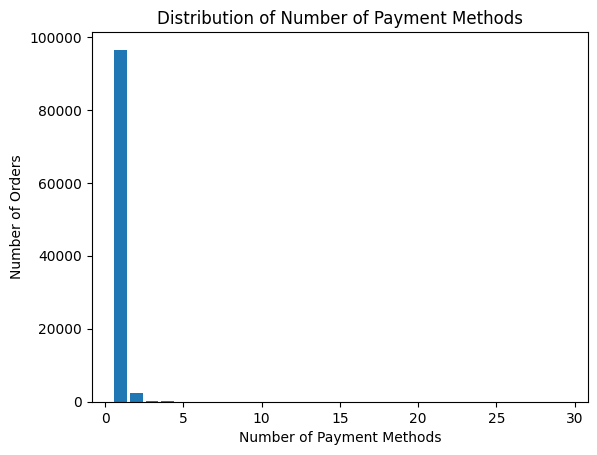

In [148]:
#Distribution of the number of payment methods in the e-commerce dataset
order_payment_counts = order_payments_df.groupby('order_id')['payment_sequential'].nunique()
payment_distribution = order_payment_counts.value_counts().sort_index()
payment_percentage = round(order_payment_counts.value_counts().sort_index()/order_payment_counts.shape[0]*100,2)

for i in range(len(payment_distribution)):
  print("Count of orders who have {} payment method(s):".format(payment_distribution.index[i]),"{},".format(payment_distribution.values[i]),"representing {} % of orders".format(round(payment_percentage.values[i],2)))

#Visualising the data
plt.bar(payment_distribution.index,payment_distribution.values)
plt.xlabel('Number of Payment Methods')
plt.ylabel('Number of Orders')
plt.title('Distribution of Number of Payment Methods')
plt.show()



**What kind of payment are generally used as the first and second payment method in payment sequential?**



*   First payments method : Credit-card (73.9%), Boleto (19.0%)
*   Second payments method: Voucher (87.8%), credit card (10.5%)



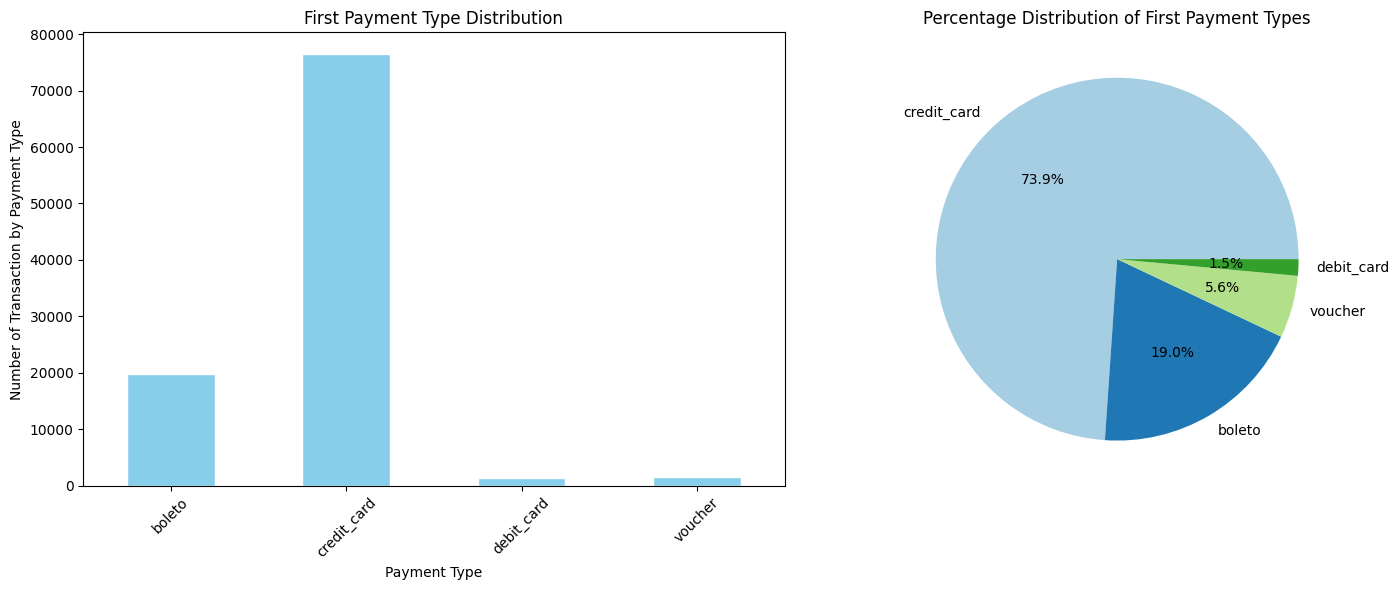

In [149]:
# Filter data to get only the first payments
first_pay = order_payments_df[order_payments_df['payment_sequential'] == 1]

# Group by payment type and calculate the mean number of installments
payment_by_type = first_pay.groupby('payment_type')['payment_value'].count()

# Plotting both charts side by side using subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Bar Chart for the Average Number of Installments by Payment Type
payment_by_type.plot(kind='bar', color='skyblue', edgecolor='white', ax=ax[0])
ax[0].set_title('First Payment Type Distribution')
ax[0].set_xlabel('Payment Type')
ax[0].set_ylabel('Number of Transaction by Payment Type')
ax[0].tick_params(axis='x', rotation=45)

# Pie Chart for the Percentage of Each Payment Type
payment_type_counts = order_payments_df['payment_type'].value_counts()
ax[1].pie(payment_type_counts, labels=payment_type_counts.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
ax[1].set_title('Percentage Distribution of First Payment Types')

# Show both charts
plt.tight_layout()  # Adjust layout so that charts fit without overlapping
plt.show()

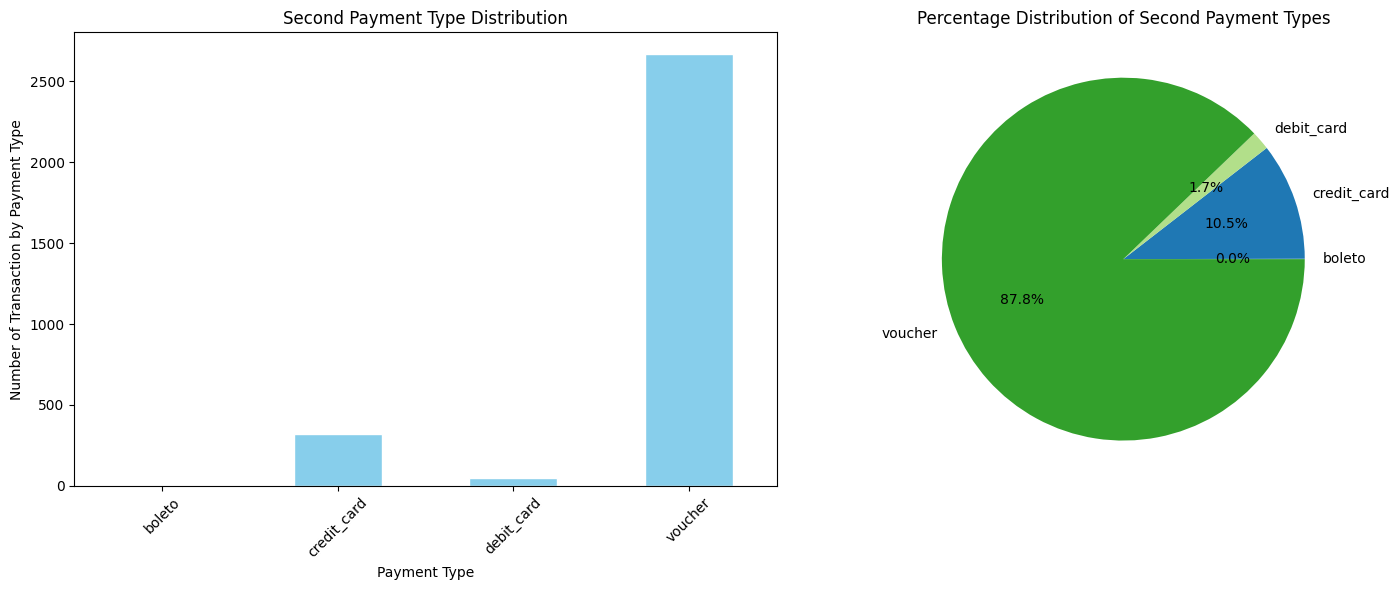

In [150]:
#second payment method graph

# Filter data to get only the second payments
second_pay = order_payments_df[order_payments_df['payment_sequential'] == 2]

# Group by payment type and calculate the mean number of installments
payment_by_type = second_pay.groupby('payment_type')['payment_value'].count()


# Plotting both charts side by side using subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Bar Chart for the Average Number of Installments by Payment Type
payment_by_type.plot(kind='bar', color='skyblue', edgecolor='white', ax=ax[0])
ax[0].set_title('Second Payment Type Distribution')
ax[0].set_xlabel('Payment Type')
ax[0].set_ylabel('Number of Transaction by Payment Type')
ax[0].tick_params(axis='x', rotation=45)

# Pie Chart for the Percentage of Each Payment Type
payment_type_counts = payment_by_type
ax[1].pie(payment_type_counts, labels=payment_type_counts.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
ax[1].set_title('Percentage Distribution of Second Payment Types')

# Show both charts
plt.tight_layout()  # Adjust layout so that charts fit without overlapping
plt.show()


**Distribution of order count based on number of payment installments**


*   Most order payments are completed within 1-2 installments.
*   Payments on average across all categories is around 160 Brazilian Reals.



Number of orders with 1 installment(s): 52543
Number of orders with 2 installment(s): 12413
Number of orders with 3 installment(s): 10461
Number of orders with 4 installment(s): 7098
Number of orders with 5 installment(s): 5239
Number of orders with 6 installment(s): 3920
Number of orders with 7 installment(s): 1626
Number of orders with 8 installment(s): 4268
Number of orders with 9 installment(s): 644
Number of orders with 10 installment(s): 5328
Number of orders with 11 installment(s): 23
Number of orders with 12 installment(s): 133
Number of orders with 13 installment(s): 16
Number of orders with 14 installment(s): 15
Number of orders with 15 installment(s): 74
Number of orders with 16 installment(s): 5
Number of orders with 17 installment(s): 8
Number of orders with 18 installment(s): 27
Number of orders with 20 installment(s): 17
Number of orders with 21 installment(s): 3
Number of orders with 22 installment(s): 1
Number of orders with 23 installment(s): 1
Number of orders with 2

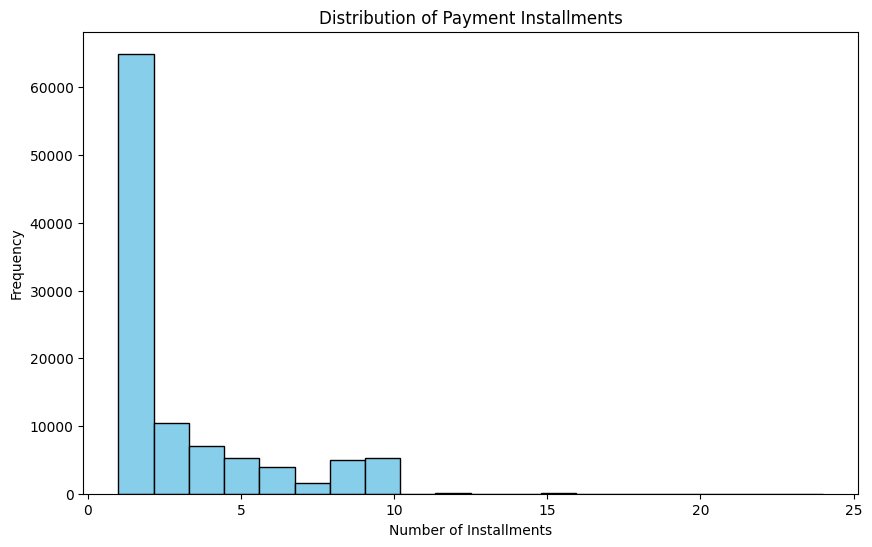

In [151]:
order_payments_df[(order_payments_df['payment_installments']!=0)]

# Filter data
filtered_data = order_payments_df[order_payments_df['payment_installments'] != 0]

installments_count = filtered_data.groupby('payment_installments').size()

# Iterate over installments_count to print the result
for installments, count in installments_count.items():
    print(f"Number of orders with {installments} installment(s): {count}")


# Plotting the distribution of payment installments
plt.figure(figsize=(10, 6))
plt.hist(filtered_data['payment_installments'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Payment Installments')
plt.xlabel('Number of Installments')
plt.ylabel('Frequency')
plt.show()


In [152]:

#payment value need to be summed up based on the order_id and payment sequence

#select distinct(order_id), sum(payment_value)
#from order_payment_df
#group by 1,2

payment_value_by_order =order_payments_df.groupby('order_id').agg({'payment_value':'sum'})


#total gross transaction value
#assuming its in Brazilian Real: 16 million
print("Gross Transaction Value:{}Brazilian Reals".format(payment_value_by_order.sum()))

#summary statistics of payment_value
payment_value_by_order.describe()

Gross Transaction Value:payment_value    16008872.12
dtype: float64Brazilian Reals


,payment_value
count,99437.000000
mean,160.995124
std,221.952843
min,9.590000
25%,62.010000
50%,105.290000
75%,176.970000
max,13664.080000


In [153]:
#gross transaction value by payment type
payment_value_by_pt =order_payments_df.groupby('payment_type').agg({'payment_value':'sum'},ascending=False)
payment_value_by_pt

,payment_value
payment_type,
boleto,2869361.27
credit_card,12542084.19
debit_card,217989.79
voucher,379436.87


In [154]:
payment_sum_stat = order_payments_df.groupby('payment_type')['payment_value'].describe()
payment_sum_stat

,count,mean,std,min,25%,50%,75%,max
payment_type,,,,,,,,
boleto,19784.0,145.034435,213.581061,11.62,55.5225,93.89,160.7625,7274.88
credit_card,76795.0,163.319021,222.119311,0.01,62.2100,106.87,181.2100,13664.08
debit_card,1529.0,142.570170,245.793401,13.38,51.1000,89.30,154.3200,4445.50
voucher,5775.0,65.703354,115.519185,0.00,18.0350,39.28,80.0000,3184.34


In [155]:
payment_value_by_ins =order_payments_df.groupby(['payment_type','payment_installments']).agg({'payment_installments':'count'},ascending=False)
payment_value_by_ins

payment_installments
payment_type payment_installments                      
boleto       1                                    19784
credit_card  0                                        2
             1                                    25455
             2                                    12413
             3                                    10461
             4                                     7098
             5                                     5239
             6                                     3920
             7                                     1626
             8                                     4268
             9                                      644
             10                                    5328
             11                                      23
             12                                     133
             13                                      16
             14                                      15
             15                                      74
             16                                       5
             17                                       8
             18                                      27
             20                                      17
             21                                       3
             22                                       1
             23                                       1
             24                                      18
debit_card   1                                     1529
voucher      1                                     5775

In [156]:
# Group by 'payment_type' and 'payment_installments', then get descriptive statistics for 'payment_value'
payment_value_by_ins = order_payments_df.groupby(['payment_type', 'payment_installments'])['payment_value'].describe()

# Display the result
payment_value_by_ins


count        mean         std     min  \
payment_type payment_installments                                            
boleto       1                     19784.0  145.034435  213.581061   11.62   
credit_card  0                         2.0   94.315000   50.381358   58.69   
             1                     25455.0   95.872930  146.015646    0.01   
             2                     12413.0  127.228150  112.152160   20.03   
             3                     10461.0  142.539317  132.786159   30.00   
             4                      7098.0  163.976840  172.063538   40.00   
             5                      5239.0  183.465222  208.763354   49.99   
             6                      3920.0  209.849952  220.513228   59.99   
             7                      1626.0  187.673672  201.988654   69.97   
             8                      4268.0  307.737427  330.234401   37.58   
             9                       644.0  203.440870  199.236704   90.11   
             10                     5328.0  415.085837  451.851893   37.67   
             11                       23.0  124.932174   22.742041  110.30   
             12                      133.0  321.678496  306.569921  121.09   
             13                       16.0  150.462500   38.814007  130.00   
             14                       15.0  167.962667   70.583457  139.98   
             15                       74.0  445.553108  449.540186  151.93   
             16                        5.0  292.694000  211.546161  160.12   
             17                        8.0  174.602500    2.650476  170.00   
             18                       27.0  486.483333  367.222596  180.76   
             20                       17.0  615.801765  483.356363  200.08   
             21                        3.0  243.700000   51.411933  212.03   
             22                        1.0  228.710000         NaN  228.71   
             23                        1.0  236.480000         NaN  236.48   
             24                       18.0  610.048889  342.152398  241.42   
debit_card   1                      1529.0  142.570170  245.793401   13.38   
voucher      1                      5775.0   65.703354  115.519185    0.00   

                                        25%      50%       75%       max  
payment_type payment_installments                                         
boleto       1                      55.5225   93.890  160.7625   7274.88  
credit_card  0                      76.5025   94.315  112.1275    129.94  
             1                      41.9100   67.870  110.9750  13664.08  
             2                      64.0000  109.420  155.7300   2442.82  
             3                      67.2200  110.420  175.6000   3256.14  
             4                      71.4625  117.175  207.2975   3126.50  
             5                      75.2100  125.970  223.7250   4809.44  
             6                      80.1900  138.550  242.4850   2828.42  
             7                      76.7650  140.075  193.3900   2094.44  
             8                     130.1500  212.695  358.4550   6929.31  
             9                      95.3175   99.920  212.1025   2116.01  
             10                    156.7075  239.740  491.7750   4950.34  
             11                    113.8600  116.510  118.4500    198.83  
             12                    142.0600  198.410  327.5000   1543.25  
             13                    133.4450  136.205  137.9575    278.00  
             14                    144.6650  147.070  149.6200    417.45  
             15                    196.5000  255.850  429.9150   2647.76  
             16                    164.1700  167.370  320.7600    651.05  
             17                    173.0225  175.100  176.2150    177.99  
             18                    228.7700  335.890  526.1400   1232.85  
             20                    274.6400  458.310  811.3200   2022.33  
             21                    214.0400  216.

In [157]:
# Count the number of unique payment methods per order
order_payment_counts = order_payments_df.groupby('order_id')['payment_sequential'].nunique()

# Create a new column for the number of payments and the total payment value for each order
order_payment_value = order_payments_df.groupby('order_id')['payment_value'].sum()

# Combine both the payment count and payment value for each order_id
order_payment_summary = pd.DataFrame({
    'payment_count': order_payment_counts,
    'total_payment_value': order_payment_value
})


# Now we group by the number of payment methods (payment_count) and sum the total payment value
payment_distribution = order_payment_summary.groupby('payment_count').agg(
    order_count=('payment_count', 'size'),
    total_payment_value=('total_payment_value', 'sum')
).sort_index()

payment_distribution


,order_count,total_payment_value
payment_count,,
1,96476,15516764.17
2,2382,413304.19
3,301,38023.71
4,108,11173.30
5,52,6711.72
6,36,6690.19
7,28,6399.14
8,11,1439.89
9,9,1693.10


In [158]:
payment_grouped = order_payments_df.groupby('order_id').agg({'payment_sequential':'max','payment_value': 'sum','payment_installments':'sum'}).reset_index()
payment_grouped.rename(columns={'payment_sequential':'total_payments_method','payment_value':'total_payment_value','payment_installments':'num_of_installments'},inplace=True)
payment_grouped = payment_grouped.sort_values(by='total_payments_method',ascending=False)
payment_grouped.head()

,order_id,total_payments_method,total_payment_value,num_of_installments
97258,fa65dad1b0e818e3ccc5cb0e39231352,29,457.99,29
79608,ccf804e764ed5650cd8759557269dc13,26,62.68,26
15576,285c2e15bebd4ac83635ccc563dc71f4,22,40.85,22
53166,895ab968e7bb0d5659d16cd74cd1650c,21,161.32,21
92721,ee9ca989fc93ba09a6eddc250ce01742,19,82.73,19


### Feature Engineering Payment Type

In [159]:
order_payments_df['payment_type'].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card'], dtype=object)

In [160]:
#create another copy to create new columns for payment_type
order_copy = order_payments_df.copy()

# Add new columns for each payment type (1 if payment type exists for the order_id, else 0)
order_copy['is_boleto'] = (order_copy['payment_type'] == 'boleto').astype(int)
order_copy['is_credit_card'] = (order_copy['payment_type'] == 'credit_card').astype(int)
order_copy['is_debit_card'] = (order_copy['payment_type'] == 'debit_card').astype(int)
order_copy['is_voucher'] = (order_copy['payment_type'] == 'voucher').astype(int)

# Group by order_id and aggregate to ensure one row per order_id
order_pay = order_copy.groupby('order_id').agg({
    'is_boleto': 'max',
    'is_credit_card': 'max',
    'is_debit_card': 'max',
    'is_voucher': 'max'
}).reset_index()

# Check the resulting DataFrame
order_pay.describe()


#check for duplicates
print(order_pay['order_id'].duplicated().sum())


0


In [161]:
#merge payment_grouped with order_pay

payment_grouped = pd.merge(payment_grouped,order_pay,on='order_id',how='left')
payment_grouped.describe()


,total_payments_method,total_payment_value,num_of_installments,is_boleto,is_credit_card,is_debit_card,is_voucher
count,99437.000000,99437.000000,99437.000000,99437.00000,99437.000000,99437.000000,99437.000000
mean,1.045516,160.995124,2.980983,0.19896,0.769382,0.015367,0.038879
std,0.382183,221.952843,2.741830,0.39922,0.421231,0.123006,0.193307
min,1.000000,9.590000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,1.000000,62.010000,1.000000,0.00000,1.000000,0.000000,0.000000
50%,1.000000,105.290000,2.000000,0.00000,1.000000,0.000000,0.000000
75%,1.000000,176.970000,4.000000,0.00000,1.000000,0.000000,0.000000
max,29.000000,13664.080000,29.000000,1.00000,1.000000,1.000000,1.000000


In [162]:
len(payment_grouped[payment_grouped['is_boleto']==1])

19784

Based on the outpu below, both credit card and boleto are the two preferred payment methods, debit card and voucher only represents 5.52% of the payment methods used. For now, we will proceed with splitting all into four distinct payments: boleto, credit card, debit card, and voucher. Combining the smaller payment methods may be considered during the modelling process.

In [163]:
print('Boleto Payment Used: {}%'.format(round(len(payment_grouped[payment_grouped['is_boleto']==1])/len(payment_grouped['order_id'])*100,2)))
print('Credit Card Payment Used: {}%'.format(round(len(payment_grouped[payment_grouped['is_credit_card']==1])/len(payment_grouped['order_id'])*100,2)))
print('Debit Card Payment Used: {}%'.format(round(len(payment_grouped[payment_grouped['is_debit_card']==1])/len(payment_grouped['order_id'])*100,2)))
print('Voucher Payment Used: {}%'.format(round(len(payment_grouped[payment_grouped['is_voucher']==1])/len(payment_grouped['order_id'])*100,2)))


Boleto Payment Used: 19.9%
Credit Card Payment Used: 76.94%
Debit Card Payment Used: 1.54%
Voucher Payment Used: 3.89%


# Data Understanding and Initial Data Preparation | Products Dataset

Products_dataset important features to consider:


*  `product_id`: unique id of the product
*  `product_category_name`: portugese name of the products
* `product_name_length`: numbers of characters of the product name
* `product_description_length`: number of characters from the product description
* `product_photos_qty`: number of product photos online
* `product_weight_g`: weight of product in grams
* `product_length_cm`: length of product in cm
* `product_width_cm`: width of product in cm



### Data Cleaning and Feature Engineering Section

Feature Engineering:
*   Create column for volumne = length * height * width
*   Create classification columns for all products_df after merging with category translate (e.g. is_prefumery). 1 if category matches the name, else 0. Justification to encode this is to see whether categories play a role in the review score. Would need to validate this assumption during the modelling phase.




In [164]:
products_df.columns

Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

In [165]:
#1a. checking for null values
products_df.isnull().sum()
p_col = len(products_df.columns)

num_rows = products_df.shape[0]
print("Total number of rows in product dataframe:",num_rows)

#1b. checking for duplicate values
for col in range(p_col):
  print("Number of duplicated values in column {}:".format(products_df.columns[col]),products_df[products_df.columns[col]].duplicated().sum())

#2. Drop unnecessary columns: product_name_length and product_description_length
products_df.drop(['product_name_lenght'],axis=1,inplace=True)
products_df.dropna(inplace=True)

#3. Remove rows with missing values in product category name and dimension columns
products_df.dropna(subset=['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'], inplace=True)


#4. Feature Engineering: Calculate Volume
products_df['volume_cm3'] = products_df['product_length_cm'] * products_df['product_height_cm'] * products_df['product_width_cm']



# 5. Merge products_df with category translation
prod_df_final = pd.merge(products_df,category_translate_df,on='product_category_name',how='left')


# 6. Check for any missing translation
missing = prod_df_final[prod_df_final['product_category_name_english'].isnull()]
missing


# 7. fill in  the missing translation
prod_df_final.loc[(prod_df_final['product_category_name_english'].isnull()) & (prod_df_final['product_category_name'] == 'pc_gamer'), 'product_category_name_english'] = 'pc_gamer'
prod_df_final.loc[(prod_df_final['product_category_name_english'].isnull()) & (prod_df_final['product_category_name'] == 'portateis_cozinha_e_preparadores_de_alimentos'), 'product_category_name_english'] = 'portable_kitchen_appliances_and_food_processors'

# 8. removing unwanted columns
prod_df_final = prod_df_final.drop(columns=['product_category_name','product_length_cm','product_height_cm','product_width_cm'])

prod_df_final.info()





Total number of rows in product dataframe: 32951
Number of duplicated values in column product_id: 0
Number of duplicated values in column product_category_name: 32877
Number of duplicated values in column product_name_lenght: 32884
Number of duplicated values in column product_description_lenght: 29990
Number of duplicated values in column product_photos_qty: 32931
Number of duplicated values in column product_weight_g: 30746
Number of duplicated values in column product_length_cm: 32851
Number of duplicated values in column product_height_cm: 32848
Number of duplicated values in column product_width_cm: 32855
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32340 entries, 0 to 32339
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     32340 non-null  object 
 1   product_description_lenght     32340 non-null  float64
 2   product_photos_qty          

In [166]:
#9. Feature Engineering: Product Category
num_product_category = prod_df_final['product_category_name_english'].unique()


for category in num_product_category:
    prod_df_final[f'is_{category.lower()}'] = prod_df_final['product_category_name_english'].apply(
        lambda x: 1 if x == category else 0
    )

# Updated dataframe
prod_df_final.info()
prod_df_final.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32340 entries, 0 to 32339
Data columns (total 79 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   product_id                                          32340 non-null  object 
 1   product_description_lenght                          32340 non-null  float64
 2   product_photos_qty                                  32340 non-null  float64
 3   product_weight_g                                    32340 non-null  float64
 4   volume_cm3                                          32340 non-null  float64
 5   product_category_name_english                       32340 non-null  object 
 6   is_perfumery                                        32340 non-null  int64  
 7   is_art                                              32340 non-null  int64  
 8   is_sports_leisure                                   32340 non-null  int64  


,product_id,product_description_lenght,product_photos_qty,product_weight_g,volume_cm3,product_category_name_english,is_perfumery,is_art,is_sports_leisure,is_baby,...,is_pc_gamer,is_furniture_bedroom,is_cine_photo,is_diapers_and_hygiene,is_flowers,is_home_comfort_2,is_portable_kitchen_appliances_and_food_processors,is_security_and_services,is_furniture_mattress_and_upholstery,is_cds_dvds_musicals
0,1e9e8ef04dbcff4541ed26657ea517e5,287.0,1.0,225.0,2240.0,perfumery,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3aa071139cb16b67ca9e5dea641aaa2f,276.0,1.0,1000.0,10800.0,art,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,96bd76ec8810374ed1b65e291975717f,250.0,1.0,154.0,2430.0,sports_leisure,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,cef67bcfe19066a932b7673e239eb23d,261.0,1.0,371.0,2704.0,baby,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,9dc1a7de274444849c219cff195d0b71,402.0,4.0,625.0,4420.0,housewares,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### EDA Section

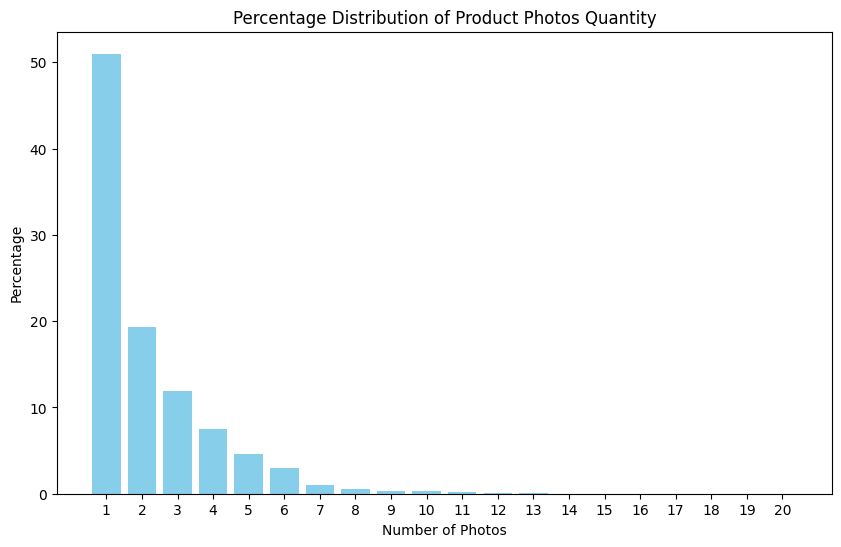

In [167]:
# Bar chart for percentage distribution of product_photos_qty
photo_counts = prod_df_final['product_photos_qty'].value_counts(normalize=True) * 100
photo_counts = photo_counts.sort_index()  # Ensure the order is from 1 to 20

plt.figure(figsize=(10, 6))
plt.bar(photo_counts.index, photo_counts.values, color='skyblue')
plt.title('Percentage Distribution of Product Photos Quantity')
plt.xlabel('Number of Photos')
plt.ylabel('Percentage')
plt.xticks(range(1, 21))  # Setting ticks for 1 through 20 photos
plt.show()

In [168]:
prod_df_final.head()

,product_id,product_description_lenght,product_photos_qty,product_weight_g,volume_cm3,product_category_name_english,is_perfumery,is_art,is_sports_leisure,is_baby,...,is_pc_gamer,is_furniture_bedroom,is_cine_photo,is_diapers_and_hygiene,is_flowers,is_home_comfort_2,is_portable_kitchen_appliances_and_food_processors,is_security_and_services,is_furniture_mattress_and_upholstery,is_cds_dvds_musicals
0,1e9e8ef04dbcff4541ed26657ea517e5,287.0,1.0,225.0,2240.0,perfumery,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3aa071139cb16b67ca9e5dea641aaa2f,276.0,1.0,1000.0,10800.0,art,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,96bd76ec8810374ed1b65e291975717f,250.0,1.0,154.0,2430.0,sports_leisure,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,cef67bcfe19066a932b7673e239eb23d,261.0,1.0,371.0,2704.0,baby,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,9dc1a7de274444849c219cff195d0b71,402.0,4.0,625.0,4420.0,housewares,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Data Understanding and Initial Data Preparation | Olist_Orders Dataset

Important features to consider:
*   `order_id`: unique ID of the order
*    `customer_id`: unique ID per order
* `order_status`: delivery status of order
* `order_purchase_timestamp`: time order was purchased
* `order_approved_at`: time order was approved
* `order_delivered_carrier_date`: time order was delivered to carrier
* `order_estimated_delivery_date`: estimtated delivery time
*  `order_delivered_customer_date`: actual delivery time of order



In [169]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [170]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [171]:
for i in range(len(orders_df['order_status'].unique())):
  print(orders_df['order_status'].unique()[i])

delivered
invoiced
shipped
processing
unavailable
canceled
created
approved


In [172]:

'''
DATA CLEANING:
1. order_id and customer_id is already unique
2. categories of order_status has 6 stages (excluding cancellation/unavailable): created -> approved -> processing -> invoiced --> shipped -> delivered
   in case of cancellation:  -> cancelled -> unavailable
3. Change all datetime columns into datetime
4. Remove rows in which status is not delivered, as we are only interest in delivered orders which we will predict the reviewing ratings
5. Check datatime stamp purchase <= order approved <= order delivered carrier <= order deliver
'''
#based on this the rows of order_id appears to be unique 99441. And cross checking with rows of unique customer_id, the number of rows align as well.
n_col=orders_df.shape[1]
for i in range(n_col):
  print("Number of rows in {}:".format(orders_df.columns[i]),orders_df[orders_df.columns[i]].shape[0])
  print("Number of unique {}:".format(orders_df.columns[i]),orders_df[orders_df.columns[i]].nunique())


#checking for duplicates across all columns
duplicate_orders = orders_df[orders_df.duplicated()]
print("Number of duplicate rows:", duplicate_orders.shape[0])

#checking for duplicates across specific columns
duplicate_status = orders_df[orders_df.duplicated(subset=['order_id', 'order_status'])]
print("Number of duplicate rows:", duplicate_status.shape[0])

Number of rows in order_id: 99441
Number of unique order_id: 99441
Number of rows in customer_id: 99441
Number of unique customer_id: 99441
Number of rows in order_status: 99441
Number of unique order_status: 8
Number of rows in order_purchase_timestamp: 99441
Number of unique order_purchase_timestamp: 98875
Number of rows in order_approved_at: 99441
Number of unique order_approved_at: 90733
Number of rows in order_delivered_carrier_date: 99441
Number of unique order_delivered_carrier_date: 81018
Number of rows in order_delivered_customer_date: 99441
Number of unique order_delivered_customer_date: 95664
Number of rows in order_estimated_delivery_date: 99441
Number of unique order_estimated_delivery_date: 459
Number of duplicate rows: 0
Number of duplicate rows: 0


order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64


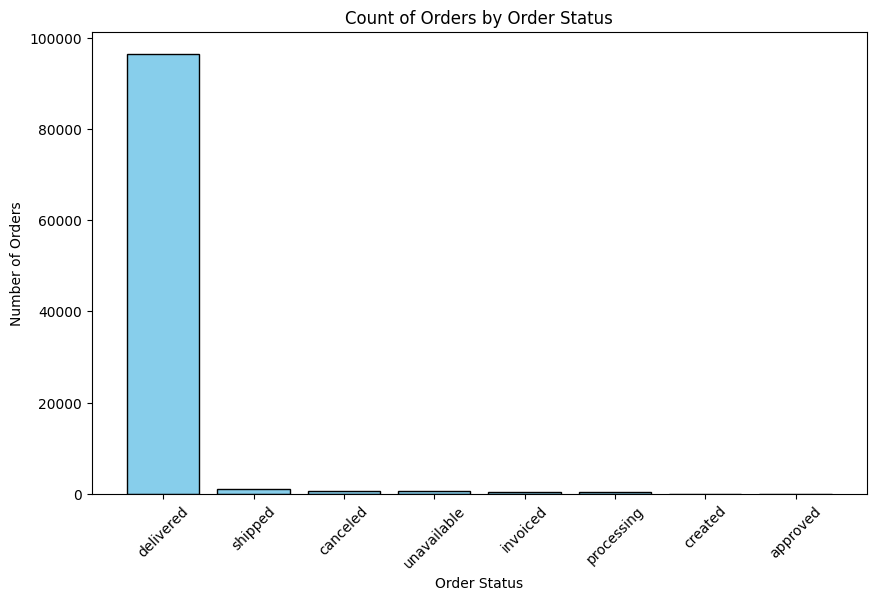

In [173]:
''' DATA INVESTIGATION

1. Distribution of order count by order status
2. Estimated Delivery Date versus Delivered to Customer
3. Number of days distribution from order purchase to delivered date

'''

order_count = orders_df['order_status'].value_counts()  # Counts for each status
unique_order = order_count.index                        # Unique order statuses


print(order_count)
# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(x=unique_order, height=order_count, color='skyblue', edgecolor='black')
plt.title('Count of Orders by Order Status')
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

In [174]:
date_cols = orders_df.columns[3:]

#coverting all into dates

for date in date_cols:
  orders_df[date] = pd.to_datetime(orders_df[date]).dt.normalize()

orders_df.info()


#checking date-time values
col_len = len(orders_df.columns)
col_len


#Calculate time difference in days:

orders_df['days_purchase_to_approved'] = (orders_df['order_approved_at'] - orders_df['order_purchase_timestamp']).dt.days
orders_df['days_approved_to_carrier'] = (orders_df['order_delivered_carrier_date'] - orders_df['order_approved_at']).dt.days
orders_df['days_carrier_to_customer'] = (orders_df['order_delivered_customer_date'] - orders_df['order_delivered_carrier_date']).dt.days
orders_df['days_customer_to_estimated'] = (orders_df['order_estimated_delivery_date'] - orders_df['order_delivered_customer_date']).dt.days
orders_df['delivery_minus_purchase'] = (orders_df['order_delivered_customer_date'] - orders_df['order_purchase_timestamp']).dt.days


date_issue_1 = orders_df[orders_df['order_approved_at']>orders_df['order_delivered_carrier_date']]
#number of rows with order_date later than the delivered carrier date

#represents 0.68% of the dataset
print("Percentage of order_approved date issue:{}%".format(round(date_issue_1.shape[0]/orders_df.shape[0]*100,2)))


#represents 0.02% of the dataset
date_issue_2 = orders_df[orders_df['order_delivered_carrier_date']>orders_df['order_delivered_customer_date']]
print("Percentage of order_approved date issue:{}%".format(round(date_issue_2.shape[0]/orders_df.shape[0]*100,2)))


#date_issue_3 represents 6% of the dataset,
date_issue_3 = orders_df[(orders_df['order_delivered_customer_date']>orders_df['order_estimated_delivery_date']) & (orders_df['order_status']=='delivered')]
print("Percentage of error delivery date :{}%".format(round(date_issue_3.shape[0]/orders_df.shape[0]*100,2)))



column_to_clean = ['days_purchase_to_approved','days_approved_to_carrier','days_carrier_to_customer','days_customer_to_estimated']
for col in column_to_clean:
    print('Negative Values in',col,':',orders_df[orders_df[col] < 0].shape[0])


#clean the negative values

column_to_clean = ['days_purchase_to_approved','days_approved_to_carrier','days_carrier_to_customer']

for col in column_to_clean:
  orders_df = orders_df.loc[orders_df[col]>=0]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB
Percentage of order_approved date issue:0.68%
Percentage of order_approved date issue:0.02%
Percentage of error delivery date :6.57%
Negative Values in days_purcha

In [175]:

n_col=orders_df.shape[1]
for i in range(n_col):
  print("Number of rows in {}:".format(orders_df.columns[i]),orders_df[orders_df.columns[i]].shape[0])
  print("Number of unique {}:".format(orders_df.columns[i]),orders_df[orders_df.columns[i]].nunique())

Number of rows in order_id: 95767
Number of unique order_id: 95767
Number of rows in customer_id: 95767
Number of unique customer_id: 95767
Number of rows in order_status: 95767
Number of unique order_status: 2
Number of rows in order_purchase_timestamp: 95767
Number of unique order_purchase_timestamp: 612
Number of rows in order_approved_at: 95767
Number of unique order_approved_at: 609
Number of rows in order_delivered_carrier_date: 95767
Number of unique order_delivered_carrier_date: 546
Number of rows in order_delivered_customer_date: 95767
Number of unique order_delivered_customer_date: 645
Number of rows in order_estimated_delivery_date: 95767
Number of unique order_estimated_delivery_date: 445
Number of rows in days_purchase_to_approved: 95767
Number of unique days_purchase_to_approved: 17
Number of rows in days_approved_to_carrier: 95767
Number of unique days_approved_to_carrier: 60
Number of rows in days_carrier_to_customer: 95767
Number of unique days_carrier_to_customer: 138

In [176]:
#only focusing on status='delivered' for rating reviews

orders_df = orders_df[orders_df['order_status']=='delivered']

In [177]:
# Select only numeric columns
numeric_cols = orders_df.select_dtypes(include=['number'])

# Find columns with negative values
negative_columns = numeric_cols.columns[(numeric_cols < 0).any()]
print(negative_columns)


orders_df.info()

Index(['days_customer_to_estimated'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 95761 entries, 0 to 99440
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       95761 non-null  object        
 1   customer_id                    95761 non-null  object        
 2   order_status                   95761 non-null  object        
 3   order_purchase_timestamp       95761 non-null  datetime64[ns]
 4   order_approved_at              95761 non-null  datetime64[ns]
 5   order_delivered_carrier_date   95761 non-null  datetime64[ns]
 6   order_delivered_customer_date  95761 non-null  datetime64[ns]
 7   order_estimated_delivery_date  95761 non-null  datetime64[ns]
 8   days_purchase_to_approved      95761 non-null  float64       
 9   days_approved_to_carrier       95761 non-null  float64       
 10  days_carrier_to_customer       95

# Data Understanding and Initial Data Preparation | Olist_order_items_dataset



*   `order_id`: unique order
*   `order_item_id`
* `product_id`:unique identifier for product
* `seller_id`: unique identifier for seller
* `price`: price per order_item_id
* `freight_value`: cost borne by carrier



In [178]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [179]:
'''
Data Cleaning
1. Check for null values
2. Check for duplicate values
3. change data type 'shipping_limit_date to datetime
'''

#no null values across this
order_items_df.isnull().sum()

print('Number of duplicates:',order_items_df.duplicated().sum())
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date']).dt.normalize()
order_items_df.info()

Number of duplicates: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [180]:
n_col=order_items_df.shape[1]
for i in range(n_col):
  print("Number of rows in {}:".format(order_items_df.columns[i]),order_items_df[order_items_df.columns[i]].shape[0])
  print("Number of unique {}:".format(order_items_df.columns[i]),order_items_df[order_items_df.columns[i]].nunique())



Number of rows in order_id: 112650
Number of unique order_id: 98666
Number of rows in order_item_id: 112650
Number of unique order_item_id: 21
Number of rows in product_id: 112650
Number of unique product_id: 32951
Number of rows in seller_id: 112650
Number of unique seller_id: 3095
Number of rows in shipping_limit_date: 112650
Number of unique shipping_limit_date: 555
Number of rows in price: 112650
Number of unique price: 5968
Number of rows in freight_value: 112650
Number of unique freight_value: 6999


Product:
- we have 112650 unique product ids
- `order_item_id`: each item purchased in the same order

In [181]:
order_items_df.describe()

,order_item_id,shipping_limit_date,price,freight_value
count,112650.000000,112650,112650.000000,112650.000000
mean,1.197834,2018-01-07 02:28:41.480692480,120.653739,19.990320
min,1.000000,2016-09-19 00:00:00,0.850000,0.000000
25%,1.000000,2017-09-20 00:00:00,39.900000,13.080000
50%,1.000000,2018-01-26 00:00:00,74.990000,16.260000
75%,1.000000,2018-05-10 00:00:00,134.900000,21.150000
max,21.000000,2020-04-09 00:00:00,6735.000000,409.680000
std,0.705124,NaN,183.633928,15.806405


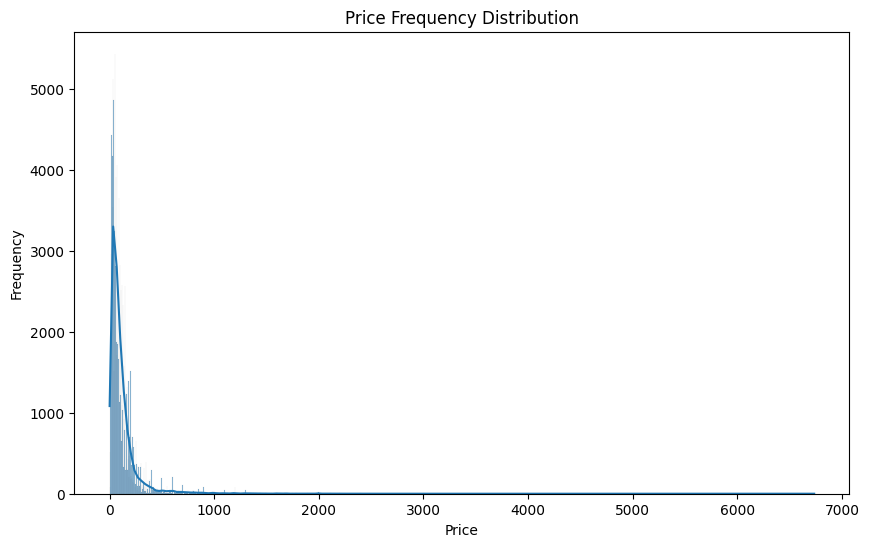

In [182]:
plt.figure(figsize=(10, 6))
sns.histplot(order_items_df['price'], kde=True)
plt.title('Price Frequency Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [183]:
order_item_agg = order_items_df.groupby(['order_id','product_id']).agg({'order_item_id':'count','price':'sum'}).reset_index()
order_item_agg = order_item_agg.sort_values(by='order_item_id',ascending=False)
order_item_agg = pd.merge(order_item_agg, order_items_df[['order_id', 'product_id', 'seller_id']], on=['order_id', 'product_id'], how='left')
order_item_agg.rename(columns={'order_item_id':'number_of_items'},inplace=True)
order_item_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   order_id         112650 non-null  object 
 1   product_id       112650 non-null  object 
 2   number_of_items  112650 non-null  int64  
 3   price            112650 non-null  float64
 4   seller_id        112650 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 4.3+ MB


# Data Understanding and Initial Data Preparation | Customers_df


*    `customer_id`: generated for every new purchase (old or new customers)
*   `customer_unique_id`: unique identifier of customer
* `customer_zip_code_prefix`
* `customer_city`
* `customer_state`



In [184]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


About olist_customers_dataset:

- `customer_id`: unique ID related to the order. Each new order generates a unique customer ID even if this customer has bought from the store before
- `customer_unique_id`: unique ID (one per customer) linked to their profile and order history
- `customer_zip_code_prefix`: first 5 characters of their zip code (post code)
- `customer_city`: the name of the city the customer lives
- `customer_state`: the state which the customer lives in


In total, there are 96096 unique customers in the brazilian e-commerce dataset, with 99441 purchases.

In [185]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [186]:
n_col=customers_df.shape[1]
for i in range(n_col):
  print("Number of rows in {}:".format(customers_df.columns[i]),customers_df[customers_df.columns[i]].shape[0])
  print("Number of unique {}:".format(customers_df.columns[i]),customers_df[customers_df.columns[i]].nunique())

Number of rows in customer_id: 99441
Number of unique customer_id: 99441
Number of rows in customer_unique_id: 99441
Number of unique customer_unique_id: 96096
Number of rows in customer_zip_code_prefix: 99441
Number of unique customer_zip_code_prefix: 14994
Number of rows in customer_city: 99441
Number of unique customer_city: 4119
Number of rows in customer_state: 99441
Number of unique customer_state: 27


In [187]:
#no null values in this dataset
print(customers_df.isnull().sum())
print(customers_df.duplicated().sum())

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
0


In [188]:
#top 5 customers, by grouping in this way, we can see that customer_unique_id can have multiple purchases reflected by the customer_id which is generated for every new purchase.
purchases = customers_df['customer_unique_id'].value_counts(ascending=False)
count_purchase = purchases[purchases> 1]
print("Repeated Number of Customers:",len(count_purchase))
print("Proportion of Repeated Customers",len(count_purchase)/len(purchases)*100)

Repeated Number of Customers: 2997
Proportion of Repeated Customers 3.1187562437562435


In [189]:
#total number of customers we have: 96096
print("Total Number of Customers:",customers_df['customer_unique_id'].nunique())
print("Total Number of Cities customers locate in:",customers_df['customer_city'].nunique())
print("Total Number of State customers locate in:",customers_df['customer_state'].nunique())

Total Number of Customers: 96096
Total Number of Cities customers locate in: 4119
Total Number of State customers locate in: 27


In [190]:
customers_df.drop(['customer_zip_code_prefix'],axis=1)
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


# Data Understanding and Initial Data Preparation | Order Reviews Dataset



*   `review_id`: unique identifier of review_id
*    `order_id`: unique identifier of order_id
* `review_score`: 1-5 score (1 = low, 5 high)
* `review_comment_message`
* `review_creation_date`
* `review_answer_timestamp`



In [191]:
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,97ca439bc427b48bc1cd7177abe71365,00010242fe8c5a6d1ba2dd792cb16214,5,NaN,"Perfeito, produto entregue antes do combinado.",21/09/2017 00:00,22/09/2017 10:57
1,7b07bacd811c4117b742569b04ce3580,00018f77f2f0320c557190d7a144bdd3,4,NaN,NaN,13/05/2017 00:00,15/05/2017 11:34
2,0c5b33dea94867d1ac402749e5438e8b,000229ec398224ef6ca0657da4fc703e,5,NaN,Chegou antes do prazo previsto e o produto sur...,23/01/2018 00:00,23/01/2018 16:06
3,f4028d019cb58564807486a6aaf33817,00024acbcdf0a6daa1e931b038114c75,4,NaN,NaN,15/08/2018 00:00,15/08/2018 16:39
4,940144190dcba6351888cafa43f3a3a5,00042b26cf59d7ce69dfabb4e55b4fd9,5,NaN,Gostei pois veio no prazo determinado .,02/03/2017 00:00,03/03/2017 10:54


In [192]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89999 entries, 0 to 89998
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                89999 non-null  object
 1   order_id                 89999 non-null  object
 2   review_score             89999 non-null  int64 
 3   review_comment_title     10595 non-null  object
 4   review_comment_message   37570 non-null  object
 5   review_creation_date     89999 non-null  object
 6   review_answer_timestamp  89999 non-null  object
dtypes: int64(1), object(6)
memory usage: 4.8+ MB


In [193]:
n_col = order_reviews_df.shape[1]
for i in range(n_col):
  print("Number of rows in {}:".format(order_reviews_df.columns[i]),order_reviews_df[order_reviews_df.columns[i]].shape[0])
  print("Number of unique {}:".format(order_reviews_df.columns[i]),order_reviews_df[order_reviews_df.columns[i]].nunique())

Number of rows in review_id: 89999
Number of unique review_id: 89322
Number of rows in order_id: 89999
Number of unique order_id: 89552
Number of rows in review_score: 89999
Number of unique review_score: 5
Number of rows in review_comment_title: 89999
Number of unique review_comment_title: 4223
Number of rows in review_comment_message: 89999
Number of unique review_comment_message: 33324
Number of rows in review_creation_date: 89999
Number of unique review_creation_date: 636
Number of rows in review_answer_timestamp: 89999
Number of unique review_answer_timestamp: 81397


In [194]:
'''
Data Cleaning
1. check for duplicated values
2. change columns with date to datetime type
'''

print("Number of duplicated values:",order_reviews_df.duplicated().sum())

date_col = order_reviews_df.columns[-2:]
for col in date_col:
  order_reviews_df[col] = pd.to_datetime(order_reviews_df[col]).dt.normalize()

order_reviews_df

Number of duplicated values: 0


<ipython-input-194-43f5809dc0a9>:11: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  order_reviews_df[col] = pd.to_datetime(order_reviews_df[col]).dt.normalize()
<ipython-input-194-43f5809dc0a9>:11: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  order_reviews_df[col] = pd.to_datetime(order_reviews_df[col]).dt.normalize()


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,97ca439bc427b48bc1cd7177abe71365,00010242fe8c5a6d1ba2dd792cb16214,5,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21,2017-09-22
1,7b07bacd811c4117b742569b04ce3580,00018f77f2f0320c557190d7a144bdd3,4,NaN,NaN,2017-05-13,2017-05-15
2,0c5b33dea94867d1ac402749e5438e8b,000229ec398224ef6ca0657da4fc703e,5,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23,2018-01-23
3,f4028d019cb58564807486a6aaf33817,00024acbcdf0a6daa1e931b038114c75,4,NaN,NaN,2018-08-15,2018-08-15
4,940144190dcba6351888cafa43f3a3a5,00042b26cf59d7ce69dfabb4e55b4fd9,5,NaN,Gostei pois veio no prazo determinado .,2017-03-02,2017-03-03
...,...,...,...,...,...,...,...
89994,9185f849f32d82e216a4e025e0c50f5c,fffc94f6ce00a00581880bf54a75a037,5,NaN,NaN,2018-05-11,2018-05-14
89995,be803f6a93d64719fd685c1cc610918a,fffcd46ef2263f404302a634eb57f7eb,5,NaN,NaN,2018-07-24,2018-07-25
89996,dbdd81cd59a1a9f94a10a990b4d48dce,fffce4705a9662cd70adb13d4a31832d,5,NaN,NaN,2017-10-29,2017-10-29
89997,fba117c9ac40d41ca7be54741f471303,fffe18544ffabc95dfada21779c9644f,5,NaN,Recebi o produto antes do prazo e corretamente.,2017-08-17,2017-08-18


# Data Understanding and Initial Data Preparation | Seller Data


*   `seller_id`
*   `seller_zip_code_prefix`
* `seller_city`
* `seller_state`



In [195]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [196]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [197]:

sellers_df = sellers_df.drop('seller_zip_code_prefix', axis=1)
sellers_df.head()

,seller_id,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,braganca paulista,SP


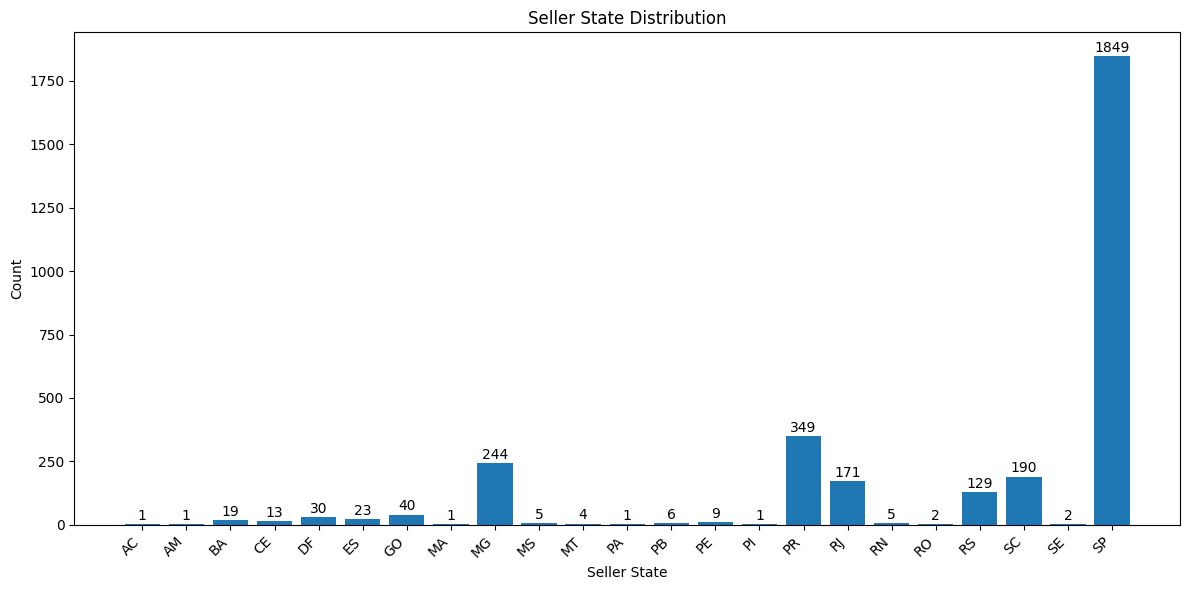

In [198]:
import matplotlib.pyplot as plt
state_counts = sellers_df.groupby('seller_state').size().reset_index(name='count')
plt.figure(figsize=(12, 6))
plt.bar(state_counts['seller_state'], state_counts['count'])

for i, count in enumerate(state_counts['count']):
    plt.text(i, count + 5, str(count), ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Seller State')
plt.ylabel('Count')
plt.title('Seller State Distribution')
plt.tight_layout()
plt.savefig('seller_state_distribution.png')

In [199]:
s_col=sellers_df.shape[1]
for i in range(s_col):
  print("Number of unique {}:".format(sellers_df.columns[i]),sellers_df[sellers_df.columns[i]].nunique())

Number of unique seller_id: 3095
Number of unique seller_city: 611
Number of unique seller_state: 23


# Final Data Preparation | Merging Dataframe

1. df1: join customer dataset with olist_orders on `customer_id` using left join


*   removing `zip_code_prefix` from the merging table as information as modelling based on this will decentralise focus from holistic predicitn of predicting  positive reviews and more on feature engineering of the geographical locations sellers and customers.


2. df2: join df1 with grouped_payments on `order_id` using left join
*   order_payments will be aggregated using the groupby() method to obtain the total transaction payment per order, number of installments per order as well as the payment types used for each transaction order.
*   payment installments will also be aggregated  
*   total number of payments will be included in the dataset.


3. df3: Merge olist_products with order_items_agg on `product_id` using left join


*   order_items will be aggegated as order_items_agg to calculate the number of items purchase within a single unique order and the total sum price value of the aggregated order items.
* freight value will be removed as this cost is not borne by the customer, rather the carrier.


4. df4: merge df2 with df3 as df4 on `order_id` using left join

5. df5: merge df4 with olist_review  on `order_id` using inner join

6. df6: merge df5 with seller_df on `seller_id` using inner join


*   `state_is_equal`: we have removed `zip_code_prefix` from our variables and a simplified method to obtain whether geographical location may have an impact on delivery and hence review_score, we have created a if-else method to check whether both seller and customer live in the same state or not. (same state = 1, not same state = 0 )




In [200]:
print(orders_df['customer_id'].nunique())
print(customers_df['customer_id'].nunique())

95761
99441


In [201]:
df1  = pd.merge(orders_df,customers_df,on='customer_id',how='left').drop(['customer_zip_code_prefix'],axis=1)
df1['customer_unique_id'].nunique()
df1['customer_id'].count()
df1.columns


Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'days_purchase_to_approved', 'days_approved_to_carrier',
       'days_carrier_to_customer', 'days_customer_to_estimated',
       'delivery_minus_purchase', 'customer_unique_id', 'customer_city',
       'customer_state'],
      dtype='object')

In [202]:
df2 = pd.merge(df1,payment_grouped,on="order_id",how='left')

df2.head()
df2.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'days_purchase_to_approved', 'days_approved_to_carrier',
       'days_carrier_to_customer', 'days_customer_to_estimated',
       'delivery_minus_purchase', 'customer_unique_id', 'customer_city',
       'customer_state', 'total_payments_method', 'total_payment_value',
       'num_of_installments', 'is_boleto', 'is_credit_card', 'is_debit_card',
       'is_voucher'],
      dtype='object')

In [203]:
df3 = pd.merge(order_item_agg,prod_df_final,on='product_id',how='left')
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 83 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   order_id                                            112650 non-null  object 
 1   product_id                                          112650 non-null  object 
 2   number_of_items                                     112650 non-null  int64  
 3   price                                               112650 non-null  float64
 4   seller_id                                           112650 non-null  object 
 5   product_description_lenght                          111046 non-null  float64
 6   product_photos_qty                                  111046 non-null  float64
 7   product_weight_g                                    111046 non-null  float64
 8   volume_cm3                                          111046 non-n

In [204]:
df4 = pd.merge(df2,df3,on='order_id',how='left')
df4.head()
df4.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'days_purchase_to_approved', 'days_approved_to_carrier',
       ...
       'is_pc_gamer', 'is_furniture_bedroom', 'is_cine_photo',
       'is_diapers_and_hygiene', 'is_flowers', 'is_home_comfort_2',
       'is_portable_kitchen_appliances_and_food_processors',
       'is_security_and_services', 'is_furniture_mattress_and_upholstery',
       'is_cds_dvds_musicals'],
      dtype='object', length=105)

In [205]:
df4 = pd.merge(df2,df3,on='order_id',how='left')
df4.reset_index(inplace=True)
df4.head()

,index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,days_purchase_to_approved,...,is_pc_gamer,is_furniture_bedroom,is_cine_photo,is_diapers_and_hygiene,is_flowers,is_home_comfort_2,is_portable_kitchen_appliances_and_food_processors,is_security_and_services,is_furniture_mattress_and_upholstery,is_cds_dvds_musicals
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-07-26,2018-07-26,2018-08-07,2018-08-13,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-08-08,2018-08-08,2018-08-17,2018-09-04,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18,2017-11-18,2017-11-22,2017-12-02,2017-12-15,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13,2018-02-13,2018-02-14,2018-02-16,2018-02-26,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [206]:
#merge the remaining tables with order_reviews_df
order_reviews_df
df5 = pd.merge(order_reviews_df,df4,on='order_id',how='inner')


In [207]:
df6 = pd.merge(df5,sellers_df,on='seller_id',how='left')
df6.reset_index(inplace=True)
df6.drop(['level_0','index'],axis=1,inplace=True)
df6.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,...,is_cine_photo,is_diapers_and_hygiene,is_flowers,is_home_comfort_2,is_portable_kitchen_appliances_and_food_processors,is_security_and_services,is_furniture_mattress_and_upholstery,is_cds_dvds_musicals,seller_city,seller_state
0,97ca439bc427b48bc1cd7177abe71365,00010242fe8c5a6d1ba2dd792cb16214,5,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21,2017-09-22,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,volta redonda,SP
1,7b07bacd811c4117b742569b04ce3580,00018f77f2f0320c557190d7a144bdd3,4,NaN,NaN,2017-05-13,2017-05-15,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,sao paulo,SP
2,0c5b33dea94867d1ac402749e5438e8b,000229ec398224ef6ca0657da4fc703e,5,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23,2018-01-23,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,borda da mata,MG
3,f4028d019cb58564807486a6aaf33817,00024acbcdf0a6daa1e931b038114c75,4,NaN,NaN,2018-08-15,2018-08-15,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,franca,SP
4,940144190dcba6351888cafa43f3a3a5,00042b26cf59d7ce69dfabb4e55b4fd9,5,NaN,Gostei pois veio no prazo determinado .,2017-03-02,2017-03-03,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,loanda,PR


In [208]:
cols = list(df6.columns)

seller_id_index = cols.index("seller_id")
cols_to_move = ["seller_city", "seller_state"]

for col in cols_to_move:
    cols.remove(col)
cols.insert(seller_id_index + 1, cols_to_move[1])
cols.insert(seller_id_index + 1, cols_to_move[0])

df6 = df6[cols]
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99103 entries, 0 to 99102
Columns: 113 entries, review_id to is_cds_dvds_musicals
dtypes: datetime64[ns](7), float64(90), int64(2), object(14)
memory usage: 85.4+ MB


In [209]:
df6['customer_state'] = df6['customer_state'].str.strip()
df6['seller_state'] = df6['seller_state'].str.strip()
df6['state_is_equal'] = df6.apply(lambda row: '1' if row['customer_state'] == row['seller_state'] else '0', axis=1)
df6['state_is_equal']=df6['state_is_equal'].astype('category')


In [210]:
#keep columns: len(description_length), price , number of order_items



#dataframe without category_names included
final_data  = df6[['review_id','order_id', 'review_score','customer_id',
     'days_purchase_to_approved',
       'days_approved_to_carrier', 'days_carrier_to_customer',
       'days_customer_to_estimated', 'delivery_minus_purchase',
       'customer_unique_id',
       'total_payments_method', 'total_payment_value',
       'number_of_items', 'price',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'volume_cm3', 'product_category_name_english',  'state_is_equal','num_of_installments',
        'is_boleto','is_credit_card','is_debit_card','is_voucher']]



In [211]:
#exporting merged datafram to csv file
from google.colab import files
final_data.to_csv('final_dataframe.csv', index=False)
files.download('final_dataframe.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# EDA of the Merged Dataframe




In [212]:
#Set the multiclassification
def category(score):
  if score <= 2:
    return 0 #[1-2:bad reviews]
  elif score==3:
    return 1 #[3,neutral]
  else:
    return 2 #[4-5,good]
final_data['review_category'] = final_data['review_score'].apply(category)
final_data['review_category'].astype('category')
final_data['review_category'].reset_index(drop=True,inplace=True)

<ipython-input-212-069787cb025c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['review_category'] = final_data['review_score'].apply(category)


#### Payment EDA

Percentage of Sales Transaction in 4-5 Rating Score: 71.78%


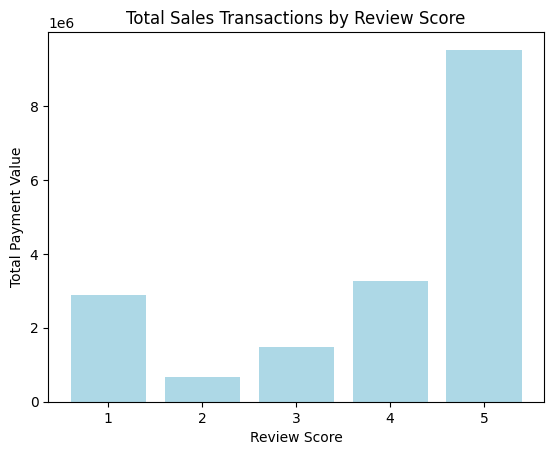

In [213]:
# Aggregate total_payment_value by review_score
agg_payment = final_data.groupby('review_score')['total_payment_value'].sum()
print("Percentage of Sales Transaction in 4-5 Rating Score: {}%".format(round(agg_payment[agg_payment.index>=4].sum()/agg_payment.sum()*100,2)))

# Plot the aggregated data
plt.bar(x=agg_payment.index, height=agg_payment.values, color='lightblue')

# Add labels and title for better visualization
plt.xlabel('Review Score')
plt.ylabel('Total Payment Value')
plt.title('Total Sales Transactions by Review Score')

# Show the plot
plt.show()


#### Product Category and Price EDA

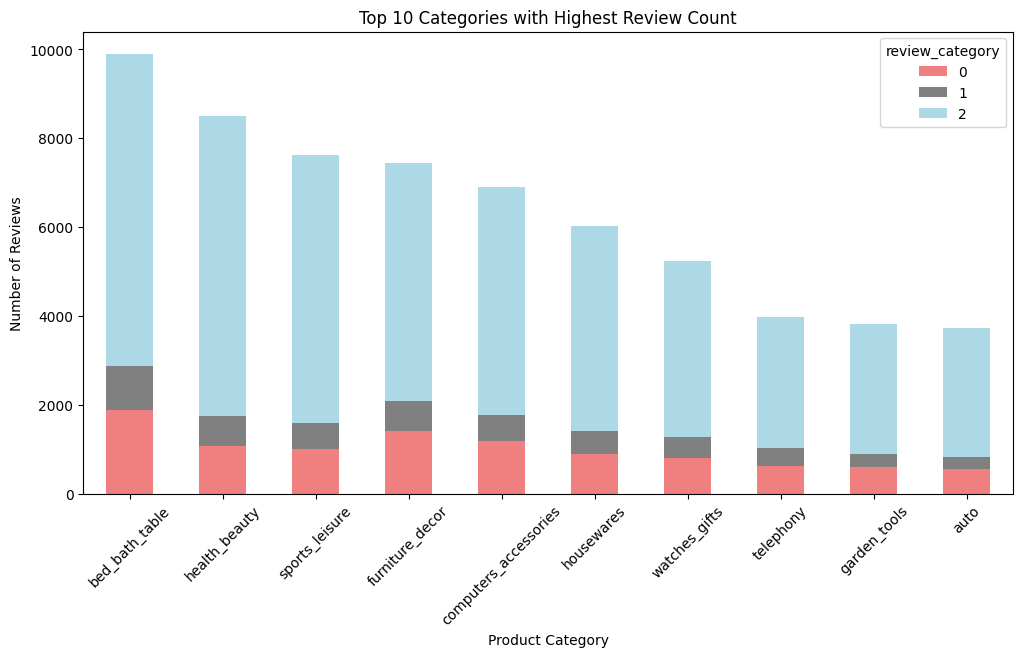

In [214]:

# Count reviews by product category and review category
review_counts = final_data.groupby(['product_category_name_english', 'review_category'])['review_score'].count().unstack(fill_value=0)

# Calculate total reviews for each category
review_counts['total_reviews'] = review_counts.sum(axis=1)


# Sort by total reviews and get the top 10
top_10_categories = review_counts.sort_values(by='total_reviews', ascending=False).head(10)
color = ['lightcoral','grey','lightblue']
# Plot the top 10 categories
top_10_categories[[0, 1, 2]].plot(
    kind='bar', stacked=True, figsize=(12, 6), title='Top 10 Categories with Highest Review Count',color=color)
plt.ylabel('Number of Reviews')
plt.xlabel('Product Category')
plt.xticks(rotation=45)
plt.show()




**Top 10 Product Categories with Highest Average Review Score**

In [215]:

# Calculate average review score for each product category
average_scores = final_data.groupby('product_category_name_english').agg({'review_score':'mean','review_id':'count'})

# Sort average scores to find top 10 and bottom 10
top_10_avg_scores = average_scores.sort_values(by='review_id',ascending=False).head(10)

pd.DataFrame(round(top_10_avg_scores,2))

,review_score,review_id
product_category_name_english,,
bed_bath_table,3.89,9905
health_beauty,4.19,8501
sports_leisure,4.16,7626
furniture_decor,3.93,7433
computers_accessories,3.98,6898
housewares,4.09,6029
watches_gifts,4.05,5231
telephony,3.99,3973
garden_tools,4.07,3827


**Top 10 Product Categories with Lowest Average Review Score**

In [216]:
bottom_10_avg_scores = average_scores.sort_values(by='review_score',ascending=True).head(10)
pd.DataFrame(round(bottom_10_avg_scores,2))

,review_score,review_id
product_category_name_english,,
security_and_services,2.50,2
pc_gamer,3.17,6
home_comfort_2,3.19,27
diapers_and_hygiene,3.30,33
portable_kitchen_appliances_and_food_processors,3.38,13
office_furniture,3.51,1508
fashion_male_clothing,3.67,112
audio,3.78,320
fixed_telephony,3.79,234


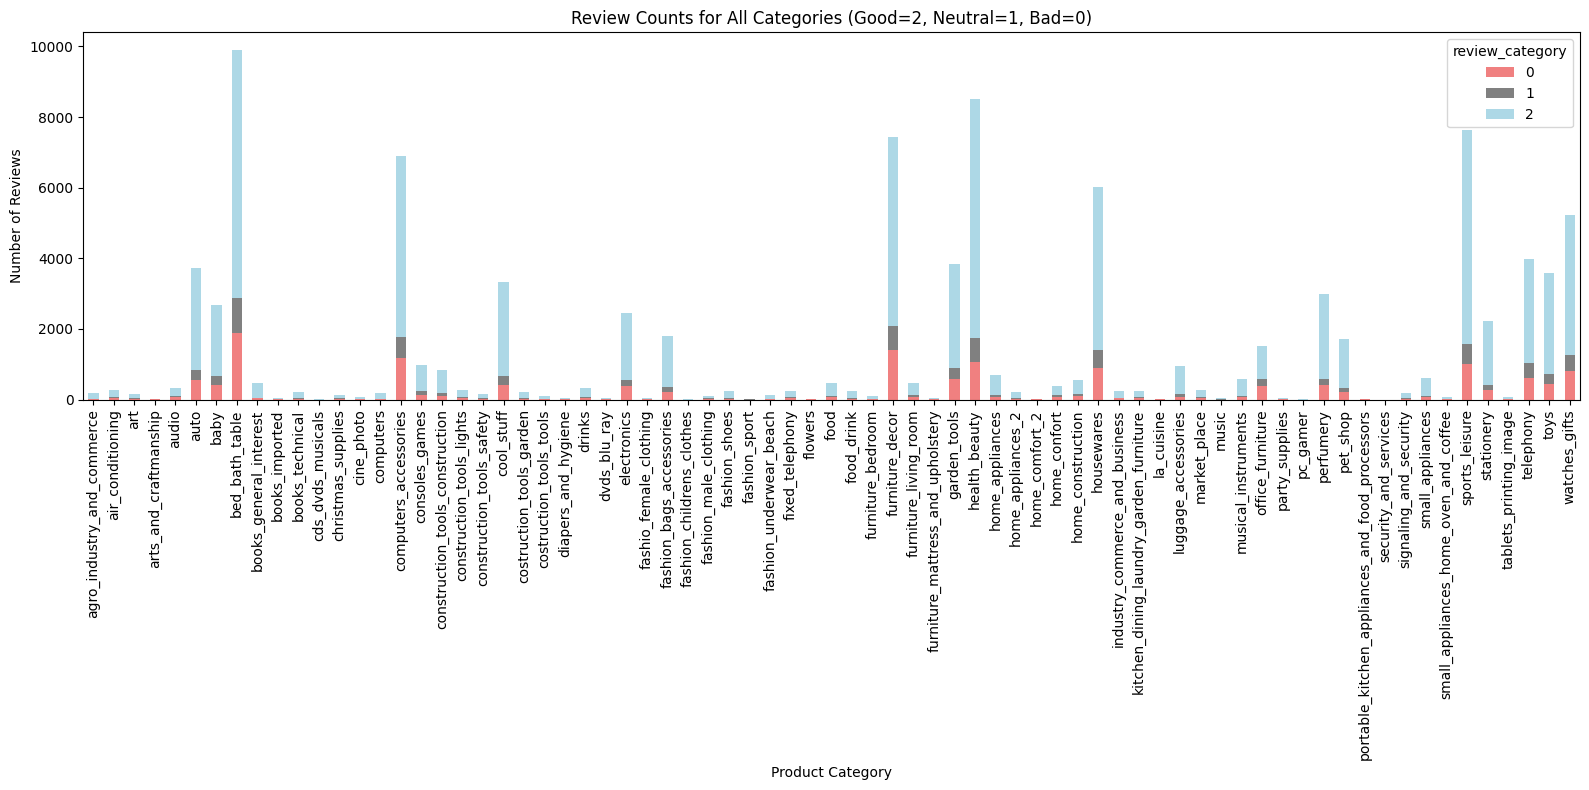

In [217]:

# Count reviews by product category and review category for all categories
review_counts_all = final_data.groupby(['product_category_name_english', 'review_category'])['review_score'].count().unstack(fill_value=0)

# Plot a bar chart for all categories
review_counts_all[[0, 1, 2]].plot(
    kind='bar', stacked=True, figsize=(16, 8), title='Review Counts for All Categories (Good=2, Neutral=1, Bad=0)',color=color)
plt.ylabel('Number of Reviews')
plt.xlabel('Product Category')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better visualization
plt.show()


Checking high standard deviation of review score among the product categories. Top 5 categories that were discovered to have high standard deviation were in fact a small proportion to the total order.

In [218]:
final_data.columns

Index(['review_id', 'order_id', 'review_score', 'customer_id',
       'days_purchase_to_approved', 'days_approved_to_carrier',
       'days_carrier_to_customer', 'days_customer_to_estimated',
       'delivery_minus_purchase', 'customer_unique_id',
       'total_payments_method', 'total_payment_value', 'number_of_items',
       'price', 'product_description_lenght', 'product_photos_qty',
       'product_weight_g', 'volume_cm3', 'product_category_name_english',
       'state_is_equal', 'num_of_installments', 'is_boleto', 'is_credit_card',
       'is_debit_card', 'is_voucher', 'review_category'],
      dtype='object')

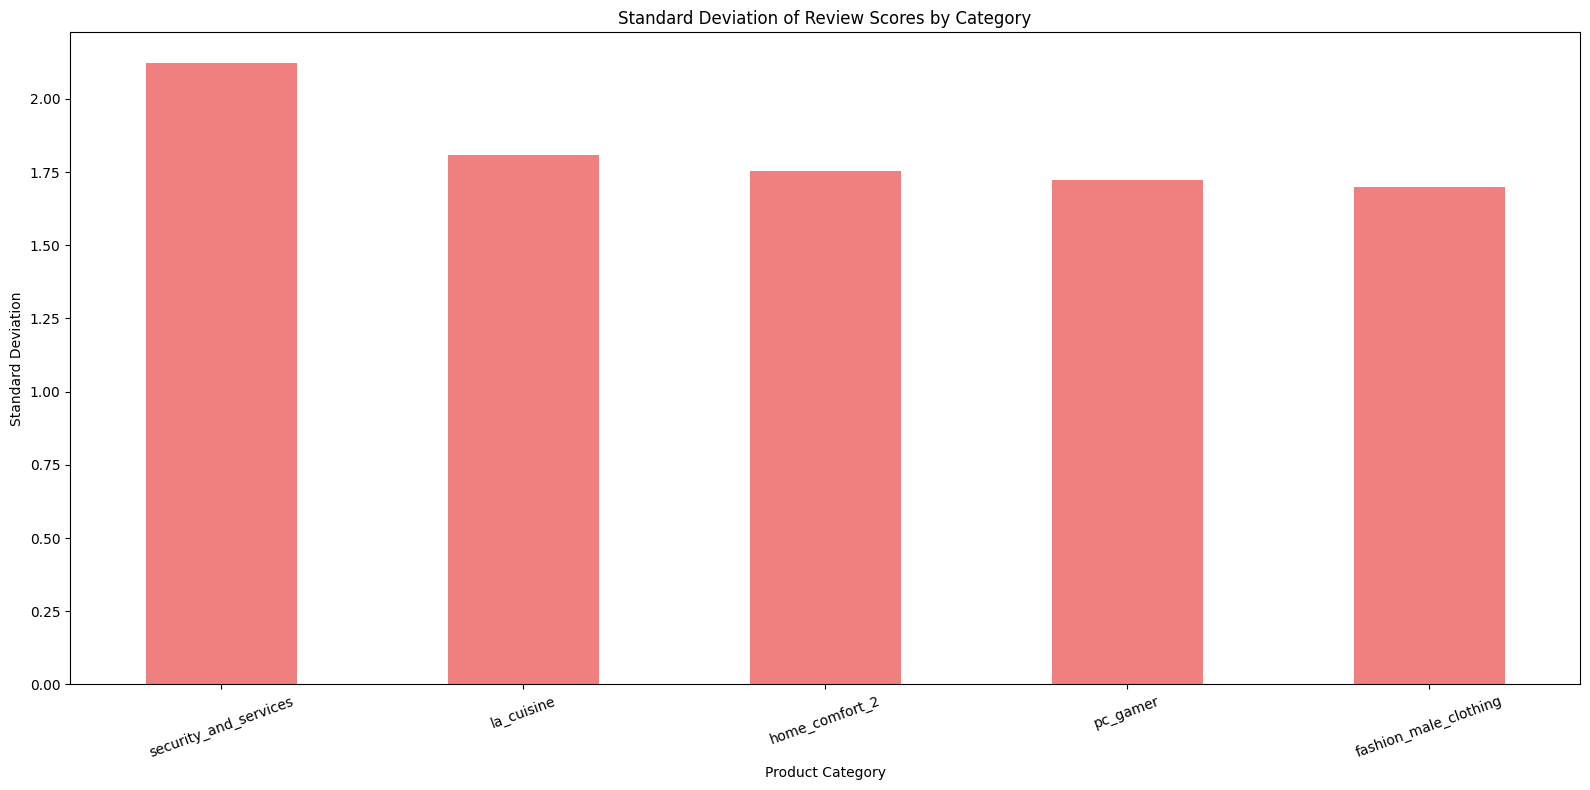

Percentage of Orders security_and_services: 0.0
Percentage of Orders la_cuisine: 0.01
Percentage of Orders home_comfort_2: 0.03
Percentage of Orders pc_gamer: 0.01
Percentage of Orders fashion_male_clothing: 0.11


In [219]:
# Calculate standard deviation of review scores for each category
std_scores = final_data.groupby('product_category_name_english')['review_score'].std().sort_values(ascending=False).head(5)
# Sort by standard deviation and plot
std_scores.sort_values(ascending=False).plot(
    kind='bar', figsize=(16, 8), title='Standard Deviation of Review Scores by Category', color='lightcoral')
plt.ylabel('Standard Deviation')
plt.xlabel('Product Category')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


#check if these 5 categories are high in proportion to the total count of the total product categories
for col in std_scores.index:
  print("Percentage of Orders {}:".format(col),round(final_data[final_data['product_category_name_english']==col]['review_id'].count()/final_data['review_id'].count()*100,2))


#### Delivery Process EDA

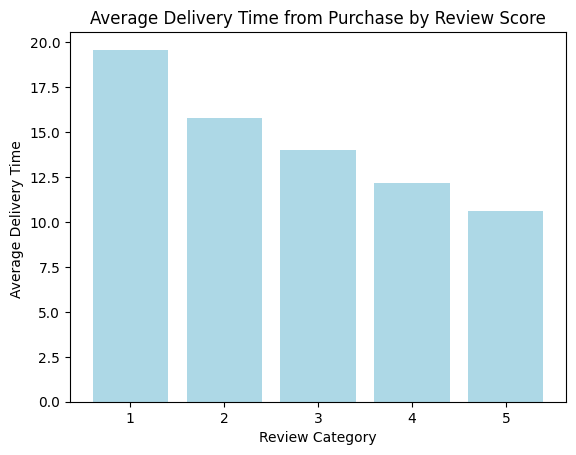

In [220]:
#delivery_minus_purchase average
dv_p = final_data.groupby(['review_score']).agg({'delivery_minus_purchase':'mean'})
plt.bar(x=dv_p.index, height=dv_p['delivery_minus_purchase'].values, color='lightblue') # Changed line
plt.xlabel('Review Category')
plt.ylabel('Average Delivery Time ')
plt.title('Average Delivery Time from Purchase by Review Score')
plt.show()

Wchih product category has the highest average lead time

In [221]:

#Find which product category has highest average lead time: Create Table and Head(5)
final_data.groupby('product_category_name_english').agg({'delivery_minus_purchase':'mean','review_id':'count'}).sort_values(by=['delivery_minus_purchase','review_id'],
                                                                                                                            ascending=[False,False]).head(10)

,delivery_minus_purchase,review_id
product_category_name_english,,
office_furniture,20.892573,1508
christmas_supplies,16.242647,136
home_comfort_2,15.444444,27
fashion_shoes,15.371795,234
security_and_services,15.000000,2
furniture_mattress_and_upholstery,14.485714,35
home_appliances_2,14.305825,206
furniture_living_room,13.835886,457
fashion_underwear_beach,13.741667,120


In [222]:
#Average payment value by review category
final_data.groupby('review_category').agg({'total_payment_value':'mean'})

,total_payment_value
review_category,
0,235.768392
1,176.276965
2,168.791878


#### Customer and Seller EDA

In [223]:
#state_is_equal by category_review; not much difference by viewing state_is_equal
final_data.groupby('state_is_equal').agg({'review_score':'mean'})

<ipython-input-223-d348d9c14d5e>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  final_data.groupby('state_is_equal').agg({'review_score':'mean'})


,review_score
state_is_equal,
0,3.998594
1,4.185311


Proportion of Customers Giving either 4-5 Rating: 76.38%


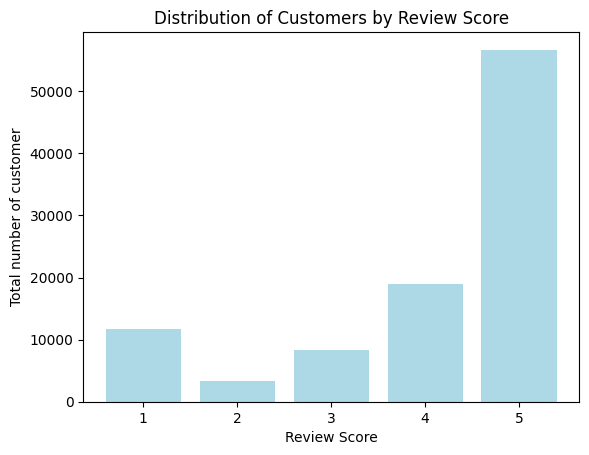

In [224]:
count_customer = final_data.groupby('review_score')['customer_id'].count()
#Proportion of satisfied customers (Review score: 4-5):
print("Proportion of Customers Giving either 4-5 Rating: {}%".format(round(count_customer[count_customer.index>=4].sum()/count_customer.sum()*100,2)))


# Plot the aggregated data
plt.bar(x=count_customer.index, height=count_customer.values, color='lightblue')

# Add labels and title for better visualization
plt.xlabel('Review Score')
plt.ylabel('Total number of customer')
plt.title('Distribution of Customers by Review Score')

# Show the plot
plt.show()



In [225]:
count_customer

,customer_id
review_score,
1,11685
2,3382
3,8344
4,18987
5,56705


Customers versus Seller in terms of `state_is_equal`

Proportion of Seller receiving  either 4-5 Rating: 76.38%


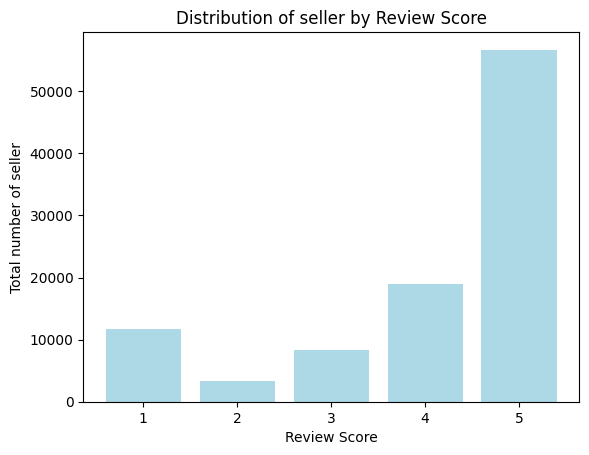

In [226]:
count_seller = df6.groupby('review_score')['seller_id'].count()
#Proportion of satisfied customers (Review score: 4-5):
print("Proportion of Seller receiving  either 4-5 Rating: {}%".format(round(count_seller[count_seller.index>=4].sum()/count_seller.sum()*100,2)))


# Plot the aggregated data
plt.bar(x=count_seller.index, height=count_seller.values, color='lightblue')

# Add labels and title for better visualization
plt.xlabel('Review Score')
plt.ylabel('Total number of seller')
plt.title('Distribution of seller by Review Score')

# Show the plot
plt.show()



### Review EDA

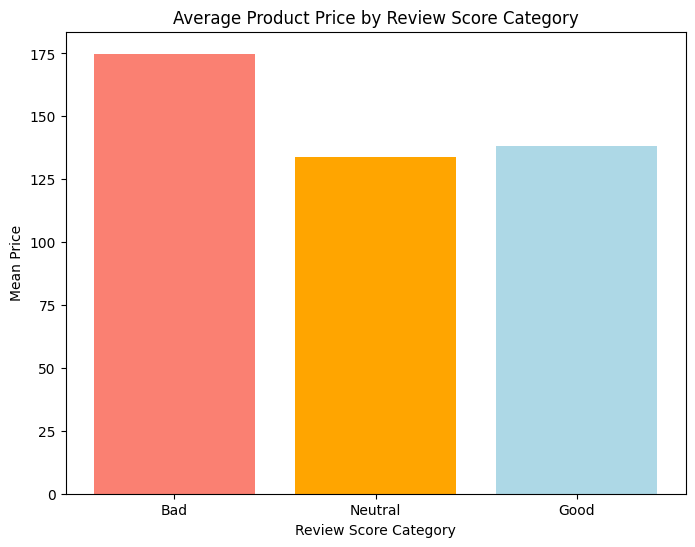

In [227]:
review_categories = final_data['review_category'].unique()
def review_name(review_category):
  if review_category == 0:
    return 'Bad'
  elif review_category == 1:
    return 'Neutral'
  else:
    return 'Good'


mean_prices = final_data.groupby('review_category')['price'].mean()
mean_prices.index = mean_prices.index.map(review_name)


plt.figure(figsize=(8, 6))
plt.bar(mean_prices.index, mean_prices.values, color=['salmon', 'orange', 'lightblue'])

plt.title('Average Product Price by Review Score Category')
plt.xlabel('Review Score Category')
plt.ylabel('Mean Price')


plt.show()

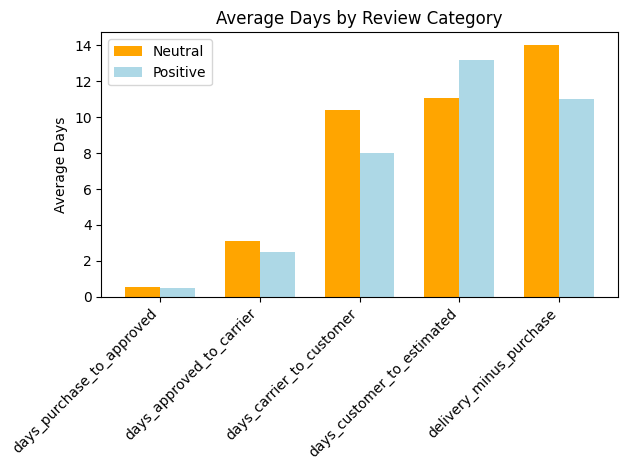

In [228]:
# Average Calculation: Analysis between customers who rated neutral review scores as opposed to positive review scores
import numpy as np
columns = ['days_purchase_to_approved', 'days_approved_to_carrier', 'days_carrier_to_customer', 'days_customer_to_estimated', 'delivery_minus_purchase']

neutral_data = final_data[final_data['review_category']==1]
positive_data = final_data[final_data['review_category']==2]


neutral_means =  neutral_data[columns].mean()
positive_means = positive_data[columns].mean()

# plotting
bar_width = 0.35
index = np.arange(len(columns))

fig, ax = plt.subplots()
rects1 = ax.bar(index, neutral_means, bar_width, color='orange' ,label='Neutral')
rects2 = ax.bar(index + bar_width, positive_means, bar_width,color='lightblue' ,label='Positive')

ax.set_title('Average Days by Review Category')
ax.set_ylabel('Average Days')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(columns, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

<ipython-input-229-0cdf8f3d8678>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['days_purchase_to_approved_bin'] = pd.cut(final_data['days_purchase_to_approved'], bins=bins, labels=labels, right=False)
<ipython-input-229-0cdf8f3d8678>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['days_approved_to_carrier_bin'] = pd.cut(final_data['days_approved_to_carrier'], bins=bins, labels=labels, right=False)
<ipython-input-229-0cdf8f3d8678>:8: SettingWithCopyWarning: 
A value is trying to be

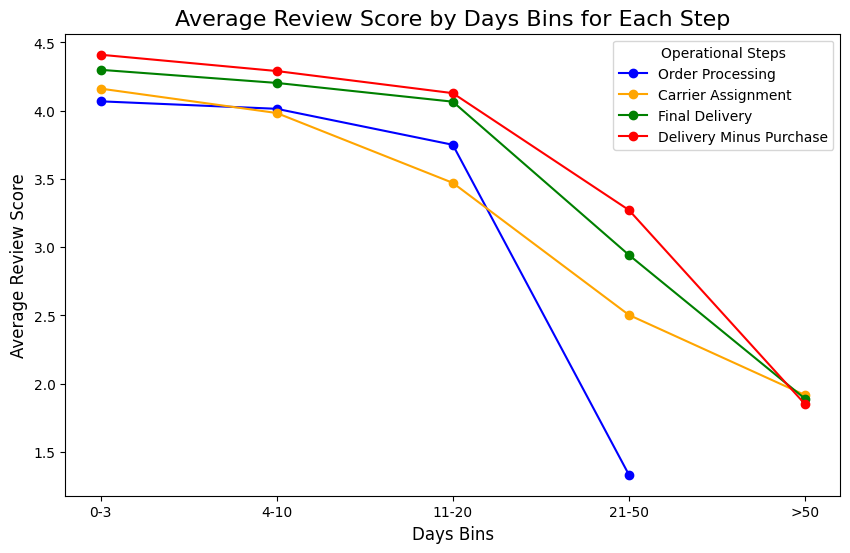

In [229]:


# Define bins for categorization
bins = [0, 3, 10, 20, 50, float('inf')]
labels = ['0-3', '4-10', '11-20', '21-50', '>50']

# Apply bins to the relevant columns
final_data['days_purchase_to_approved_bin'] = pd.cut(final_data['days_purchase_to_approved'], bins=bins, labels=labels, right=False)
final_data['days_approved_to_carrier_bin'] = pd.cut(final_data['days_approved_to_carrier'], bins=bins, labels=labels, right=False)
final_data['days_carrier_to_customer_bin'] = pd.cut(final_data['days_carrier_to_customer'], bins=bins, labels=labels, right=False)
final_data['delivery_minus_purchase_bin'] = pd.cut(final_data['delivery_minus_purchase'], bins=bins, labels=labels, right=False)

# Calculate average review scores for each step
line_data = {
    'Order Processing': final_data.groupby('days_purchase_to_approved_bin')['review_score'].mean(),
    'Carrier Assignment': final_data.groupby('days_approved_to_carrier_bin')['review_score'].mean(),
    'Final Delivery': final_data.groupby('days_carrier_to_customer_bin')['review_score'].mean(),
    'Delivery Minus Purchase': final_data.groupby('delivery_minus_purchase_bin')['review_score'].mean()
}

import matplotlib.pyplot as plt

# Plot the line chart
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['blue', 'orange', 'green', 'red']  # Add color for the new line
for i, (label, avg_scores) in enumerate(line_data.items()):
    ax.plot(labels, avg_scores, marker='o', color=colors[i], label=label)

# Add labels and legend
ax.set_title('Average Review Score by Days Bins for Each Step', fontsize=16)
ax.set_xlabel('Days Bins', fontsize=12)
ax.set_ylabel('Average Review Score', fontsize=12)
ax.legend(title='Operational Steps', fontsize=10)
plt.show()

In [230]:
final_data = final_data.drop(columns=[ 'days_purchase_to_approved_bin', 'days_approved_to_carrier_bin',
       'days_carrier_to_customer_bin', 'delivery_minus_purchase_bin'])


In [231]:
final_data.columns

Index(['review_id', 'order_id', 'review_score', 'customer_id',
       'days_purchase_to_approved', 'days_approved_to_carrier',
       'days_carrier_to_customer', 'days_customer_to_estimated',
       'delivery_minus_purchase', 'customer_unique_id',
       'total_payments_method', 'total_payment_value', 'number_of_items',
       'price', 'product_description_lenght', 'product_photos_qty',
       'product_weight_g', 'volume_cm3', 'product_category_name_english',
       'state_is_equal', 'num_of_installments', 'is_boleto', 'is_credit_card',
       'is_debit_card', 'is_voucher', 'review_category'],
      dtype='object')

<ipython-input-232-2618cf244604>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


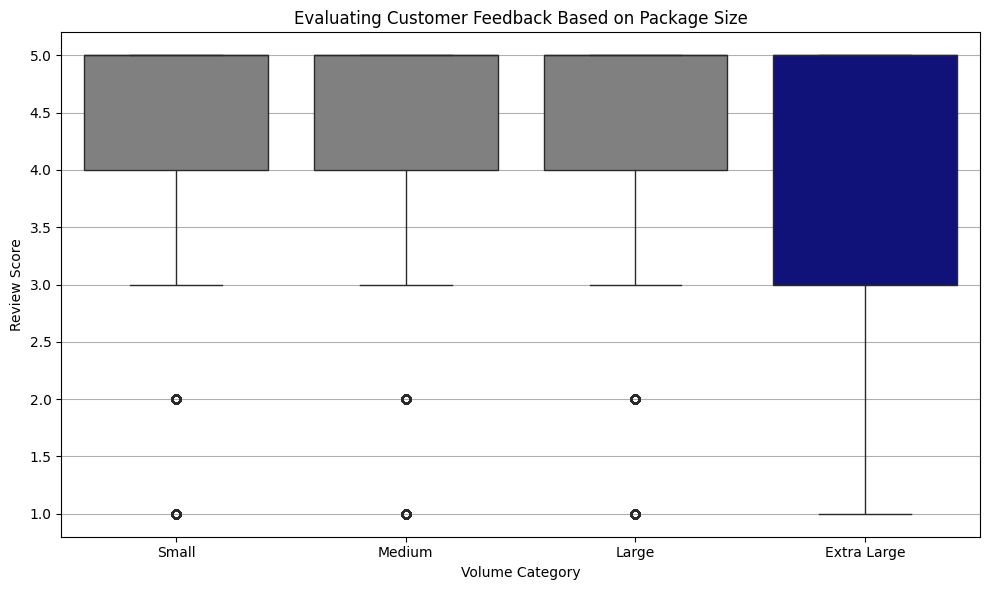

In [232]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 4: Define volume categories
def classify_volume(volume):
    if volume <= 5000:
        return 'Small'
    elif volume <= 20000:
        return 'Medium'
    elif volume <= 50000:
        return 'Large'
    else:
        return 'Extra Large'

# Apply the classification
final_data['volume_category'] = final_data['volume_cm3'].apply(classify_volume)

# Reorder the categories explicitly
category_order = ['Small', 'Medium', 'Large', 'Extra Large']

# Plot the boxplot with custom colors
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='volume_category',
    y='review_score',
    data=final_data,
    palette={
        'Small': 'gray',
        'Medium': 'gray',
        'Large': 'gray',
        'Extra Large': 'darkblue'  # Custom color for Extra Large
    },
    order=category_order
)
plt.title('Evaluating Customer Feedback Based on Package Size')
plt.xlabel('Volume Category')
plt.ylabel('Review Score')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [233]:
final_data = final_data.drop(columns='volume_category')
final_data.columns

Index(['review_id', 'order_id', 'review_score', 'customer_id',
       'days_purchase_to_approved', 'days_approved_to_carrier',
       'days_carrier_to_customer', 'days_customer_to_estimated',
       'delivery_minus_purchase', 'customer_unique_id',
       'total_payments_method', 'total_payment_value', 'number_of_items',
       'price', 'product_description_lenght', 'product_photos_qty',
       'product_weight_g', 'volume_cm3', 'product_category_name_english',
       'state_is_equal', 'num_of_installments', 'is_boleto', 'is_credit_card',
       'is_debit_card', 'is_voucher', 'review_category'],
      dtype='object')

<ipython-input-234-910893cd61bb>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=final_data, x=price_bins, y='review_score', palette=['gray', 'gray', 'gray', 'darkblue'])


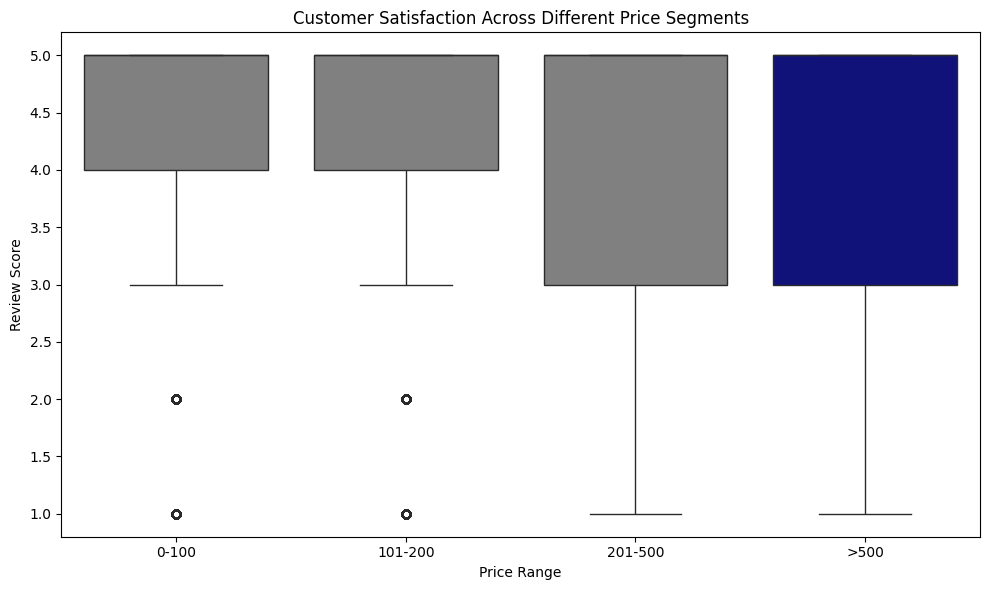

In [234]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the new bins for price by merging the first two bins
price_bins = pd.cut(
    final_data['price'],
    bins=[0, 100, 200, 500, float('inf')],  # Combine the first two bins (0-50, 51-100) into one bin (0-100)
    labels=['0-100', '101-200', '201-500', '>500']  # Update the labels accordingly
)

# Box plot: Price bins vs. Review Score
plt.figure(figsize=(10, 6))
sns.boxplot(data=final_data, x=price_bins, y='review_score', palette=['gray', 'gray', 'gray', 'darkblue'])
plt.title('Customer Satisfaction Across Different Price Segments')
plt.xlabel('Price Range')
plt.ylabel('Review Score')
plt.tight_layout()
plt.show()


In [235]:
final_data.columns

Index(['review_id', 'order_id', 'review_score', 'customer_id',
       'days_purchase_to_approved', 'days_approved_to_carrier',
       'days_carrier_to_customer', 'days_customer_to_estimated',
       'delivery_minus_purchase', 'customer_unique_id',
       'total_payments_method', 'total_payment_value', 'number_of_items',
       'price', 'product_description_lenght', 'product_photos_qty',
       'product_weight_g', 'volume_cm3', 'product_category_name_english',
       'state_is_equal', 'num_of_installments', 'is_boleto', 'is_credit_card',
       'is_debit_card', 'is_voucher', 'review_category'],
      dtype='object')

# Multiclassification Data Modelling: XGBoost, GBDT, Random Forest
### Outline Steps

Multiclassification:  
* Class 0 (Bad): 1-2
* Class 1 (Neutral): 3
* Class 2 (Good): 4-5

**Using Train-Test Split for Model Evaluation (80% Training and 20% for Testing)**
* Using all features
*   Hyperparameter tuning

*   Calculate performance metrics (e.g. accuracy, precision, recall) for each iteration and comparing average values in micro, macro, and weighted

**Using Cross-Validation (K=5) for Model Evaluation**

*   Reduce number of features used
*   Hyperparameter tuning  given the reduced number of features
*   Calculate performance metrics (e.g. accuracy, precision, recall) for each iteration and comparing average values in micro, macro, and weighted




### Data Preparation for Modelling

###  Importing Sklearn libraries, Setting independent and dependent variables

In [236]:

'''

Method 1: Check using simple train test split

Method 2: Check using K-fold cross validation (set number = 3)

Random_State will be 42 for all methods

'''
from sklearn.metrics import precision_recall_fscore_support
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay as CM
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.model_selection  import train_test_split
import numpy as np


Model  1 without category_names included

In [237]:
md1 = final_data.copy()
md1.dropna(inplace=True)
md1.reset_index(drop=True,inplace=True)



#setting the x and y values
y_value = md1['review_category'] # set the y
y_values = np.ravel(y_value) # change to an array (list)
y_values = y_values
x_values = md1.drop(['review_score','review_category','review_id','order_id','customer_id','customer_unique_id','product_category_name_english'], axis=1) # drop the y from the dataframe
len(x_values.columns)
x_values.columns


Index(['days_purchase_to_approved', 'days_approved_to_carrier',
       'days_carrier_to_customer', 'days_customer_to_estimated',
       'delivery_minus_purchase', 'total_payments_method',
       'total_payment_value', 'number_of_items', 'price',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'volume_cm3', 'state_is_equal', 'num_of_installments', 'is_boleto',
       'is_credit_card', 'is_debit_card', 'is_voucher'],
      dtype='object')

## Best Model: XGBoost

We will proceed to using the dataset without the columns related to category_names as in the previous output, the inclusion of category_name does not increase the evaluation metric and causes an imbalance in feature selection

### 1. Importing libraries

In [ ]:
#hyperparameter tuning
from scipy.stats import randint,uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier as XGB


###  2. Initial XGBoost Modelling using Train-Test Split

#### Evaluation on Training Dataset

Accuracy:0.804
Macro Precision:0.861
Macro Recall:0.437
Macro F1-Score:0.452


Micro Precision:0.804
Micro Recall:0.804
Micro F1-Score:0.804


Weighted Precision:0.818
Weighted Recall:0.804
Weighted F1-Score:0.747


XGBoost Confusion Matrix


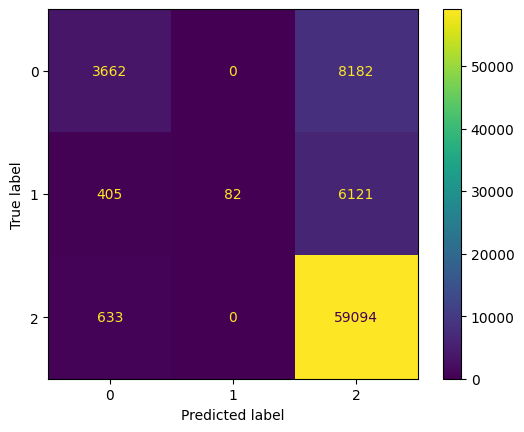

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.31      0.44     11844
           1       1.00      0.01      0.02      6608
           2       0.81      0.99      0.89     59727

    accuracy                           0.80     78179
   macro avg       0.86      0.44      0.45     78179
weighted avg       0.82      0.80      0.75     78179



In [ ]:

#stratify: let y_train and y_test have the same percentage of review_category
X_train,X_test,y_train,y_test = train_test_split(x_values,y_values,test_size=0.2,random_state=42,stratify=y_values)


XGB_algo = XGB(objective="multi:softmax",
                              eval_metric='merror',
                              n_estimators=1000,
                              learning_rate=0.01,
                              max_depth=5, #4-6 is generally good starting points
                              min_child_weight=1, #smaller value chosen because review_category class = 1 is smaller compared to the other groups
                              gamma = 0, #can be tuned later
                              missing=np.nan,
                              seed=42,
                              subsample=0.8, #common start value
                              num_class=3,
                              enable_categorical=True


                    )



XGB_algo.fit(X_train, y_train)

y_pred_train = XGB_algo.predict(X_train)



#calculate accuracy
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy:{}".format(round(accuracy,3)))



precision, recall, f1_score, _ = precision_recall_fscore_support(y_train, y_pred_train, average='macro')
print("Macro Precision:{}".format(round(precision,3)))
print("Macro Recall:{}".format(round(recall,3)))
print("Macro F1-Score:{}".format(round(f1_score,3)))
print("\n")


precision, recall, f1_score, _ = precision_recall_fscore_support(y_train, y_pred_train, average='micro')
print("Micro Precision:{}".format(round(precision,3)))
print("Micro Recall:{}".format(round(recall,3)))
print("Micro F1-Score:{}".format(round(f1_score,3)))
print("\n")



precision, recall, f1_score, _ = precision_recall_fscore_support(y_train, y_pred_train, average='weighted')

print("Weighted Precision:{}".format(round(precision,3)))
print("Weighted Recall:{}".format(round(recall,3)))
print("Weighted F1-Score:{}".format(round(f1_score,3)))
print("\n")


#XGBoost
print("XGBoost Confusion Matrix")
CM.from_predictions(y_train, y_pred_train)
plt.show()


#Calculate and print precision, recall, F1-score
print("Classification Report:")
print(classification_report(y_train,y_pred_train))


####  Evaluation on Testing Dataset

Accuracy:0.802
Macro Precision:0.836
Macro Recall:0.436
Macro F1-Score:0.449


Micro Precision:0.802
Micro Recall:0.802
Micro F1-Score:0.802


Weighted Precision:0.809
Weighted Recall:0.802
Weighted F1-Score:0.746


XGBoost Confusion Matrix


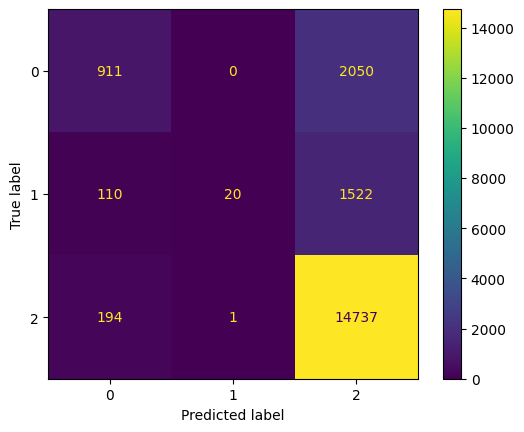

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.31      0.44      2961
           1       0.95      0.01      0.02      1652
           2       0.80      0.99      0.89     14932

    accuracy                           0.80     19545
   macro avg       0.84      0.44      0.45     19545
weighted avg       0.81      0.80      0.75     19545



In [ ]:

#stratify: let y_train and y_test have the same percentage of review_category
X_train,X_test,y_train,y_test = train_test_split(x_values,y_values,test_size=0.2,random_state=42,stratify=y_values)



XGB_algo = XGB(objective="multi:softmax",
                              eval_metric='merror',
                              n_estimators=1000,
                              learning_rate=0.01,
                              max_depth=5, #4-6 is generally good starting points
                              min_child_weight=1, #smaller value chosen because review_category class = 1 is smaller compared to the other groups
                              gamma = 0, #can be tuned later
                              missing=np.nan,
                              seed=42,
                              subsample=0.8, #common start value
                              num_class=3,
                              enable_categorical=True


                    )



XGB_algo.fit(X_train, y_train)

y_pred = XGB_algo.predict(X_test)



#calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:{}".format(round(accuracy,3)))



precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
print("Macro Precision:{}".format(round(precision,3)))
print("Macro Recall:{}".format(round(recall,3)))
print("Macro F1-Score:{}".format(round(f1_score,3)))
print("\n")


precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='micro')
print("Micro Precision:{}".format(round(precision,3)))
print("Micro Recall:{}".format(round(recall,3)))
print("Micro F1-Score:{}".format(round(f1_score,3)))
print("\n")



precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print("Weighted Precision:{}".format(round(precision,3)))
print("Weighted Recall:{}".format(round(recall,3)))
print("Weighted F1-Score:{}".format(round(f1_score,3)))
print("\n")


#XGBoost
print("XGBoost Confusion Matrix")
CM.from_predictions(y_test, y_pred)
plt.show()


#Calculate and print precision, recall, F1-score
print("Classification Report:")
print(classification_report(y_test,y_pred))


In the confusion matrix, we observe that the Class 1 prediction accuracy is close to 0%. We need to hyperparameter tune based on this minority class performance. Class 0 prediction accuracy is also quite low, but not as bad as Class 1 which represents the neutral review score.

#### XGBoost Plot Importance of the initial XGBoost Model Created

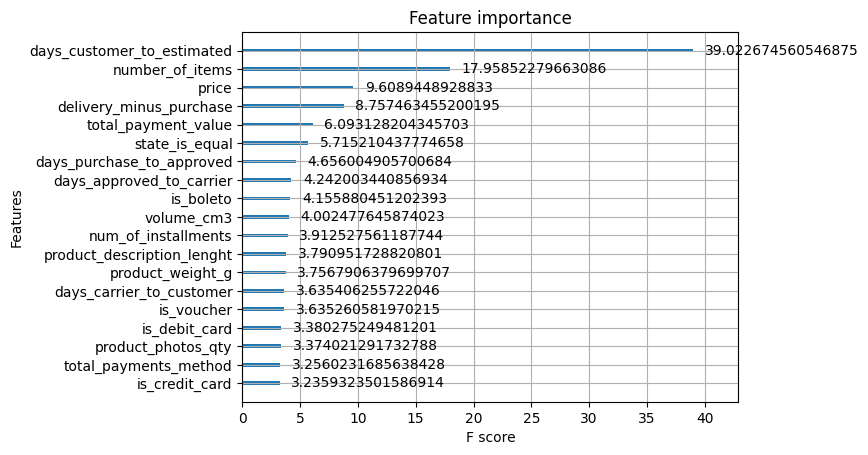

In [ ]:
# Plot feature importance
import xgboost as xgb
xgb.plot_importance(XGB_algo, importance_type='gain')
plt.show()

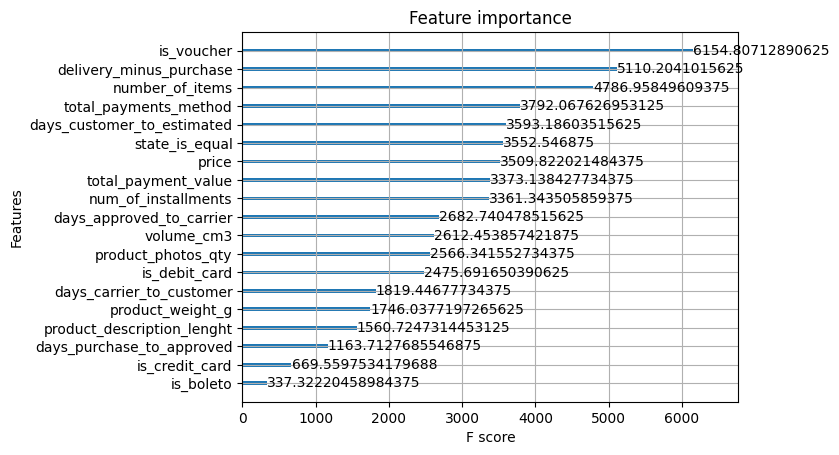

In [ ]:
xgb.plot_importance(XGB_algo, importance_type='cover')
plt.show()

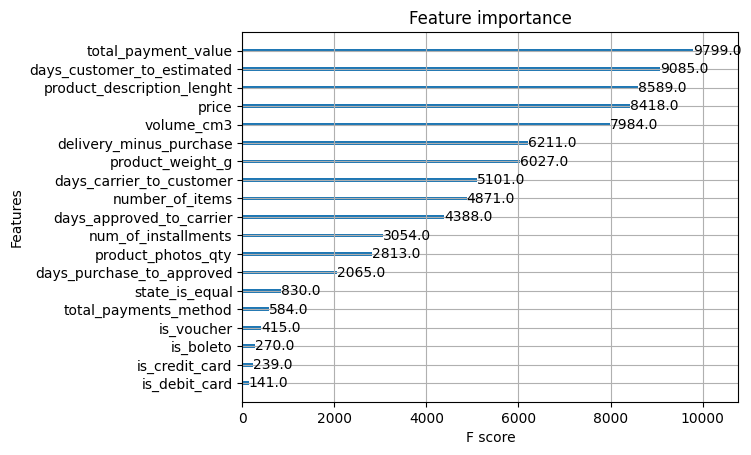

In [ ]:
xgb.plot_importance(XGB_algo, importance_type='weight')
plt.show()

Output of the model scores for macro recall in both training and testing data is low.

### 2. XGBoost: Reducing Number of Features | Train Test Split

Selected important features based on the 'gain' plot_importance previously. Additionally, several variables were also consistently seen in the 'weight' plot importance as well.

#### Evaluation on the training set

Accuracy: 0.7953414599828599
Macro Precision:0.851
Macro Recall:0.417
Macro F1-Score:0.424


Micro Precision:0.795
Micro Recall:0.795
Micro F1-Score:0.795


Weighted Precision:0.808
Weighted Recall:0.795
Weighted F1-Score:0.733


XGBoost Confusion Matrix


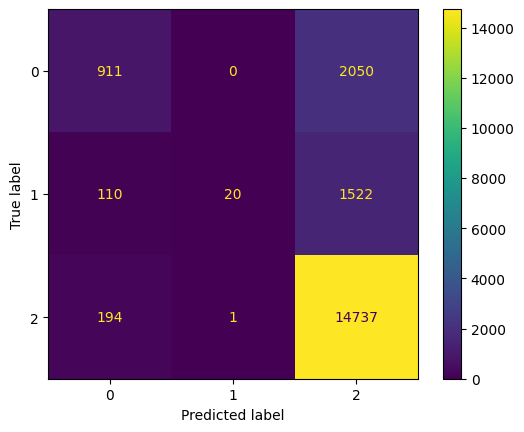

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.26      0.38     11844
           1       1.00      0.00      0.01      6608
           2       0.80      0.99      0.88     59727

    accuracy                           0.80     78179
   macro avg       0.85      0.42      0.42     78179
weighted avg       0.81      0.80      0.73     78179



In [ ]:

# List of important features based on the 'gain' plot_importance
# days_number_to_estimated, number_of_items,price,delivery_minus_purchase,total_payment_value,state_is_equal,is_boleto,volume_cm3,num_of_installments,product_description_length

important_features = ['number_of_items','days_customer_to_estimated','delivery_minus_purchase','price','total_payment_value','state_is_equal',
                      'volume_cm3','num_of_installments','product_description_lenght','is_boleto']

X_train_reduced = X_train[important_features]
X_test_reduced = X_test[important_features]






xgb_model = XGB(objective="multi:softmax",
                              eval_metric='merror',
                              n_estimators=1000,
                              learning_rate=0.001,
                              max_depth=5, #4-6 is generally good starting points
                              min_child_weight=1, #smaller value chosen because review_category class = 1 is smaller compared to the other groups
                              gamma = 0, #can be tuned later
                              missing=np.nan,
                              seed=42,
                              subsample=0.8, #common start value
                              num_class=3,
                enable_categorical=True

                    )

xgb_model.fit(X_train_reduced, y_train)

# Step 2: Make predictions on the train data
y_pred_train = xgb_model.predict(X_train_reduced)




#calculate accuracy
accuracy = accuracy_score(y_train, y_pred_train)
print(f"Accuracy: {accuracy}")


precision, recall, f1_score, _ = precision_recall_fscore_support(y_train, y_pred_train, average='macro')
print("Macro Precision:{}".format(round(precision,3)))
print("Macro Recall:{}".format(round(recall,3)))
print("Macro F1-Score:{}".format(round(f1_score,3)))
print("\n")


precision, recall, f1_score, _ = precision_recall_fscore_support(y_train, y_pred_train, average='micro')
print("Micro Precision:{}".format(round(precision,3)))
print("Micro Recall:{}".format(round(recall,3)))
print("Micro F1-Score:{}".format(round(f1_score,3)))
print("\n")



precision, recall, f1_score, _ = precision_recall_fscore_support(y_train, y_pred_train, average='weighted')

print("Weighted Precision:{}".format(round(precision,3)))
print("Weighted Recall:{}".format(round(recall,3)))
print("Weighted F1-Score:{}".format(round(f1_score,3)))
print("\n")



#XGBoost
print("XGBoost Confusion Matrix")
CM.from_predictions(y_test, y_pred)
plt.show()


#Calculate and print precision, recall, F1-score
print("Classification Report:")
print(classification_report(y_train,y_pred_train))

#### Evaluation on the testing set

Accuracy: 0.7963673573804042
Macro Precision:0.848
Macro Recall:0.421
Macro F1-Score:0.43


Micro Precision:0.796
Micro Recall:0.796
Micro F1-Score:0.796


Weighted Precision:0.808
Weighted Recall:0.796
Weighted F1-Score:0.736


XGBoost Confusion Matrix


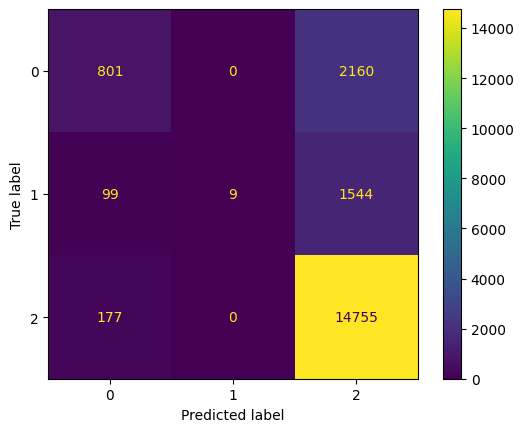

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.27      0.40      2961
           1       1.00      0.01      0.01      1652
           2       0.80      0.99      0.88     14932

    accuracy                           0.80     19545
   macro avg       0.85      0.42      0.43     19545
weighted avg       0.81      0.80      0.74     19545



In [ ]:

# List of important features based on the 'gain' plot_importance
important_features = ['number_of_items','days_customer_to_estimated','delivery_minus_purchase','price','total_payment_value','state_is_equal',
                      'volume_cm3','days_carrier_to_customer','product_weight_g','product_description_lenght','is_boleto']

X_train_reduced = X_train[important_features]
X_test_reduced = X_test[important_features]






xgb_model = XGB(objective="multi:softmax",
                              eval_metric='merror',
                              n_estimators=1000,
                              learning_rate=0.001,
                              max_depth=5, #4-6 is generally good starting points
                              min_child_weight=1, #smaller value chosen because review_category class = 1 is smaller compared to the other groups
                              gamma = 0, #can be tuned later
                              missing=np.nan,
                              seed=42,
                              subsample=0.8, #common start value
                              num_class=3,
                enable_categorical=True

                    )

xgb_model.fit(X_train_reduced, y_train)

# Step 2: Make predictions on the test data
y_pred = xgb_model.predict(X_test_reduced)




#calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
print("Macro Precision:{}".format(round(precision,3)))
print("Macro Recall:{}".format(round(recall,3)))
print("Macro F1-Score:{}".format(round(f1_score,3)))
print("\n")


precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='micro')
print("Micro Precision:{}".format(round(precision,3)))
print("Micro Recall:{}".format(round(recall,3)))
print("Micro F1-Score:{}".format(round(f1_score,3)))
print("\n")



precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print("Weighted Precision:{}".format(round(precision,3)))
print("Weighted Recall:{}".format(round(recall,3)))
print("Weighted F1-Score:{}".format(round(f1_score,3)))
print("\n")



#XGBoost
print("XGBoost Confusion Matrix")
CM.from_predictions(y_test, y_pred)
plt.show()


#Calculate and print precision, recall, F1-score
print("Classification Report:")
print(classification_report(y_test,y_pred))

###3 XGBoost: Hyperparameter Tuning

Best Parameters: {'colsample_bytree': 0.4, 'gamma': 0, 'learning_rate': 0.05609371175115584, 'max_depth': 6, 'n_estimators': 561, 'subsample': 0.5979914312095727}
Accuracy:0.81
Macro Precision:0.839
Macro Recall:0.456
Macro F1-Score:0.475


Micro Precision:0.81
Micro Recall:0.81
Micro F1-Score:0.81


Weighted Precision:0.816
Weighted Recall:0.81
Weighted F1-Score:0.759


XGBoost Confusion Matrix


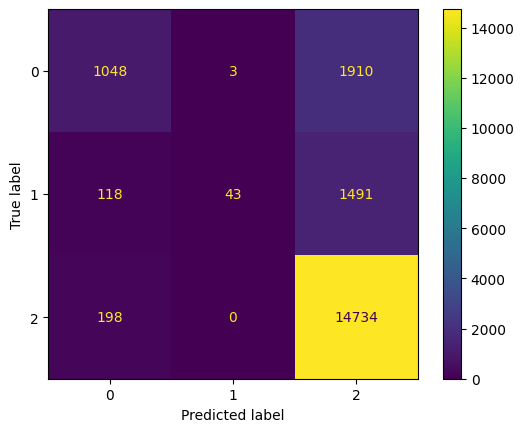

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.35      0.48      2961
           1       0.93      0.03      0.05      1652
           2       0.81      0.99      0.89     14932

    accuracy                           0.81     19545
   macro avg       0.84      0.46      0.48     19545
weighted avg       0.82      0.81      0.76     19545



In [ ]:

'''
Hyperparameter tuning steps:

1. Fix learning rate and number of estimators for tuning tree-based parameters
2. Tune max_depth and min_child weight -> highest impact on model outcome. Start with wider ranges adn then perform another iteration with smaller ranges.
3. Tune gamma
4. Tune subsample and colsample_bytree
5. Tuning Regularization Parameters
6. Reducing the learning rate and add more trees
'''




# Initialize the model
XGB_algo = XGB(
    enable_categorical=True,
    random_state=42,
    eval_metric="merror"
)

# Hyperparameter tuning function
def random_search(algo, hyperparameters, X_train, y_train):
    clf = RandomizedSearchCV(
        algo, hyperparameters, cv=3, random_state=42,
        scoring='recall_macro', n_iter=20, refit=True, n_jobs=-1
    )
    clf.fit(X_train, y_train)
    return clf.best_params_

# Hyperparameter search space
XGB_tuned_parameters = {
    'n_estimators': randint(100, 1000),
    'learning_rate': uniform(0.01, 0.05),
    'max_depth': randint(3, 7),
    'subsample': uniform(0.5, 0.5),
    'gamma': [0, 2],
    'colsample_bytree': [0.3, 0.4, 0.5, 0.7],
}

# Find the best hyperparameters
XGB_best_params = random_search(XGB_algo, XGB_tuned_parameters, X_train, y_train)
print(f"Best Parameters: {XGB_best_params}")

# Reinitialize the model with the best hyperparameters
XGB_algo = XGB(
    **XGB_best_params,
    enable_categorical=True,
    random_state=42,
    eval_metric="merror"
)

# Train the final model (no early stopping)
XGB_algo.fit(X_train, y_train)

# Make predictions
y_pred = XGB_algo.predict(X_test)

#calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:{}".format(round(accuracy,3)))



precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
print("Macro Precision:{}".format(round(precision,3)))
print("Macro Recall:{}".format(round(recall,3)))
print("Macro F1-Score:{}".format(round(f1_score,3)))
print("\n")


precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='micro')
print("Micro Precision:{}".format(round(precision,3)))
print("Micro Recall:{}".format(round(recall,3)))
print("Micro F1-Score:{}".format(round(f1_score,3)))
print("\n")



precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print("Weighted Precision:{}".format(round(precision,3)))
print("Weighted Recall:{}".format(round(recall,3)))
print("Weighted F1-Score:{}".format(round(f1_score,3)))
print("\n")


#XGBoost
print("XGBoost Confusion Matrix")
CM.from_predictions(y_test, y_pred)
plt.show()


#Calculate and print precision, recall, F1-score
print("Classification Report:")
print(classification_report(y_test,y_pred))




After conducting hyperparameter tuning, we can observe that the feature importance are more evenly distributed.

In the gain plot importance, number of items has become the most improtant feature impacting accuracy followed by `days_customer_to_estimated`

#### Plot Importance Graph of the XG Boost Model After Hyperparameter Tuning

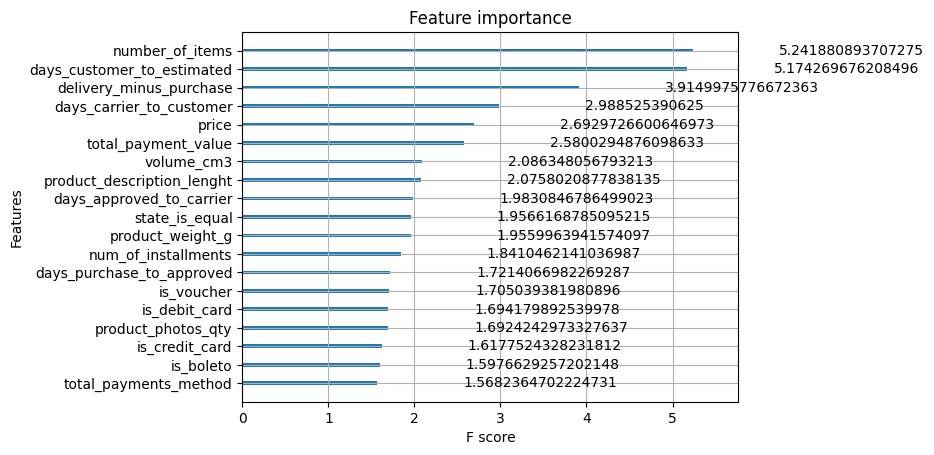

In [ ]:
xgb.plot_importance(XGB_algo, importance_type='gain')
plt.show()

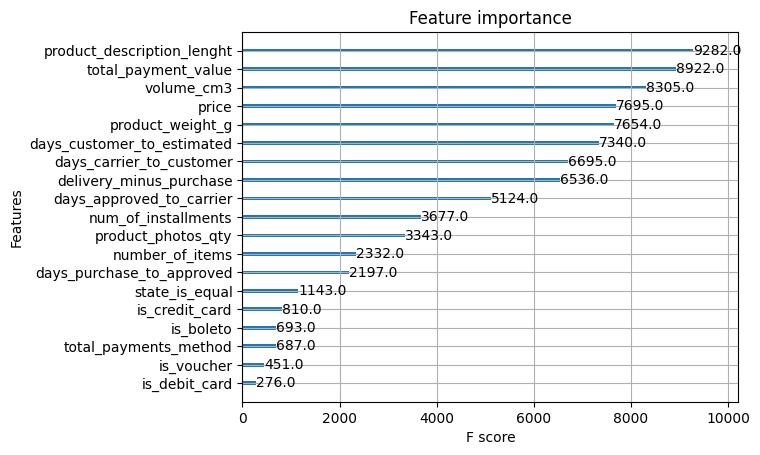

In [ ]:
xgb.plot_importance(XGB_algo, importance_type='weight')
plt.show()

### 4. XGBoost | Cross Validation (K-Fold = 5) Comparing Model Performance using All Features against Top Features only

**Top Features included**

Accuracy - Mean: 0.8060, Std: 0.0007
F1_macro - Mean: 0.4660, Std: 0.0020
F1_micro - Mean: 0.8060, Std: 0.0007
F1_weighted - Mean: 0.7532, Std: 0.0009
Precision_macro - Mean: 0.8456, Std: 0.0081
Precision_micro - Mean: 0.8060, Std: 0.0007
Precision_weighted - Mean: 0.8149, Std: 0.0020
Recall_macro - Mean: 0.4480, Std: 0.0015
Recall_micro - Mean: 0.8060, Std: 0.0007
Recall_weighted - Mean: 0.8060, Std: 0.0007
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.35      0.49      2961
           1       0.98      0.03      0.05      1652
           2       0.81      0.99      0.89     14932

    accuracy                           0.81     19545
   macro avg       0.85      0.46      0.48     19545
weighted avg       0.82      0.81      0.76     19545

XGBoost Confusion Matrix


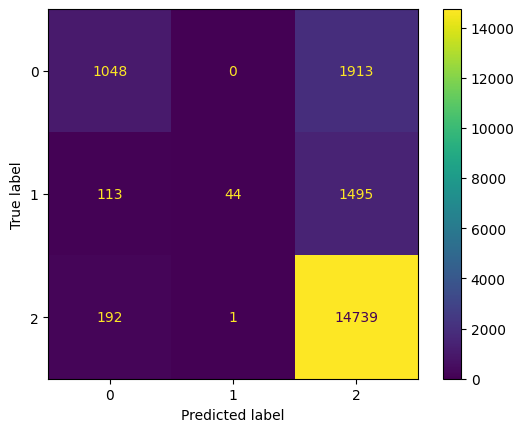

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate

import numpy as np


#with limited top features

model = xgb.XGBClassifier(**XGB_best_params, random_state=42,enable_categorical=True)


X_train_np = X_train_reduced.values if isinstance(X_train_reduced, pd.DataFrame) else X_train_reduced
y_train_np = y_train.values if isinstance(y_train, pd.Series) else y_train

# Perform Stratified K-Fold cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring_metrics = ['accuracy', 'f1_macro', 'f1_micro', 'f1_weighted',
                   'precision_macro', 'precision_micro', 'precision_weighted',
                   'recall_macro', 'recall_micro', 'recall_weighted']

cv_results = cross_validate(model, X_train_np, y_train_np, cv=kf, scoring=scoring_metrics, return_train_score=True)


for metric in scoring_metrics:
    test_scores = cv_results[f'test_{metric}']
    print(f"{metric.capitalize()} - Mean: {test_scores.mean():.4f}, Std: {test_scores.std():.4f}")




model.fit(X_train_np, y_train_np)
y_test_pred = model.predict(X_test_reduced)

print(f"Classification Report:\n{classification_report(y_test, y_test_pred)}")



print("XGBoost Confusion Matrix")
CM.from_predictions(y_test, y_test_pred)
plt.show()





### Conclusion

Based on the metrics output above between using all features vs top features, we will proceed with using the XGBoost model that contains only the top features as there is little improvement by adding all of the features in the model. However, we will further address the class imbalance by generating synthentic samples of the data using SMOTE to observe whether macro-recall (particularly for Class 1 = Neutral Review) can be improved further.

### 5. XGBoost | Application of SMOTE to address class imbalance

In [ ]:
#setting the x and y values
y_value = md1['review_category'] # set the y
y_values = np.ravel(y_value) # change to an array (list)
y_values = y_values
x_values = md1.drop(['review_score','review_category','review_id','order_id','customer_id','customer_unique_id','product_category_name_english'], axis=1) # drop the y from the dataframe
len(x_values.columns)
x_values.columns
X_train,X_test,y_train,y_test = train_test_split(x_values,y_values,test_size=0.2,random_state=42,stratify=y_values)


# Step 2: Select important features
important_features = ['number_of_items','days_customer_to_estimated','delivery_minus_purchase','price','total_payment_value','state_is_equal',
                      'volume_cm3','days_carrier_to_customer','product_weight_g','product_description_lenght','is_boleto']

X_train_reduced = X_train[important_features]
X_test_reduced = X_test[important_features]

# Step 3: Ensure features are numeric
X_train_reduced['state_is_equal'] = pd.to_numeric(X_train_reduced['state_is_equal'])
X_train_reduced['is_boleto'] = pd.to_numeric(X_train_reduced['is_boleto'])
X_test_reduced['state_is_equal'] = pd.to_numeric(X_test_reduced['state_is_equal'])
X_test_reduced['is_boleto'] = pd.to_numeric(X_test_reduced['is_boleto'])

pd.Series(y_train).value_counts()



<ipython-input-101-725f8b7e1949>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_reduced['state_is_equal'] = pd.to_numeric(X_train_reduced['state_is_equal'])
<ipython-input-101-725f8b7e1949>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_reduced['is_boleto'] = pd.to_numeric(X_train_reduced['is_boleto'])
<ipython-input-101-725f8b7e1949>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



,count
2,59727
0,11844
1,6608


#### Prediction based on Training Set

<ipython-input-239-889204a33405>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_reduced['state_is_equal'] = pd.to_numeric(X_train_reduced['state_is_equal'])
<ipython-input-239-889204a33405>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_reduced['is_boleto'] = pd.to_numeric(X_train_reduced['is_boleto'])
<ipython-input-239-889204a33405>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



Macro Precision:0.795
Macro Recall:0.793
Macro F1-Score:0.787


Micro Precision:0.793
Micro Recall:0.793
Micro F1-Score:0.793


Weighted Precision:0.795
Weighted Recall:0.793
Weighted F1-Score:0.787


XGBoost Confusion Matrix


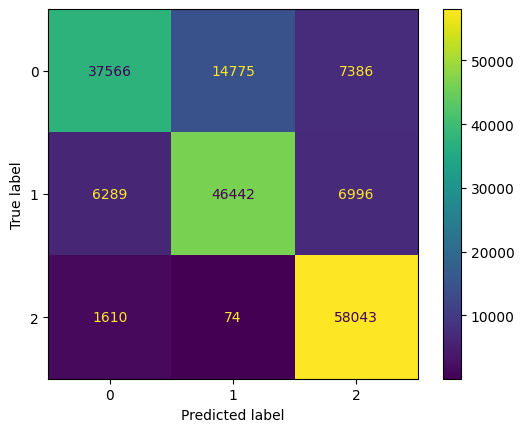

In [239]:
from imblearn.over_sampling import SMOTE
#setting the x and y values
y_value = md1['review_category'] # set the y
y_values = np.ravel(y_value) # change to an array (list)
y_values = y_values
x_values = md1.drop(['review_score','review_category','review_id','order_id','customer_id','customer_unique_id','product_category_name_english'], axis=1) # drop the y from the dataframe
len(x_values.columns)
x_values.columns
X_train,X_test,y_train,y_test = train_test_split(x_values,y_values,test_size=0.2,random_state=42,stratify=y_values)


# Step 2: Select important features
important_features = ['number_of_items','days_customer_to_estimated','delivery_minus_purchase','price','total_payment_value','state_is_equal',
                      'volume_cm3','days_carrier_to_customer','product_weight_g','product_description_lenght','is_boleto']

X_train_reduced = X_train[important_features]
X_test_reduced = X_test[important_features]

# Step 3: Ensure features are numeric
X_train_reduced['state_is_equal'] = pd.to_numeric(X_train_reduced['state_is_equal'])
X_train_reduced['is_boleto'] = pd.to_numeric(X_train_reduced['is_boleto'])
X_test_reduced['state_is_equal'] = pd.to_numeric(X_test_reduced['state_is_equal'])
X_test_reduced['is_boleto'] = pd.to_numeric(X_test_reduced['is_boleto'])

pd.Series(y_train).value_counts()

#auto sampling strategy is the same as not majority sampling strategy
smote = SMOTE(random_state=42, sampling_strategy='auto')

X_train_resampled, Y_train_resampled = smote.fit_resample(X_train_reduced,y_train)


pd.Series(Y_train_resampled).value_counts()

XGB_algo = XGB()

XGB_model = XGB_algo.fit(X_train_resampled, Y_train_resampled)

# Predict the test data
predict_train =  XGB_model.predict(X_train_resampled)



# Calculate precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(Y_train_resampled, predict_train, average='macro')
print("Macro Precision:{}".format(round(precision,3)))
print("Macro Recall:{}".format(round(recall,3)))
print("Macro F1-Score:{}".format(round(f1_score,3)))
print("\n")


precision, recall, f1_score, _ = precision_recall_fscore_support(Y_train_resampled, predict_train, average='micro')
print("Micro Precision:{}".format(round(precision,3)))
print("Micro Recall:{}".format(round(recall,3)))
print("Micro F1-Score:{}".format(round(f1_score,3)))
print("\n")



precision, recall, f1_score, _ = precision_recall_fscore_support(Y_train_resampled, predict_train, average='weighted')

print("Weighted Precision:{}".format(round(precision,3)))
print("Weighted Recall:{}".format(round(recall,3)))
print("Weighted F1-Score:{}".format(round(f1_score,3)))
print("\n")

# Confusion matrix
print("XGBoost Confusion Matrix")
CM.from_predictions(Y_train_resampled, predict_train)

#### Prediction based on Testing Set

Macro Precision:0.693
Macro Recall:0.483
Macro F1-Score:0.503


Micro Precision:0.808
Micro Recall:0.808
Micro F1-Score:0.808


Weighted Precision:0.781
Weighted Recall:0.808
Weighted F1-Score:0.767


XGBoost Confusion Matrix


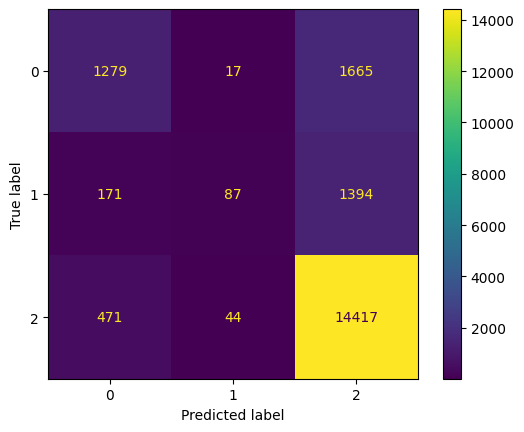

In [240]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42, sampling_strategy='auto')

# Note we only undersample the training data not the test data
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train_reduced,y_train)


pd.Series(Y_train_resampled).value_counts()

# decision tree - standard hyperparameters

XGB_model = XGB_algo.fit(X_train_resampled, Y_train_resampled)

# Predict the test data
predict =  XGB_model.predict(X_test_reduced)



# Calculate precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, predict, average='macro')
print("Macro Precision:{}".format(round(precision,3)))
print("Macro Recall:{}".format(round(recall,3)))
print("Macro F1-Score:{}".format(round(f1_score,3)))
print("\n")


precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, predict, average='micro')
print("Micro Precision:{}".format(round(precision,3)))
print("Micro Recall:{}".format(round(recall,3)))
print("Micro F1-Score:{}".format(round(f1_score,3)))
print("\n")



precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, predict, average='weighted')

print("Weighted Precision:{}".format(round(precision,3)))
print("Weighted Recall:{}".format(round(recall,3)))
print("Weighted F1-Score:{}".format(round(f1_score,3)))
print("\n")

# Confusion matrix
print("XGBoost Confusion Matrix")
CM.from_predictions(y_test, predict)

In [ ]:
#After SMOTE
pd.Series(Y_train_resampled).value_counts()


,count
review_category,
2,59727
0,59727
1,59727


### 6.1 SMOTE with K-Fold without including best hyperparameters

In [ ]:
#setting the x and y values
y_value = md1['review_category'] # set the y
y_values = np.ravel(y_value) # change to an array (list)
y_values = y_values
x_values = md1.drop(['review_score','review_category','review_id','order_id','customer_id','customer_unique_id','product_category_name_english'], axis=1) # drop the y from the dataframe
len(x_values.columns)
x_values.columns
X_train,X_test,y_train,y_test = train_test_split(x_values,y_values,test_size=0.2,random_state=42,stratify=y_values)


# Step 2: Select important features
important_features = ['number_of_items','days_customer_to_estimated','delivery_minus_purchase','price','total_payment_value','state_is_equal',
                      'volume_cm3','days_carrier_to_customer','product_weight_g','product_description_lenght','is_boleto']

X_train_reduced = X_train[important_features]
X_test_reduced = X_test[important_features]

# Step 3: Ensure features are numeric
X_train_reduced['state_is_equal'] = pd.to_numeric(X_train_reduced['state_is_equal'])
X_train_reduced['is_boleto'] = pd.to_numeric(X_train_reduced['is_boleto'])
X_test_reduced['state_is_equal'] = pd.to_numeric(X_test_reduced['state_is_equal'])
X_test_reduced['is_boleto'] = pd.to_numeric(X_test_reduced['is_boleto'])

pd.Series(y_train).value_counts()

<ipython-input-134-3901c245ec5b>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_reduced['state_is_equal'] = pd.to_numeric(X_train_reduced['state_is_equal'])
<ipython-input-134-3901c245ec5b>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_reduced['is_boleto'] = pd.to_numeric(X_train_reduced['is_boleto'])
<ipython-input-134-3901c245ec5b>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



,count
2,59727
0,11844
1,6608


In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import numpy as np

# Define important features
important_features = [
    'number_of_items', 'days_customer_to_estimated', 'delivery_minus_purchase', 'price',
    'total_payment_value', 'state_is_equal', 'volume_cm3', 'product_weight_g',
    'product_description_lenght', 'is_boleto'
]

# Ensure x_values only contains numeric data for important features
x_values[important_features] = x_values[important_features].apply(pd.to_numeric, errors='coerce')

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    x_values[important_features], y_values, test_size=0.2, random_state=42, stratify=y_values
)

# Initialize Stratified K-Fold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize SMOTE and XGB with best parameters
smote = SMOTE(random_state=42, sampling_strategy='auto')
XGB_algo = XGBClassifier(
    enable_categorical=True,
    random_state=42,
    eval_metric="merror"
)

# Initialize lists to store metrics
precision_list, recall_list, f1_list = [], [], []

# Perform Stratified K-Fold Cross-Validation
for fold, (train_index, val_index) in enumerate(kf.split(X_train, y_train), start=1):
    print(f"Fold {fold}")

    # Split the data into training and validation sets for this fold
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Apply SMOTE to the training fold
    X_train_smote, y_train_smote = smote.fit_resample(X_train_fold, y_train_fold)

    # Train the model on SMOTE-resampled data
    XGB_model = XGB_algo.fit(X_train_smote, y_train_smote)

    # Validate the model on the validation fold
    y_val_pred = XGB_model.predict(X_val_fold)

    # Calculate metrics for this fold
    precision, recall, f1_score, _ = precision_recall_fscore_support(
        y_val_fold, y_val_pred, average='macro'
    )
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1_score)

    print(f"Macro Precision: {round(precision, 3)}, Macro Recall: {round(recall, 3)}, Macro F1-Score: {round(f1_score, 3)}\n")

# Cross-Validation Averages
print("\nCross-Validation Results:")
print(f"Average Precision: {round(np.mean(precision_list), 3)}")
print(f"Average Recall: {round(np.mean(recall_list), 3)}")
print(f"Average F1-Score: {round(np.mean(f1_list), 3)}")

# Train final model on the full training set
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
XGB_model_final = XGB_algo.fit(X_train_resampled, y_train_resampled)

# Evaluate the final model on the test set
y_test_pred = XGB_model_final.predict(X_test)


Fold 1
Macro Precision: 0.671, Macro Recall: 0.472, Macro F1-Score: 0.49

Fold 2
Macro Precision: 0.697, Macro Recall: 0.469, Macro F1-Score: 0.485

Fold 3
Macro Precision: 0.653, Macro Recall: 0.466, Macro F1-Score: 0.481

Fold 4
Macro Precision: 0.683, Macro Recall: 0.472, Macro F1-Score: 0.489

Fold 5
Macro Precision: 0.69, Macro Recall: 0.471, Macro F1-Score: 0.489


Cross-Validation Results:
Average Precision: 0.679
Average Recall: 0.47
Average F1-Score: 0.487


In [ ]:
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_test_pred, average='macro')
print(f"Macro Precision: {round(precision, 3)}")
print(f"Macro Recall: {round(recall, 3)}")
print(f"Macro F1-Score: {round(f1_score, 3)}")

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_test_pred, average='micro')
print(f"Micro Precision: {round(precision, 3)}")
print(f"Micro Recall: {round(recall, 3)}")
print(f"Micro F1-Score: {round(f1_score, 3)}")



precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_test_pred, average='weighted')
print(f"Weighted Precision: {round(precision, 3)}")
print(f"Weighted Recall: {round(recall, 3)}")
print(f"Weighted F1-Score: {round(f1_score, 3)}")

Macro Precision: 0.684
Macro Recall: 0.483
Macro F1-Score: 0.501
Micro Precision: 0.803
Micro Recall: 0.803
Micro F1-Score: 0.803
Weighted Precision: 0.776
Weighted Recall: 0.803
Weighted F1-Score: 0.764


XGBoost Confusion Matrix


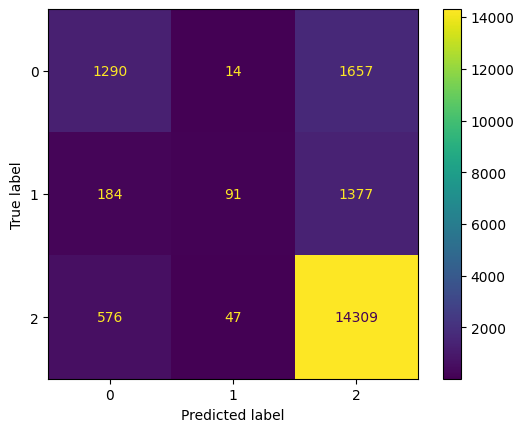

In [ ]:
# Confusion matrix
print("XGBoost Confusion Matrix")
CM.from_predictions(y_test, y_test_pred)

In [ ]:
#calculate accuracy
accuracy = accuracy_score(y_test,y_test_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8027628549501151


#### ROC-AUC curve

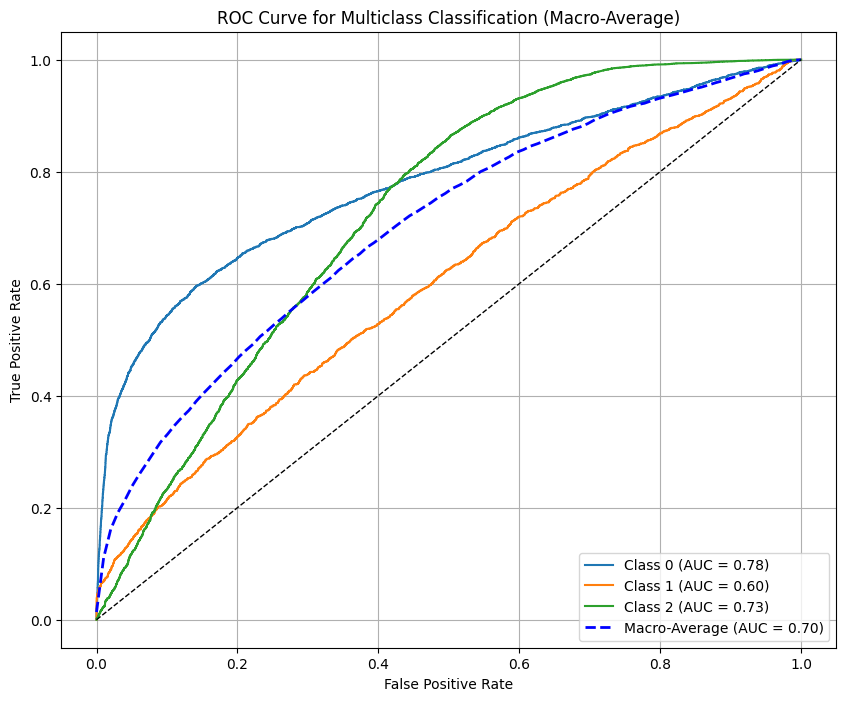

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import numpy as np


# Binarize Y_test for multi-class one-vs-rest approach
classes = np.unique(y_test)
Y_test_binarized = label_binarize(y_test, classes=classes)

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}
all_fpr = np.linspace(0, 1, 100)

# Compute ROC for each class
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(Y_test_binarized[:, i], predict_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Interpolate TPR for macro-averaging
mean_tpr = np.zeros_like(all_fpr)
for i in range(len(classes)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Average the TPR
mean_tpr /= len(classes)

# Compute macro-average AUC
macro_auc = auc(all_fpr, mean_tpr)

# Plotting the ROC curves
plt.figure(figsize=(10, 8))

# Plot ROC curve for each class
for i, class_label in enumerate(classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {class_label} (AUC = {roc_auc[i]:.2f})')

# Plot macro-average ROC curve
plt.plot(all_fpr, mean_tpr, color='blue', linestyle='--', linewidth=2, label=f'Macro-Average (AUC = {macro_auc:.2f})')

# Plot diagonal
plt.plot([0, 1], [0, 1], 'k--', linewidth=1)

# Add labels, title, and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification (Macro-Average)')
plt.legend(loc='lower right')
plt.grid()
plt.show()


### 6.2. SMOTE with K-Fold: Include best hyperparameters before SMOTE (Best Performed XGBoost Model)

In [ ]:
#Using hyperparameters Pre-SMOTE

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Select important features
important_features = [
    'number_of_items', 'days_customer_to_estimated', 'delivery_minus_purchase', 'price',
    'total_payment_value', 'state_is_equal', 'volume_cm3', 'days_carrier_to_customer',
    'product_weight_g', 'product_description_lenght', 'is_boleto'
]

# Ensure features are numeric
x_values[important_features] = x_values[important_features].apply(pd.to_numeric, errors='coerce')

# Initialize Stratified K-Fold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize SMOTE and XGB
smote = SMOTE(random_state=42, sampling_strategy='auto')
XGB_algo = XGBClassifier(colsample_bytree= 0.4, gamma= 0, learning_rate =  0.05609371175115584, max_depth = 6, n_estimators =  561, subsample =  0.5979914312095727,
    enable_categorical=True,
    random_state=42,
    eval_metric="merror"
)

# Store metrics for each fold
precision_list, recall_list, f1_list = [], [], []

# Perform Stratified K-Fold Cross-Validation
for fold, (train_index, val_index) in enumerate(kf.split(x_values, y_value), start=1):
    print(f"Fold {fold}")
    X_train_fold, X_val_fold = x_values.iloc[train_index][important_features], x_values.iloc[val_index][important_features]
    Y_train_fold, Y_val_fold = y_value.iloc[train_index], y_value.iloc[val_index]

    # Apply SMOTE to the training fold
    X_train_resampled, Y_train_resampled = smote.fit_resample(X_train_fold, Y_train_fold)

    # Train the model on resampled data
    XGB_model = XGB_algo.fit(X_train_resampled, Y_train_resampled)

    # Validate the model on the validation fold
    Y_val_pred = XGB_model.predict(X_val_fold)

    # Calculate metrics for this fold
    precision, recall, f1_score, _ = precision_recall_fscore_support(
        Y_val_fold, Y_val_pred, average='macro'
    )
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1_score)

    # Print fold-specific results
    print(f"Macro Precision: {round(precision, 3)}, Macro Recall: {round(recall, 3)}, Macro F1-Score: {round(f1_score, 3)}\n")

# Cross-Validation Averages
print("\nCross-Validation Results:")
print(f"Average Precision: {round(np.mean(precision_list), 3)}")
print(f"Average Recall: {round(np.mean(recall_list), 3)}")
print(f"Average F1-Score: {round(np.mean(f1_list), 3)}")

# Train final model on the full training set
X_train_reduced = x_values[important_features]
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train_reduced, y_values)
XGB_model_final = XGB_algo.fit(X_train_resampled, Y_train_resampled)

# Evaluate the final model on the test set
X_test_reduced = X_test[important_features]
Y_test_pred = XGB_model_final.predict(X_test_reduced)



Fold 1
Macro Precision: 0.717, Macro Recall: 0.475, Macro F1-Score: 0.493

Fold 2
Macro Precision: 0.686, Macro Recall: 0.469, Macro F1-Score: 0.483

Fold 3
Macro Precision: 0.726, Macro Recall: 0.466, Macro F1-Score: 0.483

Fold 4
Macro Precision: 0.741, Macro Recall: 0.47, Macro F1-Score: 0.489

Fold 5
Macro Precision: 0.718, Macro Recall: 0.471, Macro F1-Score: 0.488


Cross-Validation Results:
Average Precision: 0.718
Average Recall: 0.47
Average F1-Score: 0.487


In [ ]:
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, Y_test_pred, average='macro')
print(f"Macro Precision: {round(precision, 3)}")
print(f"Macro Recall: {round(recall, 3)}")
print(f"Macro F1-Score: {round(f1_score, 3)}")

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, Y_test_pred, average='micro')
print(f"Micro Precision: {round(precision, 3)}")
print(f"Micro Recall: {round(recall, 3)}")
print(f"Micro F1-Score: {round(f1_score, 3)}")



precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, Y_test_pred, average='weighted')
print(f"Weighted Precision: {round(precision, 3)}")
print(f"Weighted Recall: {round(recall, 3)}")
print(f"Weighted F1-Score: {round(f1_score, 3)}")

Macro Precision: 0.805
Macro Recall: 0.51
Macro F1-Score: 0.541
Micro Precision: 0.819
Micro Recall: 0.819
Micro F1-Score: 0.819
Weighted Precision: 0.816
Weighted Recall: 0.819
Weighted F1-Score: 0.783


XGBoost Confusion Matrix


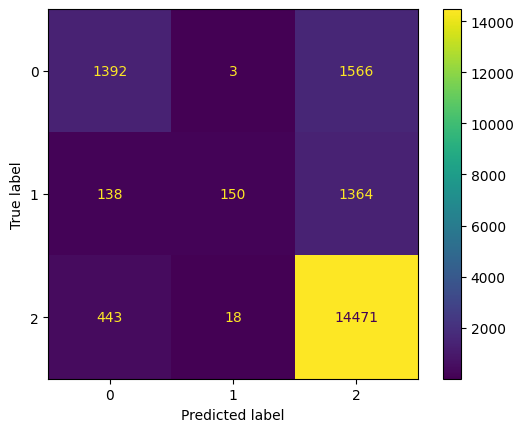

In [ ]:
# Confusion matrix
print("XGBoost Confusion Matrix")
CM.from_predictions(y_test, Y_test_pred)

In [ ]:

#calculate accuracy
accuracy = accuracy_score(y_test,Y_test_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8192888206702481


Accuracy: 0.82


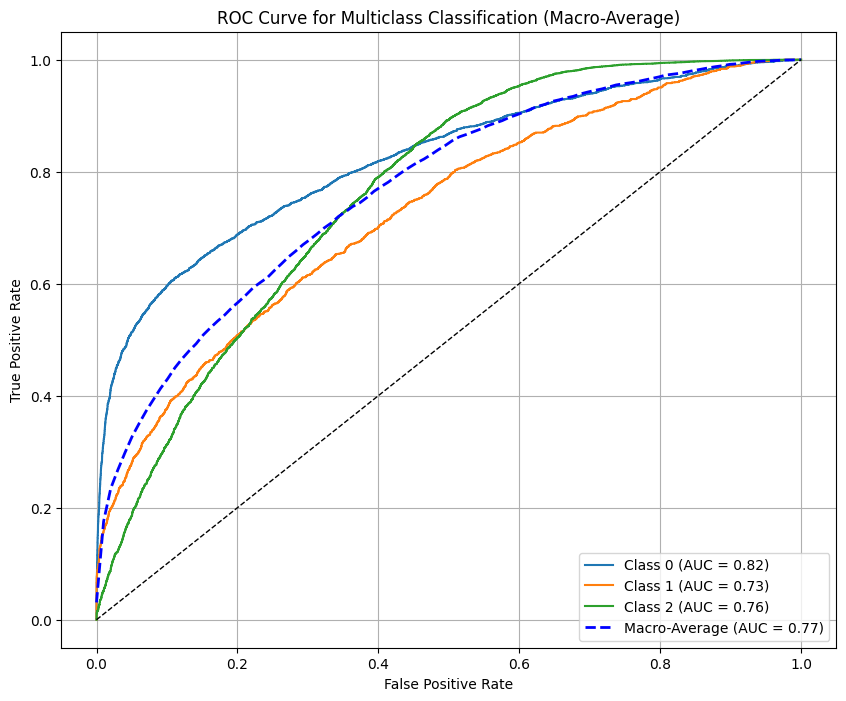

In [ ]:
from sklearn.metrics import roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import numpy as np

# Calculate accuracy
accuracy = accuracy_score(y_test, Y_test_pred)
print(f"Accuracy: {accuracy:.2f}")

# Binarize Y_test for multi-class one-vs-rest approach
classes = np.unique(y_test)
Y_test_binarized = label_binarize(y_test, classes=classes)

# Predict probabilities
predict_proba = XGB_model_final.predict_proba(X_test_reduced)

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}
all_fpr = np.linspace(0, 1, 100)

# Compute ROC for each class
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(Y_test_binarized[:, i], predict_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Interpolate TPR for macro-averaging
mean_tpr = np.zeros_like(all_fpr)
for i in range(len(classes)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Average the TPR
mean_tpr /= len(classes)

# Compute macro-average AUC
macro_auc = auc(all_fpr, mean_tpr)

# Plotting the ROC curves
plt.figure(figsize=(10, 8))

# Plot ROC curve for each class
for i, class_label in enumerate(classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {class_label} (AUC = {roc_auc[i]:.2f})')

# Plot macro-average ROC curve
plt.plot(all_fpr, mean_tpr, color='blue', linestyle='--', linewidth=2, label=f'Macro-Average (AUC = {macro_auc:.2f})')

# Plot diagonal
plt.plot([0, 1], [0, 1], 'k--', linewidth=1)

# Add labels, title, and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification (Macro-Average)')
plt.legend(loc='lower right')
plt.grid()
plt.show()


### 7. SMOTE with K-Fold: Decline in Performance upon Finding best Hyperparameters during SMOTE

In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from xgboost import XGBClassifier

# Hyperparameter search space
XGB_tuned_parameters = {
    'xgb__n_estimators': randint(100, 1000),
    'xgb__learning_rate': uniform(0.01, 0.05),
    'xgb__max_depth': randint(3, 7),
    'xgb__subsample': uniform(0.5, 0.5),
    'xgb__gamma': [0, 2],
    'xgb__colsample_bytree': [0.3, 0.4, 0.5, 0.7],
}

# Define a pipeline with SMOTE and the model
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('xgb', XGBClassifier(
        enable_categorical=True,
        random_state=42,
        eval_metric="merror"
    ))
])

# Hyperparameter tuning function
def random_search(algo, hyperparameters, X_train, y_train):
    clf = RandomizedSearchCV(
        algo, hyperparameters, cv=3, random_state=42,
        scoring='recall_macro', n_iter=10, refit=True, n_jobs=-1)
    clf.fit(X_train_reduced, y_train)
    return clf.best_params_

# Perform hyperparameter tuning
XGB_best_params = random_search(pipeline, XGB_tuned_parameters, X_train_reduced, y_train)

# Get the best parameters
print(f"Best Parameters: {XGB_best_params}")


Best Parameters: {'xgb__colsample_bytree': 0.7, 'xgb__gamma': 2, 'xgb__learning_rate': 0.02061695553391381, 'xgb__max_depth': 6, 'xgb__n_estimators': 376, 'xgb__subsample': 0.8087407548138583}


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import numpy as np

# Best parameters from hyperparameter tuning
XGB_best_params = {
    'colsample_bytree': 0.7,
    'gamma': 2,
    'learning_rate': 0.02061695553391381,
    'max_depth': 6,
    'n_estimators': 376,
    'subsample': 0.8087407548138583,
}

# Initialize Stratified K-Fold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize SMOTE and XGB with best parameters
smote = SMOTE(random_state=42, sampling_strategy='auto')
XGB_algo = XGBClassifier(
    enable_categorical=True,
    random_state=42,
    eval_metric="merror",
    **XGB_best_params
)

# Initialize lists to store metrics
precision_list, recall_list, f1_list = [], [], []

# Perform Stratified K-Fold Cross-Validation
for fold, (train_index, val_index) in enumerate(kf.split(X_train_reduced, y_train), start=1):
    print(f"Fold {fold}")

    # Split the data into training and validation sets for this fold
    X_train_fold, X_val_fold = X_train_reduced.iloc[train_index], X_train_reduced.iloc[val_index]
    Y_train_fold, Y_val_fold = y_train[train_index], y_train[val_index]

    # Apply SMOTE to the training fold
    X_train_smote, Y_train_smote = smote.fit_resample(X_train_fold, Y_train_fold)

    # Train the model on SMOTE-resampled data
    XGB_model = XGB_algo.fit(X_train_smote, Y_train_smote)

    # Validate the model on the validation fold
    Y_val_pred = XGB_model.predict(X_val_fold)

    # Calculate metrics for this fold
    precision, recall, f1_score, _ = precision_recall_fscore_support(
        Y_val_fold, Y_val_pred, average='macro'
    )
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1_score)

    print(f"Macro Precision: {round(precision, 3)}, Macro Recall: {round(recall, 3)}, Macro F1-Score: {round(f1_score, 3)}\n")

# Cross-Validation Averages
print("\nCross-Validation Results:")
print(f"Average Precision: {round(np.mean(precision_list), 3)}")
print(f"Average Recall: {round(np.mean(recall_list), 3)}")
print(f"Average F1-Score: {round(np.mean(f1_list), 3)}")

# Train final model on the full training set
X_train_smote, Y_train_smote = smote.fit_resample(X_train_reduced, y_train)
XGB_model_final = XGB_algo.fit(X_train_smote, Y_train_smote)

# Evaluate the final model on the test set
Y_test_pred = XGB_model_final.predict(X_test_reduced)


Fold 1
Macro Precision: 0.51, Macro Recall: 0.457, Macro F1-Score: 0.463

Fold 2
Macro Precision: 0.513, Macro Recall: 0.455, Macro F1-Score: 0.461

Fold 3
Macro Precision: 0.521, Macro Recall: 0.459, Macro F1-Score: 0.468

Fold 4
Macro Precision: 0.502, Macro Recall: 0.46, Macro F1-Score: 0.466

Fold 5
Macro Precision: 0.509, Macro Recall: 0.455, Macro F1-Score: 0.461


Cross-Validation Results:
Average Precision: 0.511
Average Recall: 0.457
Average F1-Score: 0.464


Macro Precision:0.53
Macro Recall:0.471
Macro F1-Score:0.479


Micro Precision:0.775
Micro Recall:0.775
Micro F1-Score:0.775


Weighted Precision:0.729
Weighted Recall:0.775
Weighted F1-Score:0.745


XGBoost Confusion Matrix


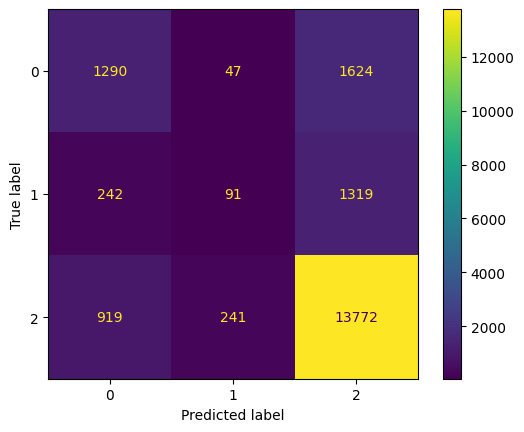

In [ ]:

# Calculate precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, Y_test_pred, average='macro')
print("Macro Precision:{}".format(round(precision,3)))
print("Macro Recall:{}".format(round(recall,3)))
print("Macro F1-Score:{}".format(round(f1_score,3)))
print("\n")


precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, Y_test_pred, average='micro')
print("Micro Precision:{}".format(round(precision,3)))
print("Micro Recall:{}".format(round(recall,3)))
print("Micro F1-Score:{}".format(round(f1_score,3)))
print("\n")



precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, Y_test_pred, average='weighted')

print("Weighted Precision:{}".format(round(precision,3)))
print("Weighted Recall:{}".format(round(recall,3)))
print("Weighted F1-Score:{}".format(round(f1_score,3)))
print("\n")

# Confusion matrix
print("XGBoost Confusion Matrix")
CM.from_predictions(y_test, Y_test_pred)

## GBDT

### 1. GBDT Default Parameters and Using All Features

In [246]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier as GBDT

In [ ]:
# Modeling
X_train,X_test,y_train,y_test = train_test_split(x_values,y_values,test_size=0.2,random_state=42,stratify=y_values)
GBDT_algo = GBDT()
GBDT_model = GBDT_algo.fit(X_train, y_train)

In [ ]:
# Evaluate the model on training data

y_pred_train = GBDT_model.predict(X_train)

accuracy_train = accuracy_score(y_train, y_pred_train)
print("Accuracy of training data:{}".format(round(accuracy_train,3)))

precision, recall, f1_score, _ = precision_recall_fscore_support(y_train, y_pred_train, average='macro')
print("Macro Precision:{}".format(round(precision,3)))
print("Macro Recall:{}".format(round(recall,3)))
print("Macro F1-Score:{}".format(round(f1_score,3)))
print("\n")

precision, recall, f1_score, _ = precision_recall_fscore_support(y_train, y_pred_train, average='micro')
print("Macro Precision:{}".format(round(precision,3)))
print("Macro Recall:{}".format(round(recall,3)))
print("Macro F1-Score:{}".format(round(f1_score,3)))
print("\n")

precision, recall, f1_score, _ = precision_recall_fscore_support(y_train, y_pred_train, average='weighted')
print("Macro Precision:{}".format(round(precision,3)))
print("Macro Recall:{}".format(round(recall,3)))
print("Macro F1-Score:{}".format(round(f1_score,3)))
print("\n")


Accuracy of training data:0.798
Macro Precision:0.848
Macro Recall:0.427
Macro F1-Score:0.437


Macro Precision:0.798
Macro Recall:0.798
Macro F1-Score:0.798


Macro Precision:0.809
Macro Recall:0.798
Macro F1-Score:0.74




Accuracy:0.798
Macro Precision:0.843
Macro Recall:0.429
Macro F1-Score:0.439


Micro Precision:0.798
Micro Recall:0.798
Micro F1-Score:0.798


Weighted Precision:0.808
Weighted Recall:0.798
Weighted F1-Score:0.741


Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.29      0.42      2961
           1       1.00      0.01      0.01      1652
           2       0.80      0.99      0.88     14932

    accuracy                           0.80     19545
   macro avg       0.84      0.43      0.44     19545
weighted avg       0.81      0.80      0.74     19545

GBDT Confusion Matrix


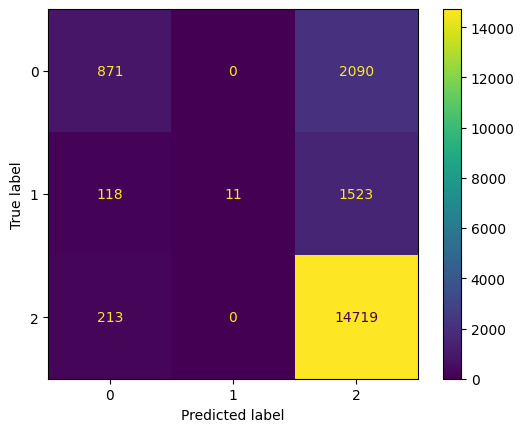

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.29      0.42      2961
           1       1.00      0.01      0.01      1652
           2       0.80      0.99      0.88     14932

    accuracy                           0.80     19545
   macro avg       0.84      0.43      0.44     19545
weighted avg       0.81      0.80      0.74     19545



In [ ]:
# Evaluate the model on testing data

y_pred = GBDT_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:{}".format(round(accuracy,3)))


precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
print("Macro Precision:{}".format(round(precision,3)))
print("Macro Recall:{}".format(round(recall,3)))
print("Macro F1-Score:{}".format(round(f1_score,3)))
print("\n")

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='micro')
print("Micro Precision:{}".format(round(precision,3)))
print("Micro Recall:{}".format(round(recall,3)))
print("Micro F1-Score:{}".format(round(f1_score,3)))
print("\n")



precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print("Weighted Precision:{}".format(round(precision,3)))
print("Weighted Recall:{}".format(round(recall,3)))
print("Weighted F1-Score:{}".format(round(f1_score,3)))
print("\n")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test,y_pred))


print("GBDT Confusion Matrix")
CM.from_predictions(y_test, y_pred)
plt.show()

print("Classification Report:")
print(classification_report(y_test,y_pred))

### 2. GBDT Hyperparameter Tuning

Best hyperparameters for GBDT:


*   n_estimators = 180
*   learing_rate = 0.13
*    max depth = 5
* criterion = friedman_mse



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from scipy.stats import randint, uniform

GBDT_algo = GBDT()

# Defining the parameter researching matrix
param_dist = {
    'n_estimators': randint(50, 250),
    'learning_rate': uniform(loc=0.01, scale=0.2),
    'criterion': ['friedman_mse', 'squared_error'],
    'max_depth': randint(2, 6)
}

random_search = RandomizedSearchCV(
    estimator=GBDT_algo,
    param_distributions = param_dist,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

In [ ]:
GBDT_algo = GBDT(**best_params)
GBDT_model_tuned = GBDT_algo.fit(X_train, y_train)

# Predecting
y_pred = GBDT_model_tuned.predict(X_test)

# Accurancy Calculation
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy with Optimized Model: {accuracy:.4f}")

Test Accuracy with Optimized Model: 0.8076


In [ ]:
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
print("Macro Precision:{}".format(round(precision,3)))
print("Macro Recall:{}".format(round(recall,3)))
print("Macro F1-Score:{}".format(round(f1_score,3)))
print("\n")

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='micro')
print("Micro Precision:{}".format(round(precision,3)))
print("Micro Recall:{}".format(round(recall,3)))
print("Micro F1-Score:{}".format(round(f1_score,3)))
print("\n")



precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print("Weighted Precision:{}".format(round(precision,3)))
print("Weighted Recall:{}".format(round(recall,3)))
print("Weighted F1-Score:{}".format(round(f1_score,3)))
print("\n")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test,y_pred))

Macro Precision:0.766
Macro Recall:0.454
Macro F1-Score:0.475


Micro Precision:0.808
Micro Recall:0.808
Micro F1-Score:0.808


Weighted Precision:0.797
Weighted Recall:0.808
Weighted F1-Score:0.757


Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.35      0.48      2961
           1       0.73      0.03      0.06      1652
           2       0.81      0.98      0.89     14932

    accuracy                           0.81     19545
   macro avg       0.77      0.45      0.47     19545
weighted avg       0.80      0.81      0.76     19545



In [ ]:

print("GBDT Confusion Matrix")
CM.from_predictions(y_test, y_pred)
plt.show()

print("Classification Report:")
print(classification_report(y_test,y_pred))

### 3. Using Top Selected Features Only

In [ ]:
# Defining new x and y features
important_features = ['number_of_items','days_customer_to_estimated','delivery_minus_purchase','price','total_payment_value','state_is_equal',
                      'volume_cm3','num_of_installments','product_description_lenght','is_boleto']


X_train_reduced = X_train[important_features]
X_test_reduced = X_test[important_features]


# print the shapes to check everything is OK
print(X_train_reduced.shape)
print(X_test_reduced.shape)
print(y_train.shape)
print(y_test.shape)


(78179, 11)
(19545, 11)
(78179,)
(19545,)


In [ ]:
# Model fitting
GBDT_algo = GBDT(**best_params)
GBDT_model_tuned_reduced = GBDT_algo.fit(X_train_reduced, y_train)

# Predecting
y_pred_reduced = GBDT_model_tuned_reduced.predict(X_test_reduced)

# Accurancy Calculation
accuracy = accuracy_score(y_test, y_pred_reduced)
print(f"Test Accuracy with Optimized Model: {accuracy:.4f}")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test,y_pred_reduced))

Test Accuracy with Optimized Model: 0.8071
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.35      0.48      2961
           1       0.79      0.03      0.05      1652
           2       0.81      0.98      0.89     14932

    accuracy                           0.81     19545
   macro avg       0.78      0.45      0.47     19545
weighted avg       0.80      0.81      0.76     19545



GBDT Confusion Matrix


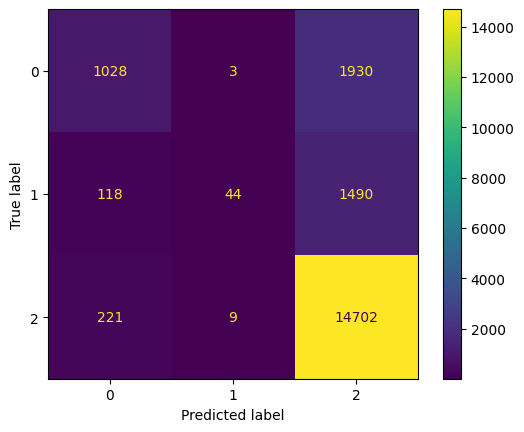

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.35      0.48      2961
           1       0.79      0.03      0.05      1652
           2       0.81      0.98      0.89     14932

    accuracy                           0.81     19545
   macro avg       0.78      0.45      0.47     19545
weighted avg       0.80      0.81      0.76     19545



In [ ]:
print("GBDT Confusion Matrix")
CM.from_predictions(y_test, y_pred_reduced)
plt.show()

print("Classification Report:")
print(classification_report(y_test,y_pred_reduced))

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.multiclass import OneVsRestClassifier

X_train_kf = X_train_reduced.values if isinstance(X_train_reduced, pd.DataFrame) else X_train_reduced
X_test_kf = X_test_reduced.values if isinstance(X_test_reduced, pd.Series) else X_test_reduced

# Set up the model with best parameters previously
GBDT_model_kf= GBDT(criterion='friedman_mse', learning_rate=0.13022300234864176, max_depth=5, n_estimators=180)

# K-fold verification
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(GBDT_model_kf, X_train_kf, y_train, cv=kf, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", cv_scores.mean())

# Model fitting
GBDT_model_kf.fit(X_train_kf,y_train)

# Predicting
y_pred_kf =GBDT_model_kf.predict(X_test_kf)

# Accessing the model
accuracy = accuracy_score(y_test, y_pred_kf)
print("Test Set Accuracy:", accuracy)
print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred_kf))


Cross-Validation Scores: [0.80046048 0.80474546 0.80826298 0.80429777 0.80518068]
Mean Cross-Validation Accuracy: 0.8045894753221331


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


Test Set Accuracy: 0.8086978766948069
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.76      0.35      0.48      2961
           1       0.84      0.03      0.06      1652
           2       0.81      0.99      0.89     14932

    accuracy                           0.81     19545
   macro avg       0.80      0.46      0.48     19545
weighted avg       0.81      0.81      0.76     19545



GBDT Confusion Matrix


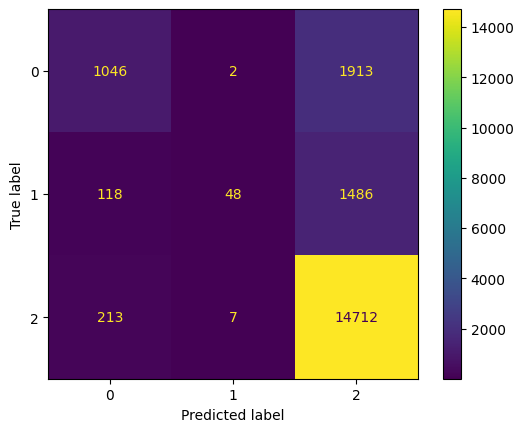

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.35      0.48      2961
           1       0.84      0.03      0.06      1652
           2       0.81      0.99      0.89     14932

    accuracy                           0.81     19545
   macro avg       0.80      0.46      0.48     19545
weighted avg       0.81      0.81      0.76     19545



In [ ]:
print("GBDT Confusion Matrix")
CM.from_predictions(y_test, y_pred_kf)
plt.show()

print("Classification Report:")
print(classification_report(y_test,y_pred_kf))

### 4. ROC Curve Analysis

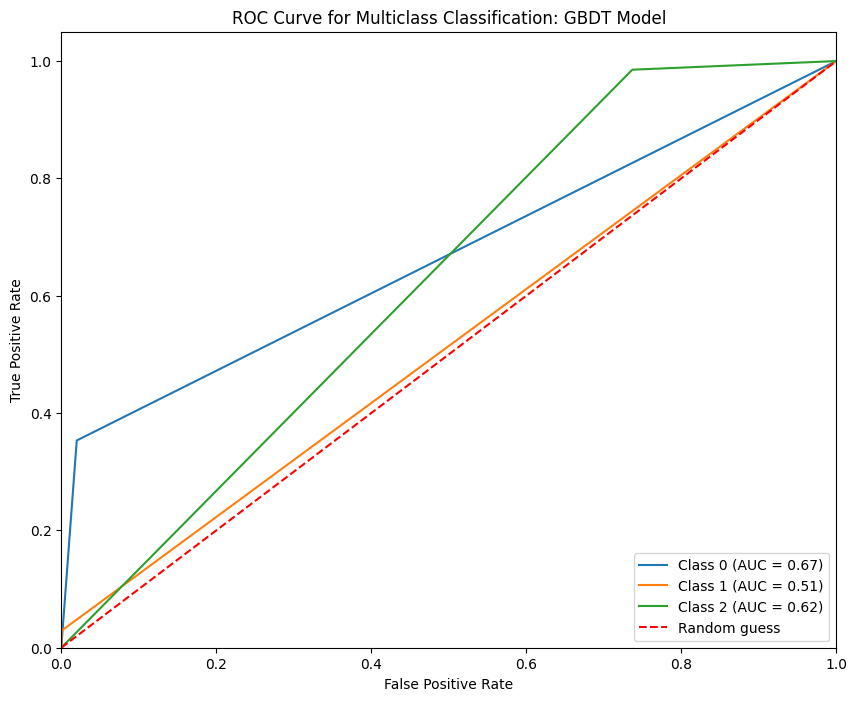

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import label_binarize

# Binarize y_test
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = np.unique(y_test)

# Since y_test_pred is 1D (predicted labels, not probabilities), binarize directly
y_pred_binarized = label_binarize(y_pred_kf, classes=n_classes)

# Initialize variables for ROC and AUC
fpr = {}
tpr = {}
roc_auc = {}

# ROC Curving
plt.figure(figsize=(10, 8))
for class_id in range(len(n_classes)):
    # calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test_binarized[:, class_id], y_pred_binarized[:, class_id])
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f"Class {class_id} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], color='red', linestyle='--',label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title("ROC Curve for Multiclass Classification: GBDT Model")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

### 5. Using SMOTE to address class imbalance (train-test-split)

In [252]:
from imblearn.over_sampling import SMOTE
#setting the x and y values
y_value = md1['review_category'] # set the y
y_values = np.ravel(y_value) # change to an array (list)
y_values = y_values
x_values = md1.drop(['review_score','review_category','review_id','order_id','customer_id','customer_unique_id','product_category_name_english'], axis=1) # drop the y from the dataframe
len(x_values.columns)
x_values.columns
X_train,X_test,y_train,y_test = train_test_split(x_values,y_values,test_size=0.2,random_state=42,stratify=y_values)


# Step 2: Select important features
important_features = ['number_of_items','days_customer_to_estimated','delivery_minus_purchase','price','total_payment_value','state_is_equal',
                      'volume_cm3','days_carrier_to_customer','product_weight_g','product_description_lenght','is_boleto']

X_train_reduced = X_train[important_features]
X_test_reduced = X_test[important_features]

# Step 3: Ensure features are numeric
X_train_reduced['state_is_equal'] = pd.to_numeric(X_train_reduced['state_is_equal'])
X_train_reduced['is_boleto'] = pd.to_numeric(X_train_reduced['is_boleto'])
X_test_reduced['state_is_equal'] = pd.to_numeric(X_test_reduced['state_is_equal'])
X_test_reduced['is_boleto'] = pd.to_numeric(X_test_reduced['is_boleto'])

pd.Series(y_train).value_counts()


# Applying SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_reduced, y_train)

# Check the distribution after SMOTE
print("SMOTE training set distribution:", y_train_smote)

# Model fitting based on the hyperparameter tuning done before
GBDT_algo= GBDT(criterion='friedman_mse', learning_rate=0.13022300234864176, max_depth=5, n_estimators=180)
GBDT_model_tuned_reduced_smote = GBDT_algo.fit(X_train_smote, y_train_smote)

# Aessessing the prediction
y_reduced_pred_smote = GBDT_model_tuned_reduced_smote.predict(X_test_reduced)
accuracy_smote = accuracy_score(y_test, y_reduced_pred_smote)
print(f"Test Accuracy with Optimized Model: {accuracy:.4f}")
print("Accuracy:", accuracy_score(y_test, y_reduced_pred_smote))
print("Classification Report:")
print(classification_report(y_test, y_reduced_pred_smote))

<ipython-input-252-a64594231ad8>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_reduced['state_is_equal'] = pd.to_numeric(X_train_reduced['state_is_equal'])
<ipython-input-252-a64594231ad8>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_reduced['is_boleto'] = pd.to_numeric(X_train_reduced['is_boleto'])
<ipython-input-252-a64594231ad8>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



SMOTE training set distribution: [2 2 2 ... 1 1 1]
Test Accuracy with Optimized Model: 0.8193
Accuracy: 0.8009209516500384
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.42      0.50      2961
           1       0.66      0.04      0.08      1652
           2       0.82      0.96      0.89     14932

    accuracy                           0.80     19545
   macro avg       0.70      0.47      0.49     19545
weighted avg       0.78      0.80      0.76     19545



GBDT Confusion Matrix


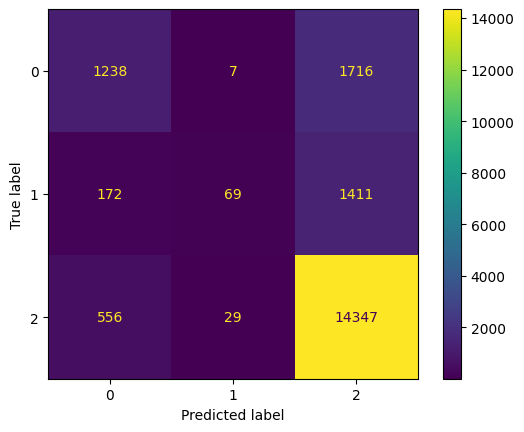

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.42      0.50      2961
           1       0.66      0.04      0.08      1652
           2       0.82      0.96      0.89     14932

    accuracy                           0.80     19545
   macro avg       0.70      0.47      0.49     19545
weighted avg       0.78      0.80      0.76     19545



In [253]:
print("GBDT Confusion Matrix")
CM.from_predictions(y_test, y_reduced_pred_smote)
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_reduced_pred_smote))


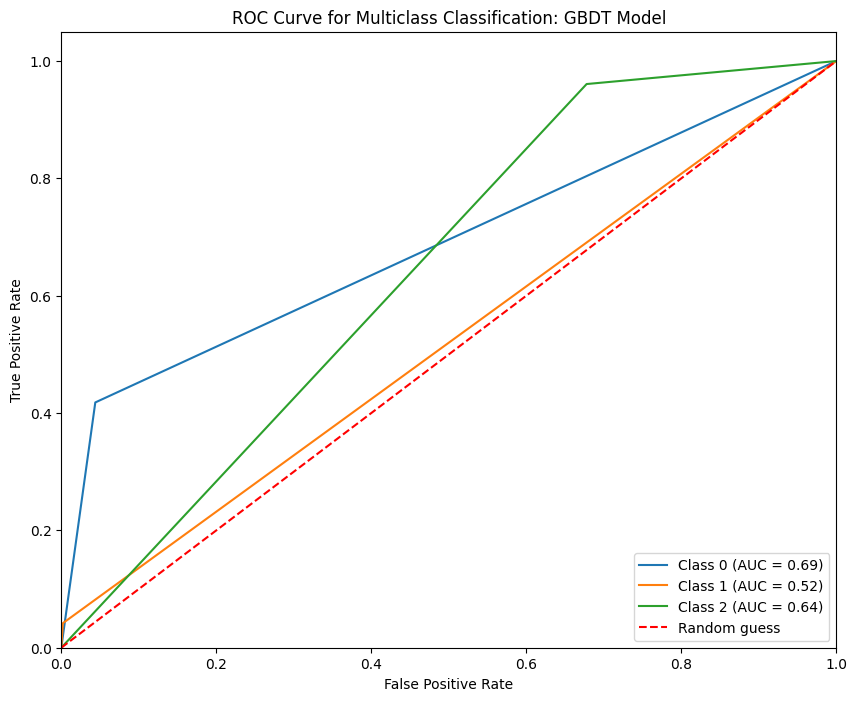

In [254]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import label_binarize

# Binarize y_test
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = np.unique(y_test)

# Since y_test_pred is 1D (predicted labels, not probabilities), binarize directly
y_pred_binarized = label_binarize(y_reduced_pred_smote, classes=n_classes)

# Initialize variables for ROC and AUC
fpr = {}
tpr = {}
roc_auc = {}

# ROC Curving
plt.figure(figsize=(10, 8))
for class_id in range(len(n_classes)):
    # calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test_binarized[:, class_id], y_pred_binarized[:, class_id])
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f"Class {class_id} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], color='red', linestyle='--',label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title("ROC Curve for Multiclass Classification: GBDT Model")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

## Random Forest

#### Random Forest with simple train test split using all features (Comparing Train Result vs Test Result)


*   Looking at the macro-average metrics, it appears that random forest (comparing between the train_predict and test_predict) is overfitting with just the basic parameters



Accuracy:0.999
Macro Precision:0.998
Macro Recall:0.997
Macro F1-Score:0.997


Micro Precision:0.999
Micro Recall:0.999
Micro F1-Score:0.999


Weighted Precision:0.999
Weighted Recall:0.999
Weighted F1-Score:0.999


XGBoost Confusion Matrix


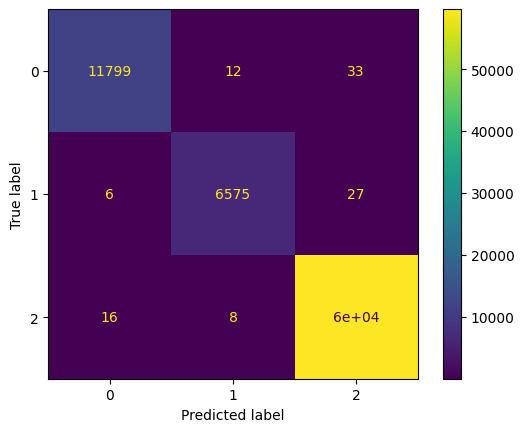

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11844
           1       1.00      1.00      1.00      6608
           2       1.00      1.00      1.00     59727

    accuracy                           1.00     78179
   macro avg       1.00      1.00      1.00     78179
weighted avg       1.00      1.00      1.00     78179



In [ ]:
# Split data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(
    x_values, y_value, test_size=0.2, random_state=42, stratify=y_value
)


# Train the Random Forest model
RF_algo = RF(random_state=42)
RF_model = RF_algo.fit(X_train, Y_train)


# Evaluate the model on training data
train_predict = RF_model.predict(X_train)
train_macro_precision, train_macro_recall, train_macro_f1, _ = precision_recall_fscore_support(Y_train, train_predict, average='macro')
train_micro_precision, train_micro_recall, train_micro_f1, _ = precision_recall_fscore_support(Y_train, train_predict, average='micro')
train_weighted_precision, train_weighted_recall, train_weighted_f1, _ = precision_recall_fscore_support(Y_train, train_predict, average='weighted')


#calculate accuracy
accuracy = accuracy_score(y_train, train_predict)
print("Accuracy:{}".format(round(accuracy,3)))



precision, recall, f1_score, _ = precision_recall_fscore_support(y_train, train_predict, average='macro')
print("Macro Precision:{}".format(round(precision,3)))
print("Macro Recall:{}".format(round(recall,3)))
print("Macro F1-Score:{}".format(round(f1_score,3)))
print("\n")


precision, recall, f1_score, _ = precision_recall_fscore_support(y_train, train_predict, average='micro')
print("Micro Precision:{}".format(round(precision,3)))
print("Micro Recall:{}".format(round(recall,3)))
print("Micro F1-Score:{}".format(round(f1_score,3)))
print("\n")


precision, recall, f1_score, _ = precision_recall_fscore_support(y_train, train_predict, average='weighted')

print("Weighted Precision:{}".format(round(precision,3)))
print("Weighted Recall:{}".format(round(recall,3)))
print("Weighted F1-Score:{}".format(round(f1_score,3)))
print("\n")


#XGBoost
print("XGBoost Confusion Matrix")
CM.from_predictions(y_train, train_predict)
plt.show()


#Calculate and print precision, recall, F1-score
print("Classification Report:")
print(classification_report(y_train,train_predict))



Accuracy:0.845
Macro Precision:0.86
Macro Recall:0.557
Macro F1-Score:0.612


Micro Precision:0.845
Micro Recall:0.845
Micro F1-Score:0.845


Weighted Precision:0.848
Weighted Recall:0.845
Weighted F1-Score:0.816


XGBoost Confusion Matrix


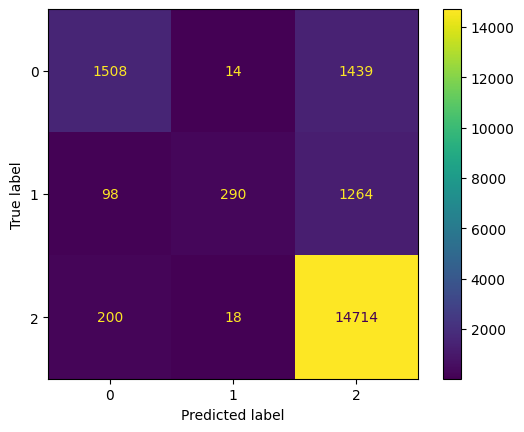

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.51      0.63      2961
           1       0.90      0.18      0.29      1652
           2       0.84      0.99      0.91     14932

    accuracy                           0.84     19545
   macro avg       0.86      0.56      0.61     19545
weighted avg       0.85      0.84      0.82     19545



In [ ]:
RF_model = RF_algo.fit(X_train, Y_train)


# Evaluate the model on training data
test_predict = RF_model.predict(X_test)
train_macro_precision, train_macro_recall, train_macro_f1, _ = precision_recall_fscore_support(Y_test, test_predict, average='macro')
train_micro_precision, train_micro_recall, train_micro_f1, _ = precision_recall_fscore_support(Y_test, test_predict, average='micro')
train_weighted_precision, train_weighted_recall, train_weighted_f1, _ = precision_recall_fscore_support(Y_test, test_predict, average='weighted')


#calculate accuracy
accuracy = accuracy_score(Y_test, test_predict)
print("Accuracy:{}".format(round(accuracy,3)))



precision, recall, f1_score, _ = precision_recall_fscore_support(Y_test, test_predict, average='macro')
print("Macro Precision:{}".format(round(precision,3)))
print("Macro Recall:{}".format(round(recall,3)))
print("Macro F1-Score:{}".format(round(f1_score,3)))
print("\n")


precision, recall, f1_score, _ = precision_recall_fscore_support(Y_test, test_predict, average='micro')
print("Micro Precision:{}".format(round(precision,3)))
print("Micro Recall:{}".format(round(recall,3)))
print("Micro F1-Score:{}".format(round(f1_score,3)))
print("\n")


precision, recall, f1_score, _ = precision_recall_fscore_support(Y_test, test_predict, average='weighted')

print("Weighted Precision:{}".format(round(precision,3)))
print("Weighted Recall:{}".format(round(recall,3)))
print("Weighted F1-Score:{}".format(round(f1_score,3)))
print("\n")


#XGBoost
print("XGBoost Confusion Matrix")
CM.from_predictions(Y_test, test_predict)
plt.show()


#Calculate and print precision, recall, F1-score
print("Classification Report:")
print(classification_report(Y_test,test_predict))

#### Random Forest Hyperparameter Tuning without SMOTE

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(
    x_values, y_value, test_size=0.2, random_state=42, stratify=y_value
)

# Print the shapes of the splits
print(f"Training Data Shape: {X_train.shape}, {Y_train.shape}")
print(f"Test Data Shape: {X_test.shape}, {Y_test.shape}")


def random_search(algo, hyperparameters, X_train, y_train):
    clf = RandomizedSearchCV(
        algo, RF_tuned_parameters, cv=3, random_state=42,
        scoring='recall_macro', n_iter=20, refit=True, n_jobs=-1
    )
    clf.fit(X_train, Y_train)
    return clf.best_params_



# Hyperparameter search space
RF_tuned_parameters = {
   'n_estimators': [100, 300, 500],
    'max_depth': [5, 10, 15],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True]

}

# Find the best hyperparameters
RF_best_params = random_search(RF_algo, RF_tuned_parameters, X_train, y_train)
print(f"Best Parameters: {RF_best_params}")



Training Data Shape: (78179, 19), (78179,)
Test Data Shape: (19545, 19), (19545,)
Best Parameters: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 15, 'bootstrap': True}


### Random Forest Application of SMOTE Technique with Top Selected Features

In [ ]:
x_values.columns

Index(['days_purchase_to_approved', 'days_approved_to_carrier',
       'days_carrier_to_customer', 'days_customer_to_estimated',
       'delivery_minus_purchase', 'total_payments_method',
       'total_payment_value', 'number_of_items', 'price',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'volume_cm3', 'state_is_equal', 'num_of_installments', 'is_boleto',
       'is_credit_card', 'is_debit_card', 'is_voucher'],
      dtype='object')

In [ ]:
#importing the libraries
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import (
    precision_recall_fscore_support, accuracy_score, classification_report, ConfusionMatrixDisplay,
    roc_auc_score, roc_curve)
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer

In [ ]:
#setting the x and y values
md1 = final_data.copy()
md1.dropna(inplace=True)
md1.reset_index(drop=True,inplace=True)
y_value = md1['review_category'] # set the y
y_values = np.ravel(y_value) # change to an array (list)
y_values = y_values
x_values = md1.drop(['review_score','review_category','review_id','order_id','customer_id','customer_unique_id','product_category_name_english'], axis=1) # drop the y from the dataframe
len(x_values.columns)
x_values.columns

#split train-test s4et
X_train,X_test,y_train,y_test = train_test_split(x_values,y_values,test_size=0.2,random_state=42,stratify=y_values)


# Step 2: Select important features
important_features = ['number_of_items','days_customer_to_estimated','delivery_minus_purchase','price','total_payment_value','state_is_equal',
                      'volume_cm3','days_carrier_to_customer','product_weight_g','product_description_lenght','is_boleto']

X_train_reduced = X_train[important_features]
X_test_reduced = X_test[important_features]

# Step 3: Ensure features are numeric
X_train_reduced['state_is_equal'] = pd.to_numeric(X_train_reduced['state_is_equal'])
X_train_reduced['is_boleto'] = pd.to_numeric(X_train_reduced['is_boleto'])
X_test_reduced['state_is_equal'] = pd.to_numeric(X_test_reduced['state_is_equal'])
X_test_reduced['is_boleto'] = pd.to_numeric(X_test_reduced['is_boleto'])

pd.Series(y_train).value_counts()


# Applying SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_reduced, y_train)

<ipython-input-126-e51b6ab2493b>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_reduced['state_is_equal'] = pd.to_numeric(X_train_reduced['state_is_equal'])
<ipython-input-126-e51b6ab2493b>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_reduced['is_boleto'] = pd.to_numeric(X_train_reduced['is_boleto'])
<ipython-input-126-e51b6ab2493b>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [ ]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import (
    precision_recall_fscore_support, accuracy_score, classification_report, ConfusionMatrixDisplay,
    roc_auc_score, roc_curve)
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer



# Apply SMOTE to handle class imbalance
print("Applying SMOTE to balance the dataset...")
smote = SMOTE(random_state=4567)
X_train_smote, Y_train_smote = smote.fit_resample(X_train_reduced, y_train)

# Check class distribution after SMOTE
print("\nClass distribution after SMOTE:")
print(pd.Series(y_train))

# Print the shapes of the SMOTE-resampled data
print("Training Data Shape after SMOTE:{}".format(X_train_smote.shape),".{}".format(y_train_smote.shape))
print("Test Data Shape:{}".format(X_test_reduced.shape),"{}".format(y_test.shape))

RF_algo = RF(random_state=42)

# Hyperparameter tuning function
def random_search(algo, hyperparameters, X_train, y_train):
    clf = RandomizedSearchCV(
        algo, hyperparameters, cv=3, random_state=42,
        scoring='recall_macro', n_iter=10, refit=True, n_jobs=-1
    )
    clf.fit(X_train_smote, Y_train_smote)
    return clf.best_params_

# Hyperparameter search space
RF_tuned_parameters = {
     'n_estimators': [100, 300, 500],
    'max_depth': [5, 10, 15],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True]
}

# Find the best hyperparameters
RF_best_params = random_search(RF_algo, RF_tuned_parameters, X_train_smote, y_train)
print(f"Best Parameters: {RF_best_params}")


Applying SMOTE to balance the dataset...

Class distribution after SMOTE:
0        2
1        2
2        2
3        0
4        2
        ..
78174    2
78175    2
78176    2
78177    0
78178    2
Length: 78179, dtype: int64
Training Data Shape after SMOTE:(179181, 11) .(179181,)
Test Data Shape:(19545, 11) (19545,)
Best Parameters: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 15, 'bootstrap': True}


In [ ]:
# Using the best hyperparameters
RF_algo = RF(n_estimators= 500, min_samples_split= 5, min_samples_leaf= 2, max_features= 'log2', max_depth= 15, bootstrap= True, random_state=42)
RF_model = RF_algo.fit(X_train_smote,Y_train_smote)
test_predict = RF_model.predict(X_test_reduced)

In [ ]:
train_predict = RF_model.predict(X_train_smote)

Macro Precision:0.789
Macro Recall:0.774
Macro F1-Score:0.769


Micro Precision:0.774
Micro Recall:0.774
Micro F1-Score:0.774


Weighted Precision:0.789
Weighted Recall:0.774
Weighted F1-Score:0.769


XGBoost Confusion Matrix

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.59      0.71     59727
           1       0.71      0.83      0.77     59727
           2       0.78      0.90      0.83     59727

    accuracy                           0.77    179181
   macro avg       0.79      0.77      0.77    179181
weighted avg       0.79      0.77      0.77    179181



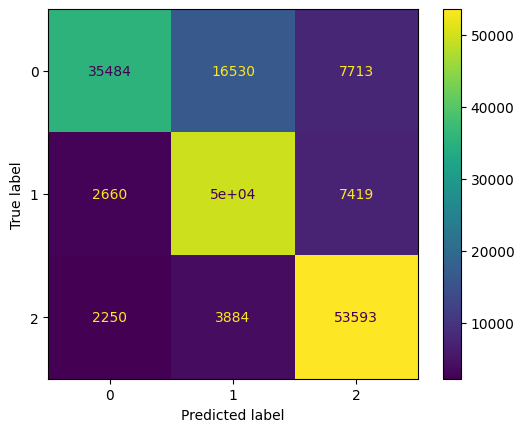

In [ ]:
precision, recall, f1_score, _ = precision_recall_fscore_support(Y_train_smote, train_predict, average='macro')
print("Macro Precision:{}".format(round(precision,3)))
print("Macro Recall:{}".format(round(recall,3)))
print("Macro F1-Score:{}".format(round(f1_score,3)))
print("\n")


precision, recall, f1_score, _ = precision_recall_fscore_support(Y_train_smote, train_predict, average='micro')
print("Micro Precision:{}".format(round(precision,3)))
print("Micro Recall:{}".format(round(recall,3)))
print("Micro F1-Score:{}".format(round(f1_score,3)))
print("\n")



precision, recall, f1_score, _ = precision_recall_fscore_support(Y_train_smote, train_predict, average='weighted')

print("Weighted Precision:{}".format(round(precision,3)))
print("Weighted Recall:{}".format(round(recall,3)))
print("Weighted F1-Score:{}".format(round(f1_score,3)))
print("\n")

# Confusion matrix
print("XGBoost Confusion Matrix")
CM.from_predictions(Y_train_smote, train_predict)

# Classification Report for Detailed Performance
print("\nClassification Report:")
print(classification_report(Y_train_smote, train_predict))

Macro Precision:0.535
Macro Recall:0.509
Macro F1-Score:0.52


Micro Precision:0.755
Micro Recall:0.755
Micro F1-Score:0.755


Weighted Precision:0.744
Weighted Recall:0.755
Weighted F1-Score:0.749


RF Confusion Matrix

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.49      0.53      2961
           1       0.18      0.17      0.17      1652
           2       0.84      0.87      0.85     14932

    accuracy                           0.75     19545
   macro avg       0.54      0.51      0.52     19545
weighted avg       0.74      0.75      0.75     19545



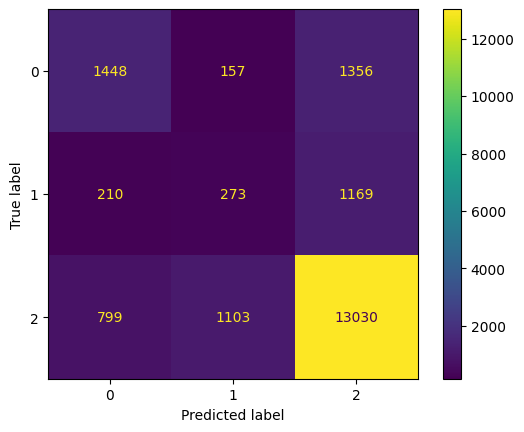

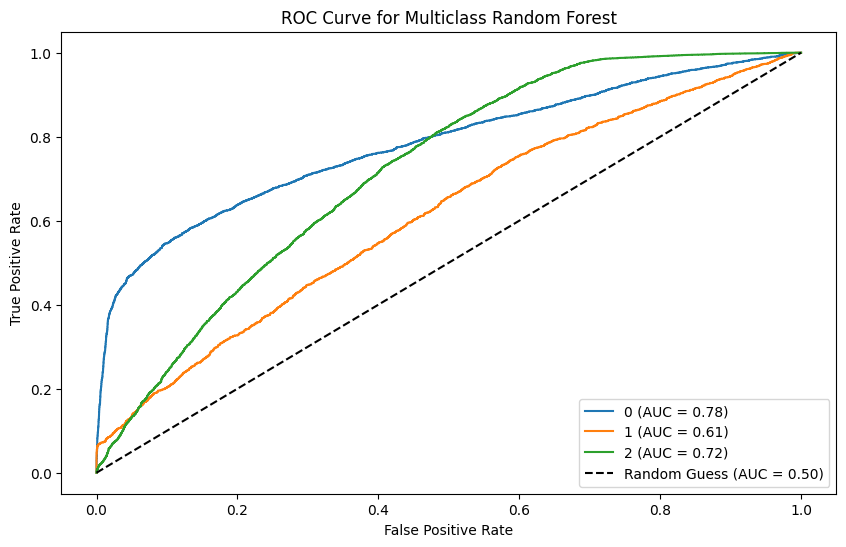

In [ ]:
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, test_predict, average='macro')
print("Macro Precision:{}".format(round(precision,3)))
print("Macro Recall:{}".format(round(recall,3)))
print("Macro F1-Score:{}".format(round(f1_score,3)))
print("\n")


precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, test_predict, average='micro')
print("Micro Precision:{}".format(round(precision,3)))
print("Micro Recall:{}".format(round(recall,3)))
print("Micro F1-Score:{}".format(round(f1_score,3)))
print("\n")



precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, test_predict, average='weighted')

print("Weighted Precision:{}".format(round(precision,3)))
print("Weighted Recall:{}".format(round(recall,3)))
print("Weighted F1-Score:{}".format(round(f1_score,3)))
print("\n")

# Confusion matrix
print("RF Confusion Matrix")
CM.from_predictions(y_test, test_predict)

# Classification Report for Detailed Performance
print("\nClassification Report:")
print(classification_report(y_test, test_predict))


# ROC Curve for Multiclass
lb = LabelBinarizer()
Y_test_binarized = lb.fit_transform(y_test)
Y_score = RF_model.predict_proba(X_test_reduced)

# Calculate ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}
classes = lb.classes_

for i, class_label in enumerate(classes):
    fpr[class_label], tpr[class_label], _ = roc_curve(Y_test_binarized[:, i], Y_score[:, i])
    roc_auc[class_label] = roc_auc_score(Y_test_binarized[:, i], Y_score[:, i])

# Plot the ROC Curve
plt.figure(figsize=(10, 6))
for class_label in classes:
    plt.plot(fpr[class_label], tpr[class_label], label=f"{class_label} (AUC = {roc_auc[class_label]:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.50)")
plt.title("ROC Curve for Multiclass Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()



In [ ]:
# Perform K-Fold Cross-Validation for Precision (Macro and Micro)
print("\nPerforming 5-Fold Cross-Validation for Precision...")

k = 5  # Number of folds
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Macro Precision Cross-Validation
cv_macro_precision = cross_val_score(
    RF_algo, X_train_smote, Y_train_smote, cv=skf, scoring='precision_macro', n_jobs=-1
)

# Micro Precision Cross-Validation
cv_micro_precision = cross_val_score(
    RF_algo, X_train_smote, Y_train_smote, cv=skf, scoring='precision_micro', n_jobs=-1
)

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, test_predict, average='macro')
print("Macro Precision:{}".format(round(precision,3)))
print("Macro Recall:{}".format(round(recall,3)))
print("Macro F1-Score:{}".format(round(f1_score,3)))
print("\n")


precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, test_predict, average='micro')
print("Micro Precision:{}".format(round(precision,3)))
print("Micro Recall:{}".format(round(recall,3)))
print("Micro F1-Score:{}".format(round(f1_score,3)))
print("\n")



precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, test_predict, average='weighted')

print("Weighted Precision:{}".format(round(precision,3)))
print("Weighted Recall:{}".format(round(recall,3)))
print("Weighted F1-Score:{}".format(round(f1_score,3)))
print("\n")


Performing 5-Fold Cross-Validation for Precision...
Macro Precision:0.535
Macro Recall:0.509
Macro F1-Score:0.52


Micro Precision:0.755
Micro Recall:0.755
Micro F1-Score:0.755


Weighted Precision:0.744
Weighted Recall:0.755
Weighted F1-Score:0.749




RF Confusion Matrix

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.49      0.53      2961
           1       0.18      0.17      0.17      1652
           2       0.84      0.87      0.85     14932

    accuracy                           0.75     19545
   macro avg       0.54      0.51      0.52     19545
weighted avg       0.74      0.75      0.75     19545



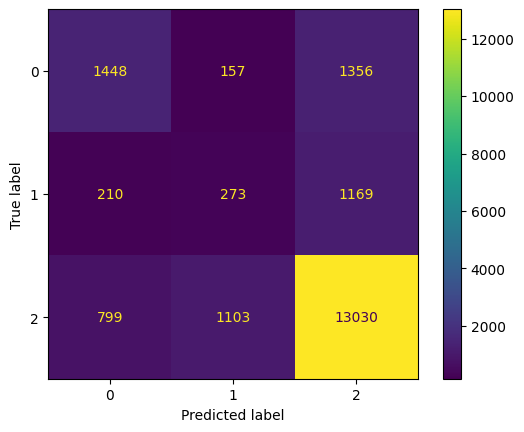

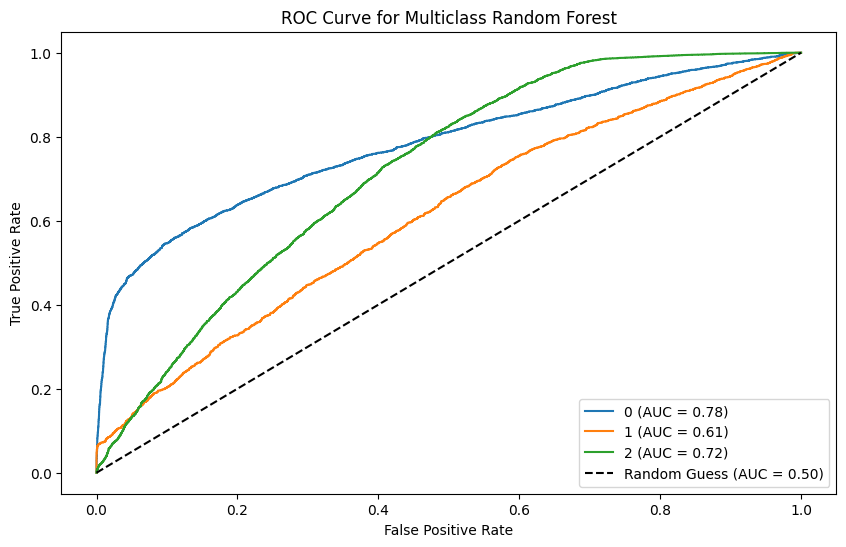

In [ ]:
# Confusion matrix
print("RF Confusion Matrix")
CM.from_predictions(y_test, test_predict)

# Classification Report for Detailed Performance
print("\nClassification Report:")
print(classification_report(y_test, test_predict))


# ROC Curve for Multiclass
lb = LabelBinarizer()
Y_test_binarized = lb.fit_transform(y_test)
Y_score = RF_model.predict_proba(X_test_reduced)

# Calculate ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}
classes = lb.classes_

for i, class_label in enumerate(classes):
    fpr[class_label], tpr[class_label], _ = roc_curve(Y_test_binarized[:, i], Y_score[:, i])
    roc_auc[class_label] = roc_auc_score(Y_test_binarized[:, i], Y_score[:, i])

# Plot the ROC Curve
plt.figure(figsize=(10, 6))
for class_label in classes:
    plt.plot(fpr[class_label], tpr[class_label], label=f"{class_label} (AUC = {roc_auc[class_label]:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.50)")
plt.title("ROC Curve for Multiclass Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


In [ ]:
#accuracy
#calculate accuracy
accuracy = accuracy_score(y_test, test_predict)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7547198772064466


# Chosen Model: XGBoost and Further Evaluation

Out of all the three models experimented, XGBoost remains the most versatile and most computationally efficient compared to GBDT and Random Forest. Furthermore, with the application of hyperparameter tuning and SMOTE, XGBoost has seen a moderate increase in the macro reccall for review category class 1. Further improvements can be done by conducting sentiment analysis through keyword detection.